In [1]:
#=======================================
## DNN_reg_Housing (Cross_validation)
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Change the working directory.

import os

os.getcwd()

'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Housing'

In [2]:
#----------------------------------------
# Set random seed.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#----------------------------------------
# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [4]:
#----------------------------------------
# Load the dataset.

dataset = np.loadtxt("Housing-Training-Data.txt")

print(dataset.shape)

index = [0, 5, 7, 12]

X = dataset[:, index]
Y = dataset[:, 13]

print(X.shape)
print(Y.shape)

(506, 14)
(506, 4)
(506,)


In [5]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

standardize = lambda x:(x - np.mean(x, axis = 0))/np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)
Y_train = standardize(Y)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))

[ 3.6135  6.2846  3.795  12.6531]
[8.6015 0.7026 2.1057 7.1411]
22.5328
9.1971
[-0. -0. -0. -0.]
[1. 1. 1. 1.]
-0.0
1.0


In [6]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)

In [7]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [8]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 7, 7, 6, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'linear']


In [9]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
    # Create the DNN_model.
    model = create_DNN_model(nodes, drop, kernel, act)
    # Compile the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], epochs = 1000, validation_split = 0.2, batch_size = 20, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_mse.append(scores[0])
    cv_mae.append(scores[1])

Train on 364 samples, validate on 91 samples
Epoch 1/1000
 - 0s - loss: 0.9928 - mean_absolute_error: 0.7230 - val_loss: 1.1065 - val_mean_absolute_error: 0.7562
Epoch 2/1000
 - 0s - loss: 0.9926 - mean_absolute_error: 0.7225 - val_loss: 1.1060 - val_mean_absolute_error: 0.7558
Epoch 3/1000
 - 0s - loss: 0.9912 - mean_absolute_error: 0.7220 - val_loss: 1.1028 - val_mean_absolute_error: 0.7545
Epoch 4/1000
 - 0s - loss: 0.9860 - mean_absolute_error: 0.7205 - val_loss: 1.0897 - val_mean_absolute_error: 0.7504
Epoch 5/1000
 - 0s - loss: 0.9705 - mean_absolute_error: 0.7146 - val_loss: 1.0535 - val_mean_absolute_error: 0.7391
Epoch 6/1000
 - 0s - loss: 0.9270 - mean_absolute_error: 0.6987 - val_loss: 0.9776 - val_mean_absolute_error: 0.7141
Epoch 7/1000
 - 0s - loss: 0.8601 - mean_absolute_error: 0.6808 - val_loss: 0.8429 - val_mean_absolute_error: 0.6767
Epoch 8/1000
 - 0s - loss: 0.7587 - mean_absolute_error: 0.6449 - val_loss: 0.6756 - val_mean_absolute_error: 0.6282
Epoch 9/1000
 - 0s 

Epoch 71/1000
 - 0s - loss: 0.3463 - mean_absolute_error: 0.3962 - val_loss: 0.2221 - val_mean_absolute_error: 0.3537
Epoch 72/1000
 - 0s - loss: 0.4096 - mean_absolute_error: 0.4163 - val_loss: 0.2113 - val_mean_absolute_error: 0.3496
Epoch 73/1000
 - 0s - loss: 0.3742 - mean_absolute_error: 0.4132 - val_loss: 0.2013 - val_mean_absolute_error: 0.3456
Epoch 74/1000
 - 0s - loss: 0.3711 - mean_absolute_error: 0.4180 - val_loss: 0.2054 - val_mean_absolute_error: 0.3469
Epoch 75/1000
 - 0s - loss: 0.3567 - mean_absolute_error: 0.4128 - val_loss: 0.2037 - val_mean_absolute_error: 0.3462
Epoch 76/1000
 - 0s - loss: 0.3469 - mean_absolute_error: 0.3923 - val_loss: 0.2081 - val_mean_absolute_error: 0.3477
Epoch 77/1000
 - 0s - loss: 0.3427 - mean_absolute_error: 0.3962 - val_loss: 0.2142 - val_mean_absolute_error: 0.3494
Epoch 78/1000
 - 0s - loss: 0.3855 - mean_absolute_error: 0.4121 - val_loss: 0.2032 - val_mean_absolute_error: 0.3453
Epoch 79/1000
 - 0s - loss: 0.3361 - mean_absolute_error

 - 0s - loss: 0.4250 - mean_absolute_error: 0.4391 - val_loss: 0.2134 - val_mean_absolute_error: 0.3467
Epoch 141/1000
 - 0s - loss: 0.3504 - mean_absolute_error: 0.4060 - val_loss: 0.1892 - val_mean_absolute_error: 0.3360
Epoch 142/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.3977 - val_loss: 0.1872 - val_mean_absolute_error: 0.3346
Epoch 143/1000
 - 0s - loss: 0.3469 - mean_absolute_error: 0.3968 - val_loss: 0.1959 - val_mean_absolute_error: 0.3381
Epoch 144/1000
 - 0s - loss: 0.2853 - mean_absolute_error: 0.3676 - val_loss: 0.1945 - val_mean_absolute_error: 0.3375
Epoch 145/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.3869 - val_loss: 0.1793 - val_mean_absolute_error: 0.3310
Epoch 146/1000
 - 0s - loss: 0.3731 - mean_absolute_error: 0.4282 - val_loss: 0.1733 - val_mean_absolute_error: 0.3277
Epoch 147/1000
 - 0s - loss: 0.3997 - mean_absolute_error: 0.4125 - val_loss: 0.1753 - val_mean_absolute_error: 0.3286
Epoch 148/1000
 - 0s - loss: 0.3437 - mean_absolute_error: 0.40

Epoch 209/1000
 - 0s - loss: 0.3819 - mean_absolute_error: 0.4081 - val_loss: 0.1949 - val_mean_absolute_error: 0.3369
Epoch 210/1000
 - 0s - loss: 0.3717 - mean_absolute_error: 0.4038 - val_loss: 0.1962 - val_mean_absolute_error: 0.3378
Epoch 211/1000
 - 0s - loss: 0.3355 - mean_absolute_error: 0.3851 - val_loss: 0.1879 - val_mean_absolute_error: 0.3340
Epoch 212/1000
 - 0s - loss: 0.3270 - mean_absolute_error: 0.4026 - val_loss: 0.1710 - val_mean_absolute_error: 0.3272
Epoch 213/1000
 - 0s - loss: 0.3406 - mean_absolute_error: 0.4023 - val_loss: 0.1729 - val_mean_absolute_error: 0.3261
Epoch 214/1000
 - 0s - loss: 0.3166 - mean_absolute_error: 0.3793 - val_loss: 0.1808 - val_mean_absolute_error: 0.3295
Epoch 215/1000
 - 0s - loss: 0.3650 - mean_absolute_error: 0.4080 - val_loss: 0.1814 - val_mean_absolute_error: 0.3295
Epoch 216/1000
 - 0s - loss: 0.3057 - mean_absolute_error: 0.3807 - val_loss: 0.1708 - val_mean_absolute_error: 0.3250
Epoch 217/1000
 - 0s - loss: 0.3047 - mean_absol

Epoch 278/1000
 - 0s - loss: 0.3598 - mean_absolute_error: 0.4076 - val_loss: 0.1752 - val_mean_absolute_error: 0.3292
Epoch 279/1000
 - 0s - loss: 0.3522 - mean_absolute_error: 0.3918 - val_loss: 0.1814 - val_mean_absolute_error: 0.3310
Epoch 280/1000
 - 0s - loss: 0.3557 - mean_absolute_error: 0.4028 - val_loss: 0.1816 - val_mean_absolute_error: 0.3304
Epoch 281/1000
 - 0s - loss: 0.3262 - mean_absolute_error: 0.3983 - val_loss: 0.1756 - val_mean_absolute_error: 0.3272
Epoch 282/1000
 - 0s - loss: 0.3856 - mean_absolute_error: 0.4141 - val_loss: 0.1752 - val_mean_absolute_error: 0.3267
Epoch 283/1000
 - 0s - loss: 0.3528 - mean_absolute_error: 0.4075 - val_loss: 0.1761 - val_mean_absolute_error: 0.3268
Epoch 284/1000
 - 0s - loss: 0.3524 - mean_absolute_error: 0.4095 - val_loss: 0.1756 - val_mean_absolute_error: 0.3262
Epoch 285/1000
 - 0s - loss: 0.2979 - mean_absolute_error: 0.3865 - val_loss: 0.1715 - val_mean_absolute_error: 0.3234
Epoch 286/1000
 - 0s - loss: 0.3443 - mean_absol

Epoch 347/1000
 - 0s - loss: 0.3370 - mean_absolute_error: 0.4090 - val_loss: 0.1814 - val_mean_absolute_error: 0.3327
Epoch 348/1000
 - 0s - loss: 0.3814 - mean_absolute_error: 0.4149 - val_loss: 0.1863 - val_mean_absolute_error: 0.3348
Epoch 349/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.3967 - val_loss: 0.1848 - val_mean_absolute_error: 0.3336
Epoch 350/1000
 - 0s - loss: 0.3144 - mean_absolute_error: 0.4058 - val_loss: 0.1764 - val_mean_absolute_error: 0.3295
Epoch 351/1000
 - 0s - loss: 0.3060 - mean_absolute_error: 0.3884 - val_loss: 0.1749 - val_mean_absolute_error: 0.3271
Epoch 352/1000
 - 0s - loss: 0.3141 - mean_absolute_error: 0.4024 - val_loss: 0.1750 - val_mean_absolute_error: 0.3266
Epoch 353/1000
 - 0s - loss: 0.2890 - mean_absolute_error: 0.3728 - val_loss: 0.1642 - val_mean_absolute_error: 0.3219
Epoch 354/1000
 - 0s - loss: 0.3564 - mean_absolute_error: 0.4119 - val_loss: 0.1692 - val_mean_absolute_error: 0.3224
Epoch 355/1000
 - 0s - loss: 0.3760 - mean_absol

Epoch 416/1000
 - 0s - loss: 0.3759 - mean_absolute_error: 0.4108 - val_loss: 0.1729 - val_mean_absolute_error: 0.3223
Epoch 417/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.3756 - val_loss: 0.1713 - val_mean_absolute_error: 0.3214
Epoch 418/1000
 - 0s - loss: 0.3069 - mean_absolute_error: 0.3796 - val_loss: 0.1716 - val_mean_absolute_error: 0.3216
Epoch 419/1000
 - 0s - loss: 0.3155 - mean_absolute_error: 0.3913 - val_loss: 0.1739 - val_mean_absolute_error: 0.3217
Epoch 420/1000
 - 0s - loss: 0.3528 - mean_absolute_error: 0.4005 - val_loss: 0.1832 - val_mean_absolute_error: 0.3267
Epoch 421/1000
 - 0s - loss: 0.3252 - mean_absolute_error: 0.3957 - val_loss: 0.1869 - val_mean_absolute_error: 0.3293
Epoch 422/1000
 - 0s - loss: 0.3467 - mean_absolute_error: 0.4052 - val_loss: 0.1819 - val_mean_absolute_error: 0.3267
Epoch 423/1000
 - 0s - loss: 0.3236 - mean_absolute_error: 0.3843 - val_loss: 0.1816 - val_mean_absolute_error: 0.3267
Epoch 424/1000
 - 0s - loss: 0.3186 - mean_absol

Epoch 485/1000
 - 0s - loss: 0.3460 - mean_absolute_error: 0.4117 - val_loss: 0.1801 - val_mean_absolute_error: 0.3259
Epoch 486/1000
 - 0s - loss: 0.3233 - mean_absolute_error: 0.3891 - val_loss: 0.1630 - val_mean_absolute_error: 0.3185
Epoch 487/1000
 - 0s - loss: 0.3179 - mean_absolute_error: 0.3846 - val_loss: 0.1714 - val_mean_absolute_error: 0.3218
Epoch 488/1000
 - 0s - loss: 0.2939 - mean_absolute_error: 0.3860 - val_loss: 0.1800 - val_mean_absolute_error: 0.3260
Epoch 489/1000
 - 0s - loss: 0.3074 - mean_absolute_error: 0.3707 - val_loss: 0.1744 - val_mean_absolute_error: 0.3226
Epoch 490/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.3896 - val_loss: 0.1809 - val_mean_absolute_error: 0.3249
Epoch 491/1000
 - 0s - loss: 0.3560 - mean_absolute_error: 0.3876 - val_loss: 0.2011 - val_mean_absolute_error: 0.3378
Epoch 492/1000
 - 0s - loss: 0.3541 - mean_absolute_error: 0.4038 - val_loss: 0.1977 - val_mean_absolute_error: 0.3365
Epoch 493/1000
 - 0s - loss: 0.3376 - mean_absol

Epoch 554/1000
 - 0s - loss: 0.3381 - mean_absolute_error: 0.4018 - val_loss: 0.1822 - val_mean_absolute_error: 0.3269
Epoch 555/1000
 - 0s - loss: 0.3687 - mean_absolute_error: 0.3953 - val_loss: 0.1716 - val_mean_absolute_error: 0.3215
Epoch 556/1000
 - 0s - loss: 0.3366 - mean_absolute_error: 0.4109 - val_loss: 0.1750 - val_mean_absolute_error: 0.3225
Epoch 557/1000
 - 0s - loss: 0.3469 - mean_absolute_error: 0.4013 - val_loss: 0.1746 - val_mean_absolute_error: 0.3222
Epoch 558/1000
 - 0s - loss: 0.3180 - mean_absolute_error: 0.3929 - val_loss: 0.1755 - val_mean_absolute_error: 0.3224
Epoch 559/1000
 - 0s - loss: 0.3957 - mean_absolute_error: 0.4082 - val_loss: 0.1738 - val_mean_absolute_error: 0.3221
Epoch 560/1000
 - 0s - loss: 0.4127 - mean_absolute_error: 0.4166 - val_loss: 0.1960 - val_mean_absolute_error: 0.3359
Epoch 561/1000
 - 0s - loss: 0.3283 - mean_absolute_error: 0.3969 - val_loss: 0.1832 - val_mean_absolute_error: 0.3273
Epoch 562/1000
 - 0s - loss: 0.3563 - mean_absol

Epoch 623/1000
 - 0s - loss: 0.3328 - mean_absolute_error: 0.3977 - val_loss: 0.1917 - val_mean_absolute_error: 0.3300
Epoch 624/1000
 - 0s - loss: 0.3142 - mean_absolute_error: 0.3885 - val_loss: 0.1841 - val_mean_absolute_error: 0.3253
Epoch 625/1000
 - 0s - loss: 0.3092 - mean_absolute_error: 0.3713 - val_loss: 0.1784 - val_mean_absolute_error: 0.3225
Epoch 626/1000
 - 0s - loss: 0.3565 - mean_absolute_error: 0.4125 - val_loss: 0.1706 - val_mean_absolute_error: 0.3184
Epoch 627/1000
 - 0s - loss: 0.3522 - mean_absolute_error: 0.3913 - val_loss: 0.1739 - val_mean_absolute_error: 0.3193
Epoch 628/1000
 - 0s - loss: 0.3349 - mean_absolute_error: 0.3836 - val_loss: 0.2010 - val_mean_absolute_error: 0.3357
Epoch 629/1000
 - 0s - loss: 0.2900 - mean_absolute_error: 0.3695 - val_loss: 0.2057 - val_mean_absolute_error: 0.3391
Epoch 630/1000
 - 0s - loss: 0.3579 - mean_absolute_error: 0.4018 - val_loss: 0.1983 - val_mean_absolute_error: 0.3351
Epoch 631/1000
 - 0s - loss: 0.2918 - mean_absol

Epoch 692/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.3960 - val_loss: 0.1968 - val_mean_absolute_error: 0.3359
Epoch 693/1000
 - 0s - loss: 0.2866 - mean_absolute_error: 0.3759 - val_loss: 0.1866 - val_mean_absolute_error: 0.3307
Epoch 694/1000
 - 0s - loss: 0.3548 - mean_absolute_error: 0.4057 - val_loss: 0.1824 - val_mean_absolute_error: 0.3280
Epoch 695/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.3662 - val_loss: 0.1897 - val_mean_absolute_error: 0.3316
Epoch 696/1000
 - 0s - loss: 0.3254 - mean_absolute_error: 0.3970 - val_loss: 0.1816 - val_mean_absolute_error: 0.3271
Epoch 697/1000
 - 0s - loss: 0.2918 - mean_absolute_error: 0.3825 - val_loss: 0.1864 - val_mean_absolute_error: 0.3279
Epoch 698/1000
 - 0s - loss: 0.3379 - mean_absolute_error: 0.3880 - val_loss: 0.1886 - val_mean_absolute_error: 0.3298
Epoch 699/1000
 - 0s - loss: 0.2934 - mean_absolute_error: 0.3742 - val_loss: 0.1833 - val_mean_absolute_error: 0.3272
Epoch 700/1000
 - 0s - loss: 0.3623 - mean_absol

Epoch 761/1000
 - 0s - loss: 0.2867 - mean_absolute_error: 0.3735 - val_loss: 0.1757 - val_mean_absolute_error: 0.3183
Epoch 762/1000
 - 0s - loss: 0.3193 - mean_absolute_error: 0.3753 - val_loss: 0.1680 - val_mean_absolute_error: 0.3145
Epoch 763/1000
 - 0s - loss: 0.2617 - mean_absolute_error: 0.3497 - val_loss: 0.1765 - val_mean_absolute_error: 0.3176
Epoch 764/1000
 - 0s - loss: 0.2962 - mean_absolute_error: 0.3846 - val_loss: 0.1936 - val_mean_absolute_error: 0.3288
Epoch 765/1000
 - 0s - loss: 0.3196 - mean_absolute_error: 0.3792 - val_loss: 0.1864 - val_mean_absolute_error: 0.3253
Epoch 766/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.3791 - val_loss: 0.1932 - val_mean_absolute_error: 0.3288
Epoch 767/1000
 - 0s - loss: 0.3068 - mean_absolute_error: 0.3745 - val_loss: 0.1798 - val_mean_absolute_error: 0.3209
Epoch 768/1000
 - 0s - loss: 0.3285 - mean_absolute_error: 0.3884 - val_loss: 0.1799 - val_mean_absolute_error: 0.3207
Epoch 769/1000
 - 0s - loss: 0.2775 - mean_absol

Epoch 830/1000
 - 0s - loss: 0.3494 - mean_absolute_error: 0.3830 - val_loss: 0.1710 - val_mean_absolute_error: 0.3156
Epoch 831/1000
 - 0s - loss: 0.2289 - mean_absolute_error: 0.3481 - val_loss: 0.1768 - val_mean_absolute_error: 0.3185
Epoch 832/1000
 - 0s - loss: 0.3460 - mean_absolute_error: 0.3906 - val_loss: 0.1801 - val_mean_absolute_error: 0.3202
Epoch 833/1000
 - 0s - loss: 0.3255 - mean_absolute_error: 0.3973 - val_loss: 0.1780 - val_mean_absolute_error: 0.3182
Epoch 834/1000
 - 0s - loss: 0.2852 - mean_absolute_error: 0.3691 - val_loss: 0.2058 - val_mean_absolute_error: 0.3363
Epoch 835/1000
 - 0s - loss: 0.2669 - mean_absolute_error: 0.3646 - val_loss: 0.1855 - val_mean_absolute_error: 0.3236
Epoch 836/1000
 - 0s - loss: 0.3097 - mean_absolute_error: 0.3898 - val_loss: 0.1698 - val_mean_absolute_error: 0.3163
Epoch 837/1000
 - 0s - loss: 0.3364 - mean_absolute_error: 0.3807 - val_loss: 0.1907 - val_mean_absolute_error: 0.3274
Epoch 838/1000
 - 0s - loss: 0.3568 - mean_absol

Epoch 899/1000
 - 0s - loss: 0.2917 - mean_absolute_error: 0.3579 - val_loss: 0.1829 - val_mean_absolute_error: 0.3250
Epoch 900/1000
 - 0s - loss: 0.2379 - mean_absolute_error: 0.3625 - val_loss: 0.1756 - val_mean_absolute_error: 0.3215
Epoch 901/1000
 - 0s - loss: 0.2605 - mean_absolute_error: 0.3523 - val_loss: 0.1868 - val_mean_absolute_error: 0.3276
Epoch 902/1000
 - 0s - loss: 0.3035 - mean_absolute_error: 0.3781 - val_loss: 0.1780 - val_mean_absolute_error: 0.3226
Epoch 903/1000
 - 0s - loss: 0.3074 - mean_absolute_error: 0.3837 - val_loss: 0.1716 - val_mean_absolute_error: 0.3189
Epoch 904/1000
 - 0s - loss: 0.2823 - mean_absolute_error: 0.3727 - val_loss: 0.1836 - val_mean_absolute_error: 0.3256
Epoch 905/1000
 - 0s - loss: 0.3058 - mean_absolute_error: 0.3761 - val_loss: 0.1868 - val_mean_absolute_error: 0.3271
Epoch 906/1000
 - 0s - loss: 0.3471 - mean_absolute_error: 0.3961 - val_loss: 0.1949 - val_mean_absolute_error: 0.3321
Epoch 907/1000
 - 0s - loss: 0.2753 - mean_absol

Epoch 968/1000
 - 0s - loss: 0.3348 - mean_absolute_error: 0.3899 - val_loss: 0.1811 - val_mean_absolute_error: 0.3231
Epoch 969/1000
 - 0s - loss: 0.3103 - mean_absolute_error: 0.3805 - val_loss: 0.1875 - val_mean_absolute_error: 0.3260
Epoch 970/1000
 - 0s - loss: 0.3333 - mean_absolute_error: 0.3916 - val_loss: 0.1850 - val_mean_absolute_error: 0.3247
Epoch 971/1000
 - 0s - loss: 0.2639 - mean_absolute_error: 0.3759 - val_loss: 0.1865 - val_mean_absolute_error: 0.3240
Epoch 972/1000
 - 0s - loss: 0.2859 - mean_absolute_error: 0.3787 - val_loss: 0.1820 - val_mean_absolute_error: 0.3201
Epoch 973/1000
 - 0s - loss: 0.2978 - mean_absolute_error: 0.3762 - val_loss: 0.1957 - val_mean_absolute_error: 0.3302
Epoch 974/1000
 - 0s - loss: 0.2780 - mean_absolute_error: 0.3689 - val_loss: 0.1792 - val_mean_absolute_error: 0.3178
Epoch 975/1000
 - 0s - loss: 0.2621 - mean_absolute_error: 0.3624 - val_loss: 0.1837 - val_mean_absolute_error: 0.3223
Epoch 976/1000
 - 0s - loss: 0.2758 - mean_absol

Epoch 37/1000
 - 0s - loss: 0.3600 - mean_absolute_error: 0.4172 - val_loss: 0.2630 - val_mean_absolute_error: 0.3713
Epoch 38/1000
 - 0s - loss: 0.3370 - mean_absolute_error: 0.4028 - val_loss: 0.2485 - val_mean_absolute_error: 0.3648
Epoch 39/1000
 - 0s - loss: 0.3554 - mean_absolute_error: 0.4172 - val_loss: 0.2482 - val_mean_absolute_error: 0.3644
Epoch 40/1000
 - 0s - loss: 0.3574 - mean_absolute_error: 0.4168 - val_loss: 0.2485 - val_mean_absolute_error: 0.3666
Epoch 41/1000
 - 0s - loss: 0.4334 - mean_absolute_error: 0.4349 - val_loss: 0.2746 - val_mean_absolute_error: 0.3801
Epoch 42/1000
 - 0s - loss: 0.3288 - mean_absolute_error: 0.4096 - val_loss: 0.2598 - val_mean_absolute_error: 0.3716
Epoch 43/1000
 - 0s - loss: 0.3316 - mean_absolute_error: 0.4059 - val_loss: 0.2474 - val_mean_absolute_error: 0.3648
Epoch 44/1000
 - 0s - loss: 0.3650 - mean_absolute_error: 0.4102 - val_loss: 0.2463 - val_mean_absolute_error: 0.3645
Epoch 45/1000
 - 0s - loss: 0.3307 - mean_absolute_error

Epoch 107/1000
 - 0s - loss: 0.3348 - mean_absolute_error: 0.4039 - val_loss: 0.2163 - val_mean_absolute_error: 0.3440
Epoch 108/1000
 - 0s - loss: 0.3845 - mean_absolute_error: 0.4263 - val_loss: 0.2115 - val_mean_absolute_error: 0.3412
Epoch 109/1000
 - 0s - loss: 0.3564 - mean_absolute_error: 0.4102 - val_loss: 0.2237 - val_mean_absolute_error: 0.3477
Epoch 110/1000
 - 0s - loss: 0.3367 - mean_absolute_error: 0.3790 - val_loss: 0.2202 - val_mean_absolute_error: 0.3459
Epoch 111/1000
 - 0s - loss: 0.3736 - mean_absolute_error: 0.3964 - val_loss: 0.2354 - val_mean_absolute_error: 0.3538
Epoch 112/1000
 - 0s - loss: 0.3264 - mean_absolute_error: 0.3893 - val_loss: 0.2232 - val_mean_absolute_error: 0.3473
Epoch 113/1000
 - 0s - loss: 0.3810 - mean_absolute_error: 0.4065 - val_loss: 0.2227 - val_mean_absolute_error: 0.3471
Epoch 114/1000
 - 0s - loss: 0.3253 - mean_absolute_error: 0.3925 - val_loss: 0.2364 - val_mean_absolute_error: 0.3544
Epoch 115/1000
 - 0s - loss: 0.3604 - mean_absol

Epoch 176/1000
 - 0s - loss: 0.3138 - mean_absolute_error: 0.3925 - val_loss: 0.2174 - val_mean_absolute_error: 0.3452
Epoch 177/1000
 - 0s - loss: 0.2645 - mean_absolute_error: 0.3546 - val_loss: 0.2040 - val_mean_absolute_error: 0.3383
Epoch 178/1000
 - 0s - loss: 0.3052 - mean_absolute_error: 0.3832 - val_loss: 0.1892 - val_mean_absolute_error: 0.3303
Epoch 179/1000
 - 0s - loss: 0.3586 - mean_absolute_error: 0.4001 - val_loss: 0.2020 - val_mean_absolute_error: 0.3368
Epoch 180/1000
 - 0s - loss: 0.3075 - mean_absolute_error: 0.3749 - val_loss: 0.2057 - val_mean_absolute_error: 0.3388
Epoch 181/1000
 - 0s - loss: 0.3608 - mean_absolute_error: 0.4043 - val_loss: 0.2070 - val_mean_absolute_error: 0.3395
Epoch 182/1000
 - 0s - loss: 0.3018 - mean_absolute_error: 0.3749 - val_loss: 0.2079 - val_mean_absolute_error: 0.3400
Epoch 183/1000
 - 0s - loss: 0.2912 - mean_absolute_error: 0.3755 - val_loss: 0.2019 - val_mean_absolute_error: 0.3373
Epoch 184/1000
 - 0s - loss: 0.2828 - mean_absol

Epoch 245/1000
 - 0s - loss: 0.3232 - mean_absolute_error: 0.3785 - val_loss: 0.2037 - val_mean_absolute_error: 0.3362
Epoch 246/1000
 - 0s - loss: 0.3387 - mean_absolute_error: 0.3821 - val_loss: 0.2086 - val_mean_absolute_error: 0.3387
Epoch 247/1000
 - 0s - loss: 0.3569 - mean_absolute_error: 0.3910 - val_loss: 0.2158 - val_mean_absolute_error: 0.3428
Epoch 248/1000
 - 0s - loss: 0.3044 - mean_absolute_error: 0.3639 - val_loss: 0.2091 - val_mean_absolute_error: 0.3392
Epoch 249/1000
 - 0s - loss: 0.2938 - mean_absolute_error: 0.3581 - val_loss: 0.2018 - val_mean_absolute_error: 0.3352
Epoch 250/1000
 - 0s - loss: 0.3782 - mean_absolute_error: 0.3990 - val_loss: 0.2203 - val_mean_absolute_error: 0.3453
Epoch 251/1000
 - 0s - loss: 0.2847 - mean_absolute_error: 0.3711 - val_loss: 0.2128 - val_mean_absolute_error: 0.3412
Epoch 252/1000
 - 0s - loss: 0.2931 - mean_absolute_error: 0.3710 - val_loss: 0.1951 - val_mean_absolute_error: 0.3319
Epoch 253/1000
 - 0s - loss: 0.2967 - mean_absol

Epoch 314/1000
 - 0s - loss: 0.3022 - mean_absolute_error: 0.3818 - val_loss: 0.2131 - val_mean_absolute_error: 0.3396
Epoch 315/1000
 - 0s - loss: 0.2768 - mean_absolute_error: 0.3584 - val_loss: 0.1966 - val_mean_absolute_error: 0.3311
Epoch 316/1000
 - 0s - loss: 0.3231 - mean_absolute_error: 0.3856 - val_loss: 0.1827 - val_mean_absolute_error: 0.3226
Epoch 317/1000
 - 0s - loss: 0.2639 - mean_absolute_error: 0.3620 - val_loss: 0.1859 - val_mean_absolute_error: 0.3242
Epoch 318/1000
 - 0s - loss: 0.2939 - mean_absolute_error: 0.3567 - val_loss: 0.1806 - val_mean_absolute_error: 0.3206
Epoch 319/1000
 - 0s - loss: 0.3504 - mean_absolute_error: 0.4016 - val_loss: 0.1748 - val_mean_absolute_error: 0.3170
Epoch 320/1000
 - 0s - loss: 0.2913 - mean_absolute_error: 0.3526 - val_loss: 0.1835 - val_mean_absolute_error: 0.3225
Epoch 321/1000
 - 0s - loss: 0.2786 - mean_absolute_error: 0.3585 - val_loss: 0.1913 - val_mean_absolute_error: 0.3275
Epoch 322/1000
 - 0s - loss: 0.3989 - mean_absol

Epoch 383/1000
 - 0s - loss: 0.3153 - mean_absolute_error: 0.3717 - val_loss: 0.1985 - val_mean_absolute_error: 0.3322
Epoch 384/1000
 - 0s - loss: 0.3810 - mean_absolute_error: 0.3942 - val_loss: 0.2146 - val_mean_absolute_error: 0.3412
Epoch 385/1000
 - 0s - loss: 0.2884 - mean_absolute_error: 0.3575 - val_loss: 0.2254 - val_mean_absolute_error: 0.3469
Epoch 386/1000
 - 0s - loss: 0.3100 - mean_absolute_error: 0.3786 - val_loss: 0.2285 - val_mean_absolute_error: 0.3491
Epoch 387/1000
 - 0s - loss: 0.3214 - mean_absolute_error: 0.3818 - val_loss: 0.1998 - val_mean_absolute_error: 0.3343
Epoch 388/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.3840 - val_loss: 0.1782 - val_mean_absolute_error: 0.3242
Epoch 389/1000
 - 0s - loss: 0.2849 - mean_absolute_error: 0.3611 - val_loss: 0.1744 - val_mean_absolute_error: 0.3215
Epoch 390/1000
 - 0s - loss: 0.3100 - mean_absolute_error: 0.3817 - val_loss: 0.1851 - val_mean_absolute_error: 0.3255
Epoch 391/1000
 - 0s - loss: 0.3450 - mean_absol

Epoch 452/1000
 - 0s - loss: 0.2867 - mean_absolute_error: 0.3677 - val_loss: 0.1994 - val_mean_absolute_error: 0.3318
Epoch 453/1000
 - 0s - loss: 0.2986 - mean_absolute_error: 0.3711 - val_loss: 0.1870 - val_mean_absolute_error: 0.3251
Epoch 454/1000
 - 0s - loss: 0.2977 - mean_absolute_error: 0.3538 - val_loss: 0.1994 - val_mean_absolute_error: 0.3320
Epoch 455/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.3898 - val_loss: 0.2035 - val_mean_absolute_error: 0.3345
Epoch 456/1000
 - 0s - loss: 0.2697 - mean_absolute_error: 0.3561 - val_loss: 0.2058 - val_mean_absolute_error: 0.3360
Epoch 457/1000
 - 0s - loss: 0.2959 - mean_absolute_error: 0.3656 - val_loss: 0.1946 - val_mean_absolute_error: 0.3297
Epoch 458/1000
 - 0s - loss: 0.2725 - mean_absolute_error: 0.3460 - val_loss: 0.1956 - val_mean_absolute_error: 0.3298
Epoch 459/1000
 - 0s - loss: 0.2765 - mean_absolute_error: 0.3707 - val_loss: 0.1964 - val_mean_absolute_error: 0.3303
Epoch 460/1000
 - 0s - loss: 0.2984 - mean_absol

Epoch 521/1000
 - 0s - loss: 0.3489 - mean_absolute_error: 0.3950 - val_loss: 0.1976 - val_mean_absolute_error: 0.3310
Epoch 522/1000
 - 0s - loss: 0.2642 - mean_absolute_error: 0.3571 - val_loss: 0.1938 - val_mean_absolute_error: 0.3292
Epoch 523/1000
 - 0s - loss: 0.3156 - mean_absolute_error: 0.3648 - val_loss: 0.1885 - val_mean_absolute_error: 0.3260
Epoch 524/1000
 - 0s - loss: 0.2702 - mean_absolute_error: 0.3534 - val_loss: 0.1863 - val_mean_absolute_error: 0.3248
Epoch 525/1000
 - 0s - loss: 0.3563 - mean_absolute_error: 0.3849 - val_loss: 0.1865 - val_mean_absolute_error: 0.3246
Epoch 526/1000
 - 0s - loss: 0.3363 - mean_absolute_error: 0.3837 - val_loss: 0.1931 - val_mean_absolute_error: 0.3278
Epoch 527/1000
 - 0s - loss: 0.2898 - mean_absolute_error: 0.3542 - val_loss: 0.1959 - val_mean_absolute_error: 0.3292
Epoch 528/1000
 - 0s - loss: 0.3126 - mean_absolute_error: 0.3636 - val_loss: 0.1964 - val_mean_absolute_error: 0.3303
Epoch 529/1000
 - 0s - loss: 0.2715 - mean_absol

Epoch 590/1000
 - 0s - loss: 0.2885 - mean_absolute_error: 0.3553 - val_loss: 0.2015 - val_mean_absolute_error: 0.3324
Epoch 591/1000
 - 0s - loss: 0.3075 - mean_absolute_error: 0.3625 - val_loss: 0.2055 - val_mean_absolute_error: 0.3348
Epoch 592/1000
 - 0s - loss: 0.2922 - mean_absolute_error: 0.3658 - val_loss: 0.2045 - val_mean_absolute_error: 0.3345
Epoch 593/1000
 - 0s - loss: 0.3010 - mean_absolute_error: 0.3756 - val_loss: 0.2210 - val_mean_absolute_error: 0.3433
Epoch 594/1000
 - 0s - loss: 0.2697 - mean_absolute_error: 0.3541 - val_loss: 0.2026 - val_mean_absolute_error: 0.3332
Epoch 595/1000
 - 0s - loss: 0.2858 - mean_absolute_error: 0.3649 - val_loss: 0.1922 - val_mean_absolute_error: 0.3276
Epoch 596/1000
 - 0s - loss: 0.2409 - mean_absolute_error: 0.3410 - val_loss: 0.1818 - val_mean_absolute_error: 0.3213
Epoch 597/1000
 - 0s - loss: 0.2742 - mean_absolute_error: 0.3484 - val_loss: 0.2035 - val_mean_absolute_error: 0.3334
Epoch 598/1000
 - 0s - loss: 0.3153 - mean_absol

Epoch 659/1000
 - 0s - loss: 0.2906 - mean_absolute_error: 0.3512 - val_loss: 0.1967 - val_mean_absolute_error: 0.3289
Epoch 660/1000
 - 0s - loss: 0.3040 - mean_absolute_error: 0.3675 - val_loss: 0.1773 - val_mean_absolute_error: 0.3168
Epoch 661/1000
 - 0s - loss: 0.3265 - mean_absolute_error: 0.3935 - val_loss: 0.1812 - val_mean_absolute_error: 0.3192
Epoch 662/1000
 - 0s - loss: 0.3252 - mean_absolute_error: 0.3597 - val_loss: 0.1960 - val_mean_absolute_error: 0.3278
Epoch 663/1000
 - 0s - loss: 0.3025 - mean_absolute_error: 0.3674 - val_loss: 0.1957 - val_mean_absolute_error: 0.3287
Epoch 664/1000
 - 0s - loss: 0.3164 - mean_absolute_error: 0.3753 - val_loss: 0.1928 - val_mean_absolute_error: 0.3269
Epoch 665/1000
 - 0s - loss: 0.2974 - mean_absolute_error: 0.3649 - val_loss: 0.1766 - val_mean_absolute_error: 0.3173
Epoch 666/1000
 - 0s - loss: 0.3216 - mean_absolute_error: 0.3820 - val_loss: 0.1821 - val_mean_absolute_error: 0.3198
Epoch 667/1000
 - 0s - loss: 0.2961 - mean_absol

Epoch 728/1000
 - 0s - loss: 0.2842 - mean_absolute_error: 0.3598 - val_loss: 0.1741 - val_mean_absolute_error: 0.3145
Epoch 729/1000
 - 0s - loss: 0.3170 - mean_absolute_error: 0.3770 - val_loss: 0.1879 - val_mean_absolute_error: 0.3235
Epoch 730/1000
 - 0s - loss: 0.3576 - mean_absolute_error: 0.3848 - val_loss: 0.2018 - val_mean_absolute_error: 0.3317
Epoch 731/1000
 - 0s - loss: 0.3329 - mean_absolute_error: 0.3825 - val_loss: 0.1972 - val_mean_absolute_error: 0.3292
Epoch 732/1000
 - 0s - loss: 0.3350 - mean_absolute_error: 0.3832 - val_loss: 0.2096 - val_mean_absolute_error: 0.3365
Epoch 733/1000
 - 0s - loss: 0.2875 - mean_absolute_error: 0.3530 - val_loss: 0.1999 - val_mean_absolute_error: 0.3308
Epoch 734/1000
 - 0s - loss: 0.3138 - mean_absolute_error: 0.3730 - val_loss: 0.2037 - val_mean_absolute_error: 0.3330
Epoch 735/1000
 - 0s - loss: 0.2867 - mean_absolute_error: 0.3638 - val_loss: 0.2052 - val_mean_absolute_error: 0.3342
Epoch 736/1000
 - 0s - loss: 0.2981 - mean_absol

Epoch 797/1000
 - 0s - loss: 0.2771 - mean_absolute_error: 0.3636 - val_loss: 0.2007 - val_mean_absolute_error: 0.3296
Epoch 798/1000
 - 0s - loss: 0.2831 - mean_absolute_error: 0.3644 - val_loss: 0.1859 - val_mean_absolute_error: 0.3220
Epoch 799/1000
 - 0s - loss: 0.3181 - mean_absolute_error: 0.3786 - val_loss: 0.1824 - val_mean_absolute_error: 0.3190
Epoch 800/1000
 - 0s - loss: 0.2554 - mean_absolute_error: 0.3418 - val_loss: 0.1891 - val_mean_absolute_error: 0.3232
Epoch 801/1000
 - 0s - loss: 0.2696 - mean_absolute_error: 0.3553 - val_loss: 0.1927 - val_mean_absolute_error: 0.3249
Epoch 802/1000
 - 0s - loss: 0.2746 - mean_absolute_error: 0.3542 - val_loss: 0.1770 - val_mean_absolute_error: 0.3158
Epoch 803/1000
 - 0s - loss: 0.2950 - mean_absolute_error: 0.3673 - val_loss: 0.1902 - val_mean_absolute_error: 0.3235
Epoch 804/1000
 - 0s - loss: 0.3098 - mean_absolute_error: 0.3640 - val_loss: 0.1872 - val_mean_absolute_error: 0.3216
Epoch 805/1000
 - 0s - loss: 0.2709 - mean_absol

Epoch 866/1000
 - 0s - loss: 0.3191 - mean_absolute_error: 0.3678 - val_loss: 0.1947 - val_mean_absolute_error: 0.3268
Epoch 867/1000
 - 0s - loss: 0.3076 - mean_absolute_error: 0.3722 - val_loss: 0.2101 - val_mean_absolute_error: 0.3376
Epoch 868/1000
 - 0s - loss: 0.2974 - mean_absolute_error: 0.3738 - val_loss: 0.2025 - val_mean_absolute_error: 0.3322
Epoch 869/1000
 - 0s - loss: 0.2872 - mean_absolute_error: 0.3580 - val_loss: 0.1996 - val_mean_absolute_error: 0.3304
Epoch 870/1000
 - 0s - loss: 0.3003 - mean_absolute_error: 0.3508 - val_loss: 0.1972 - val_mean_absolute_error: 0.3296
Epoch 871/1000
 - 0s - loss: 0.2530 - mean_absolute_error: 0.3615 - val_loss: 0.1980 - val_mean_absolute_error: 0.3296
Epoch 872/1000
 - 0s - loss: 0.2837 - mean_absolute_error: 0.3703 - val_loss: 0.1837 - val_mean_absolute_error: 0.3206
Epoch 873/1000
 - 0s - loss: 0.2881 - mean_absolute_error: 0.3744 - val_loss: 0.1779 - val_mean_absolute_error: 0.3163
Epoch 874/1000
 - 0s - loss: 0.2590 - mean_absol

Epoch 935/1000
 - 0s - loss: 0.2518 - mean_absolute_error: 0.3488 - val_loss: 0.2098 - val_mean_absolute_error: 0.3374
Epoch 936/1000
 - 0s - loss: 0.2583 - mean_absolute_error: 0.3548 - val_loss: 0.1997 - val_mean_absolute_error: 0.3304
Epoch 937/1000
 - 0s - loss: 0.3079 - mean_absolute_error: 0.3682 - val_loss: 0.1927 - val_mean_absolute_error: 0.3268
Epoch 938/1000
 - 0s - loss: 0.2855 - mean_absolute_error: 0.3583 - val_loss: 0.2008 - val_mean_absolute_error: 0.3320
Epoch 939/1000
 - 0s - loss: 0.3328 - mean_absolute_error: 0.3804 - val_loss: 0.1844 - val_mean_absolute_error: 0.3209
Epoch 940/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.3709 - val_loss: 0.1918 - val_mean_absolute_error: 0.3253
Epoch 941/1000
 - 0s - loss: 0.2817 - mean_absolute_error: 0.3699 - val_loss: 0.1961 - val_mean_absolute_error: 0.3291
Epoch 942/1000
 - 0s - loss: 0.2527 - mean_absolute_error: 0.3425 - val_loss: 0.1821 - val_mean_absolute_error: 0.3197
Epoch 943/1000
 - 0s - loss: 0.2758 - mean_absol

Epoch 4/1000
 - 0s - loss: 1.0150 - mean_absolute_error: 0.7334 - val_loss: 1.0888 - val_mean_absolute_error: 0.7503
Epoch 5/1000
 - 0s - loss: 0.9969 - mean_absolute_error: 0.7275 - val_loss: 1.0544 - val_mean_absolute_error: 0.7392
Epoch 6/1000
 - 0s - loss: 0.9579 - mean_absolute_error: 0.7162 - val_loss: 0.9836 - val_mean_absolute_error: 0.7189
Epoch 7/1000
 - 0s - loss: 0.9078 - mean_absolute_error: 0.7022 - val_loss: 0.8920 - val_mean_absolute_error: 0.6933
Epoch 8/1000
 - 0s - loss: 0.8242 - mean_absolute_error: 0.6836 - val_loss: 0.7738 - val_mean_absolute_error: 0.6632
Epoch 9/1000
 - 0s - loss: 0.7335 - mean_absolute_error: 0.6592 - val_loss: 0.6669 - val_mean_absolute_error: 0.6242
Epoch 10/1000
 - 0s - loss: 0.7259 - mean_absolute_error: 0.6322 - val_loss: 0.5769 - val_mean_absolute_error: 0.5843
Epoch 11/1000
 - 0s - loss: 0.6787 - mean_absolute_error: 0.6201 - val_loss: 0.5163 - val_mean_absolute_error: 0.5482
Epoch 12/1000
 - 0s - loss: 0.5957 - mean_absolute_error: 0.56

Epoch 74/1000
 - 0s - loss: 0.4279 - mean_absolute_error: 0.4635 - val_loss: 0.2429 - val_mean_absolute_error: 0.3799
Epoch 75/1000
 - 0s - loss: 0.4060 - mean_absolute_error: 0.4462 - val_loss: 0.2495 - val_mean_absolute_error: 0.3819
Epoch 76/1000
 - 0s - loss: 0.4028 - mean_absolute_error: 0.4533 - val_loss: 0.2473 - val_mean_absolute_error: 0.3789
Epoch 77/1000
 - 0s - loss: 0.3754 - mean_absolute_error: 0.4431 - val_loss: 0.2342 - val_mean_absolute_error: 0.3727
Epoch 78/1000
 - 0s - loss: 0.4015 - mean_absolute_error: 0.4584 - val_loss: 0.2317 - val_mean_absolute_error: 0.3717
Epoch 79/1000
 - 0s - loss: 0.4556 - mean_absolute_error: 0.4778 - val_loss: 0.2480 - val_mean_absolute_error: 0.3778
Epoch 80/1000
 - 0s - loss: 0.4238 - mean_absolute_error: 0.4626 - val_loss: 0.2433 - val_mean_absolute_error: 0.3766
Epoch 81/1000
 - 0s - loss: 0.3948 - mean_absolute_error: 0.4524 - val_loss: 0.2470 - val_mean_absolute_error: 0.3779
Epoch 82/1000
 - 0s - loss: 0.3962 - mean_absolute_error

Epoch 144/1000
 - 0s - loss: 0.3220 - mean_absolute_error: 0.4090 - val_loss: 0.1902 - val_mean_absolute_error: 0.3418
Epoch 145/1000
 - 0s - loss: 0.3764 - mean_absolute_error: 0.4292 - val_loss: 0.1992 - val_mean_absolute_error: 0.3460
Epoch 146/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.4078 - val_loss: 0.1923 - val_mean_absolute_error: 0.3418
Epoch 147/1000
 - 0s - loss: 0.3909 - mean_absolute_error: 0.4367 - val_loss: 0.1895 - val_mean_absolute_error: 0.3403
Epoch 148/1000
 - 0s - loss: 0.3639 - mean_absolute_error: 0.4213 - val_loss: 0.2001 - val_mean_absolute_error: 0.3453
Epoch 149/1000
 - 0s - loss: 0.3483 - mean_absolute_error: 0.4183 - val_loss: 0.1928 - val_mean_absolute_error: 0.3412
Epoch 150/1000
 - 0s - loss: 0.3380 - mean_absolute_error: 0.4136 - val_loss: 0.1894 - val_mean_absolute_error: 0.3379
Epoch 151/1000
 - 0s - loss: 0.3135 - mean_absolute_error: 0.4017 - val_loss: 0.1986 - val_mean_absolute_error: 0.3431
Epoch 152/1000
 - 0s - loss: 0.3119 - mean_absol

Epoch 213/1000
 - 0s - loss: 0.2920 - mean_absolute_error: 0.3934 - val_loss: 0.2042 - val_mean_absolute_error: 0.3413
Epoch 214/1000
 - 0s - loss: 0.3609 - mean_absolute_error: 0.3996 - val_loss: 0.2255 - val_mean_absolute_error: 0.3542
Epoch 215/1000
 - 0s - loss: 0.3511 - mean_absolute_error: 0.4224 - val_loss: 0.2269 - val_mean_absolute_error: 0.3551
Epoch 216/1000
 - 0s - loss: 0.3645 - mean_absolute_error: 0.4295 - val_loss: 0.2086 - val_mean_absolute_error: 0.3452
Epoch 217/1000
 - 0s - loss: 0.3221 - mean_absolute_error: 0.4108 - val_loss: 0.1936 - val_mean_absolute_error: 0.3367
Epoch 218/1000
 - 0s - loss: 0.3346 - mean_absolute_error: 0.4172 - val_loss: 0.1972 - val_mean_absolute_error: 0.3397
Epoch 219/1000
 - 0s - loss: 0.3136 - mean_absolute_error: 0.4053 - val_loss: 0.2069 - val_mean_absolute_error: 0.3452
Epoch 220/1000
 - 0s - loss: 0.2826 - mean_absolute_error: 0.3893 - val_loss: 0.1983 - val_mean_absolute_error: 0.3397
Epoch 221/1000
 - 0s - loss: 0.3899 - mean_absol

Epoch 282/1000
 - 0s - loss: 0.3219 - mean_absolute_error: 0.3943 - val_loss: 0.2106 - val_mean_absolute_error: 0.3484
Epoch 283/1000
 - 0s - loss: 0.2876 - mean_absolute_error: 0.3881 - val_loss: 0.2011 - val_mean_absolute_error: 0.3390
Epoch 284/1000
 - 0s - loss: 0.3322 - mean_absolute_error: 0.4190 - val_loss: 0.1936 - val_mean_absolute_error: 0.3335
Epoch 285/1000
 - 0s - loss: 0.2868 - mean_absolute_error: 0.3889 - val_loss: 0.2004 - val_mean_absolute_error: 0.3383
Epoch 286/1000
 - 0s - loss: 0.3474 - mean_absolute_error: 0.4045 - val_loss: 0.2127 - val_mean_absolute_error: 0.3475
Epoch 287/1000
 - 0s - loss: 0.3053 - mean_absolute_error: 0.3936 - val_loss: 0.2119 - val_mean_absolute_error: 0.3482
Epoch 288/1000
 - 0s - loss: 0.3658 - mean_absolute_error: 0.4148 - val_loss: 0.2165 - val_mean_absolute_error: 0.3527
Epoch 289/1000
 - 0s - loss: 0.2781 - mean_absolute_error: 0.3912 - val_loss: 0.2267 - val_mean_absolute_error: 0.3604
Epoch 290/1000
 - 0s - loss: 0.3065 - mean_absol

Epoch 351/1000
 - 0s - loss: 0.2996 - mean_absolute_error: 0.3919 - val_loss: 0.1963 - val_mean_absolute_error: 0.3384
Epoch 352/1000
 - 0s - loss: 0.3055 - mean_absolute_error: 0.3950 - val_loss: 0.1916 - val_mean_absolute_error: 0.3359
Epoch 353/1000
 - 0s - loss: 0.3741 - mean_absolute_error: 0.4216 - val_loss: 0.1990 - val_mean_absolute_error: 0.3414
Epoch 354/1000
 - 0s - loss: 0.3285 - mean_absolute_error: 0.4102 - val_loss: 0.2090 - val_mean_absolute_error: 0.3485
Epoch 355/1000
 - 0s - loss: 0.2958 - mean_absolute_error: 0.3905 - val_loss: 0.2064 - val_mean_absolute_error: 0.3460
Epoch 356/1000
 - 0s - loss: 0.3066 - mean_absolute_error: 0.4036 - val_loss: 0.1996 - val_mean_absolute_error: 0.3422
Epoch 357/1000
 - 0s - loss: 0.3117 - mean_absolute_error: 0.4033 - val_loss: 0.2046 - val_mean_absolute_error: 0.3455
Epoch 358/1000
 - 0s - loss: 0.3250 - mean_absolute_error: 0.4112 - val_loss: 0.1991 - val_mean_absolute_error: 0.3402
Epoch 359/1000
 - 0s - loss: 0.2791 - mean_absol

Epoch 420/1000
 - 0s - loss: 0.2971 - mean_absolute_error: 0.3927 - val_loss: 0.1998 - val_mean_absolute_error: 0.3377
Epoch 421/1000
 - 0s - loss: 0.2903 - mean_absolute_error: 0.3943 - val_loss: 0.2065 - val_mean_absolute_error: 0.3432
Epoch 422/1000
 - 0s - loss: 0.3202 - mean_absolute_error: 0.3975 - val_loss: 0.1993 - val_mean_absolute_error: 0.3368
Epoch 423/1000
 - 0s - loss: 0.2990 - mean_absolute_error: 0.4019 - val_loss: 0.1991 - val_mean_absolute_error: 0.3369
Epoch 424/1000
 - 0s - loss: 0.2960 - mean_absolute_error: 0.3994 - val_loss: 0.1961 - val_mean_absolute_error: 0.3348
Epoch 425/1000
 - 0s - loss: 0.3178 - mean_absolute_error: 0.4033 - val_loss: 0.1939 - val_mean_absolute_error: 0.3330
Epoch 426/1000
 - 0s - loss: 0.2929 - mean_absolute_error: 0.3895 - val_loss: 0.1926 - val_mean_absolute_error: 0.3317
Epoch 427/1000
 - 0s - loss: 0.3240 - mean_absolute_error: 0.4126 - val_loss: 0.1980 - val_mean_absolute_error: 0.3364
Epoch 428/1000
 - 0s - loss: 0.3025 - mean_absol

Epoch 489/1000
 - 0s - loss: 0.3841 - mean_absolute_error: 0.4056 - val_loss: 0.1967 - val_mean_absolute_error: 0.3357
Epoch 490/1000
 - 0s - loss: 0.2805 - mean_absolute_error: 0.3974 - val_loss: 0.1951 - val_mean_absolute_error: 0.3337
Epoch 491/1000
 - 0s - loss: 0.2762 - mean_absolute_error: 0.3915 - val_loss: 0.1946 - val_mean_absolute_error: 0.3334
Epoch 492/1000
 - 0s - loss: 0.2745 - mean_absolute_error: 0.3920 - val_loss: 0.1832 - val_mean_absolute_error: 0.3297
Epoch 493/1000
 - 0s - loss: 0.3797 - mean_absolute_error: 0.4344 - val_loss: 0.1879 - val_mean_absolute_error: 0.3274
Epoch 494/1000
 - 0s - loss: 0.2855 - mean_absolute_error: 0.3816 - val_loss: 0.1967 - val_mean_absolute_error: 0.3353
Epoch 495/1000
 - 0s - loss: 0.2756 - mean_absolute_error: 0.3905 - val_loss: 0.1897 - val_mean_absolute_error: 0.3300
Epoch 496/1000
 - 0s - loss: 0.2789 - mean_absolute_error: 0.3770 - val_loss: 0.1874 - val_mean_absolute_error: 0.3287
Epoch 497/1000
 - 0s - loss: 0.2905 - mean_absol

Epoch 558/1000
 - 0s - loss: 0.3448 - mean_absolute_error: 0.4143 - val_loss: 0.2152 - val_mean_absolute_error: 0.3481
Epoch 559/1000
 - 0s - loss: 0.3797 - mean_absolute_error: 0.4388 - val_loss: 0.2213 - val_mean_absolute_error: 0.3529
Epoch 560/1000
 - 0s - loss: 0.2967 - mean_absolute_error: 0.3942 - val_loss: 0.2061 - val_mean_absolute_error: 0.3403
Epoch 561/1000
 - 0s - loss: 0.3392 - mean_absolute_error: 0.4283 - val_loss: 0.2124 - val_mean_absolute_error: 0.3456
Epoch 562/1000
 - 0s - loss: 0.2578 - mean_absolute_error: 0.3778 - val_loss: 0.1959 - val_mean_absolute_error: 0.3321
Epoch 563/1000
 - 0s - loss: 0.5642 - mean_absolute_error: 0.4460 - val_loss: 0.1976 - val_mean_absolute_error: 0.3335
Epoch 564/1000
 - 0s - loss: 0.4957 - mean_absolute_error: 0.4214 - val_loss: 0.2017 - val_mean_absolute_error: 0.3359
Epoch 565/1000
 - 0s - loss: 0.3065 - mean_absolute_error: 0.3972 - val_loss: 0.2025 - val_mean_absolute_error: 0.3366
Epoch 566/1000
 - 0s - loss: 0.2842 - mean_absol

Epoch 627/1000
 - 0s - loss: 0.2339 - mean_absolute_error: 0.3616 - val_loss: 0.1821 - val_mean_absolute_error: 0.3195
Epoch 628/1000
 - 0s - loss: 0.2791 - mean_absolute_error: 0.3823 - val_loss: 0.1915 - val_mean_absolute_error: 0.3278
Epoch 629/1000
 - 0s - loss: 0.2879 - mean_absolute_error: 0.3858 - val_loss: 0.1926 - val_mean_absolute_error: 0.3284
Epoch 630/1000
 - 0s - loss: 0.3098 - mean_absolute_error: 0.3873 - val_loss: 0.1926 - val_mean_absolute_error: 0.3282
Epoch 631/1000
 - 0s - loss: 0.2888 - mean_absolute_error: 0.3896 - val_loss: 0.1985 - val_mean_absolute_error: 0.3317
Epoch 632/1000
 - 0s - loss: 0.3007 - mean_absolute_error: 0.3878 - val_loss: 0.2054 - val_mean_absolute_error: 0.3356
Epoch 633/1000
 - 0s - loss: 0.2968 - mean_absolute_error: 0.3874 - val_loss: 0.2080 - val_mean_absolute_error: 0.3367
Epoch 634/1000
 - 0s - loss: 0.2780 - mean_absolute_error: 0.3861 - val_loss: 0.2059 - val_mean_absolute_error: 0.3365
Epoch 635/1000
 - 0s - loss: 0.3617 - mean_absol

Epoch 696/1000
 - 0s - loss: 0.2759 - mean_absolute_error: 0.3780 - val_loss: 0.1847 - val_mean_absolute_error: 0.3207
Epoch 697/1000
 - 0s - loss: 0.2530 - mean_absolute_error: 0.3763 - val_loss: 0.1903 - val_mean_absolute_error: 0.3263
Epoch 698/1000
 - 0s - loss: 0.2609 - mean_absolute_error: 0.3712 - val_loss: 0.1877 - val_mean_absolute_error: 0.3234
Epoch 699/1000
 - 0s - loss: 0.2962 - mean_absolute_error: 0.3859 - val_loss: 0.1815 - val_mean_absolute_error: 0.3170
Epoch 700/1000
 - 0s - loss: 0.3279 - mean_absolute_error: 0.3989 - val_loss: 0.1798 - val_mean_absolute_error: 0.3160
Epoch 701/1000
 - 0s - loss: 0.2699 - mean_absolute_error: 0.3704 - val_loss: 0.1920 - val_mean_absolute_error: 0.3285
Epoch 702/1000
 - 0s - loss: 0.2330 - mean_absolute_error: 0.3630 - val_loss: 0.2025 - val_mean_absolute_error: 0.3346
Epoch 703/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.3982 - val_loss: 0.1935 - val_mean_absolute_error: 0.3274
Epoch 704/1000
 - 0s - loss: 0.3210 - mean_absol

Epoch 765/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.3705 - val_loss: 0.1909 - val_mean_absolute_error: 0.3275
Epoch 766/1000
 - 0s - loss: 0.2587 - mean_absolute_error: 0.3731 - val_loss: 0.1863 - val_mean_absolute_error: 0.3237
Epoch 767/1000
 - 0s - loss: 0.2680 - mean_absolute_error: 0.3689 - val_loss: 0.1852 - val_mean_absolute_error: 0.3218
Epoch 768/1000
 - 0s - loss: 0.2696 - mean_absolute_error: 0.3782 - val_loss: 0.1886 - val_mean_absolute_error: 0.3247
Epoch 769/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.3897 - val_loss: 0.1837 - val_mean_absolute_error: 0.3203
Epoch 770/1000
 - 0s - loss: 0.3431 - mean_absolute_error: 0.4041 - val_loss: 0.1947 - val_mean_absolute_error: 0.3301
Epoch 771/1000
 - 0s - loss: 0.2664 - mean_absolute_error: 0.3694 - val_loss: 0.1897 - val_mean_absolute_error: 0.3263
Epoch 772/1000
 - 0s - loss: 0.2834 - mean_absolute_error: 0.3934 - val_loss: 0.1957 - val_mean_absolute_error: 0.3317
Epoch 773/1000
 - 0s - loss: 0.2982 - mean_absol

Epoch 834/1000
 - 0s - loss: 0.2620 - mean_absolute_error: 0.3703 - val_loss: 0.1909 - val_mean_absolute_error: 0.3254
Epoch 835/1000
 - 0s - loss: 0.2614 - mean_absolute_error: 0.3708 - val_loss: 0.2139 - val_mean_absolute_error: 0.3432
Epoch 836/1000
 - 0s - loss: 0.3501 - mean_absolute_error: 0.3827 - val_loss: 0.2107 - val_mean_absolute_error: 0.3408
Epoch 837/1000
 - 0s - loss: 0.2717 - mean_absolute_error: 0.3881 - val_loss: 0.1934 - val_mean_absolute_error: 0.3253
Epoch 838/1000
 - 0s - loss: 0.2764 - mean_absolute_error: 0.3820 - val_loss: 0.1895 - val_mean_absolute_error: 0.3219
Epoch 839/1000
 - 0s - loss: 0.2899 - mean_absolute_error: 0.3838 - val_loss: 0.1929 - val_mean_absolute_error: 0.3268
Epoch 840/1000
 - 0s - loss: 0.3203 - mean_absolute_error: 0.3960 - val_loss: 0.1850 - val_mean_absolute_error: 0.3184
Epoch 841/1000
 - 0s - loss: 0.2633 - mean_absolute_error: 0.3656 - val_loss: 0.1869 - val_mean_absolute_error: 0.3208
Epoch 842/1000
 - 0s - loss: 0.2826 - mean_absol

Epoch 903/1000
 - 0s - loss: 0.2735 - mean_absolute_error: 0.3802 - val_loss: 0.1802 - val_mean_absolute_error: 0.3163
Epoch 904/1000
 - 0s - loss: 0.3089 - mean_absolute_error: 0.3965 - val_loss: 0.1857 - val_mean_absolute_error: 0.3240
Epoch 905/1000
 - 0s - loss: 0.2080 - mean_absolute_error: 0.3471 - val_loss: 0.1947 - val_mean_absolute_error: 0.3319
Epoch 906/1000
 - 0s - loss: 0.2796 - mean_absolute_error: 0.3848 - val_loss: 0.1962 - val_mean_absolute_error: 0.3325
Epoch 907/1000
 - 0s - loss: 0.2460 - mean_absolute_error: 0.3603 - val_loss: 0.2102 - val_mean_absolute_error: 0.3441
Epoch 908/1000
 - 0s - loss: 0.2558 - mean_absolute_error: 0.3595 - val_loss: 0.2051 - val_mean_absolute_error: 0.3393
Epoch 909/1000
 - 0s - loss: 0.2935 - mean_absolute_error: 0.3720 - val_loss: 0.2027 - val_mean_absolute_error: 0.3358
Epoch 910/1000
 - 0s - loss: 0.2324 - mean_absolute_error: 0.3550 - val_loss: 0.2046 - val_mean_absolute_error: 0.3373
Epoch 911/1000
 - 0s - loss: 0.3102 - mean_absol

Epoch 972/1000
 - 0s - loss: 0.2894 - mean_absolute_error: 0.3886 - val_loss: 0.1822 - val_mean_absolute_error: 0.3201
Epoch 973/1000
 - 0s - loss: 0.2800 - mean_absolute_error: 0.3813 - val_loss: 0.1873 - val_mean_absolute_error: 0.3259
Epoch 974/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.3966 - val_loss: 0.1922 - val_mean_absolute_error: 0.3289
Epoch 975/1000
 - 0s - loss: 0.2755 - mean_absolute_error: 0.3776 - val_loss: 0.1905 - val_mean_absolute_error: 0.3272
Epoch 976/1000
 - 0s - loss: 0.2588 - mean_absolute_error: 0.3638 - val_loss: 0.1929 - val_mean_absolute_error: 0.3291
Epoch 977/1000
 - 0s - loss: 0.2684 - mean_absolute_error: 0.3874 - val_loss: 0.1939 - val_mean_absolute_error: 0.3293
Epoch 978/1000
 - 0s - loss: 0.3207 - mean_absolute_error: 0.4044 - val_loss: 0.1913 - val_mean_absolute_error: 0.3274
Epoch 979/1000
 - 0s - loss: 0.2807 - mean_absolute_error: 0.3706 - val_loss: 0.1997 - val_mean_absolute_error: 0.3370
Epoch 980/1000
 - 0s - loss: 0.2654 - mean_absol

Epoch 41/1000
 - 0s - loss: 0.4111 - mean_absolute_error: 0.4319 - val_loss: 0.2700 - val_mean_absolute_error: 0.3780
Epoch 42/1000
 - 0s - loss: 0.4064 - mean_absolute_error: 0.4360 - val_loss: 0.2507 - val_mean_absolute_error: 0.3725
Epoch 43/1000
 - 0s - loss: 0.4535 - mean_absolute_error: 0.4606 - val_loss: 0.2634 - val_mean_absolute_error: 0.3772
Epoch 44/1000
 - 0s - loss: 0.3739 - mean_absolute_error: 0.4173 - val_loss: 0.2573 - val_mean_absolute_error: 0.3727
Epoch 45/1000
 - 0s - loss: 0.4111 - mean_absolute_error: 0.4319 - val_loss: 0.2471 - val_mean_absolute_error: 0.3693
Epoch 46/1000
 - 0s - loss: 0.4644 - mean_absolute_error: 0.4587 - val_loss: 0.2673 - val_mean_absolute_error: 0.3789
Epoch 47/1000
 - 0s - loss: 0.4615 - mean_absolute_error: 0.4347 - val_loss: 0.2700 - val_mean_absolute_error: 0.3796
Epoch 48/1000
 - 0s - loss: 0.4098 - mean_absolute_error: 0.4232 - val_loss: 0.2746 - val_mean_absolute_error: 0.3802
Epoch 49/1000
 - 0s - loss: 0.3953 - mean_absolute_error

Epoch 111/1000
 - 0s - loss: 0.4194 - mean_absolute_error: 0.4291 - val_loss: 0.2358 - val_mean_absolute_error: 0.3498
Epoch 112/1000
 - 0s - loss: 0.4375 - mean_absolute_error: 0.4342 - val_loss: 0.2358 - val_mean_absolute_error: 0.3541
Epoch 113/1000
 - 0s - loss: 0.3221 - mean_absolute_error: 0.3962 - val_loss: 0.2312 - val_mean_absolute_error: 0.3544
Epoch 114/1000
 - 0s - loss: 0.3197 - mean_absolute_error: 0.3919 - val_loss: 0.2281 - val_mean_absolute_error: 0.3493
Epoch 115/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.3982 - val_loss: 0.2227 - val_mean_absolute_error: 0.3447
Epoch 116/1000
 - 0s - loss: 0.3227 - mean_absolute_error: 0.4065 - val_loss: 0.2274 - val_mean_absolute_error: 0.3489
Epoch 117/1000
 - 0s - loss: 0.3748 - mean_absolute_error: 0.4109 - val_loss: 0.2308 - val_mean_absolute_error: 0.3465
Epoch 118/1000
 - 0s - loss: 0.3490 - mean_absolute_error: 0.3950 - val_loss: 0.2277 - val_mean_absolute_error: 0.3470
Epoch 119/1000
 - 0s - loss: 0.3778 - mean_absol

Epoch 180/1000
 - 0s - loss: 0.3349 - mean_absolute_error: 0.4116 - val_loss: 0.2121 - val_mean_absolute_error: 0.3360
Epoch 181/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4063 - val_loss: 0.2176 - val_mean_absolute_error: 0.3379
Epoch 182/1000
 - 0s - loss: 0.3489 - mean_absolute_error: 0.4046 - val_loss: 0.2197 - val_mean_absolute_error: 0.3389
Epoch 183/1000
 - 0s - loss: 0.3720 - mean_absolute_error: 0.4191 - val_loss: 0.2171 - val_mean_absolute_error: 0.3379
Epoch 184/1000
 - 0s - loss: 0.3477 - mean_absolute_error: 0.4101 - val_loss: 0.2202 - val_mean_absolute_error: 0.3397
Epoch 185/1000
 - 0s - loss: 0.3538 - mean_absolute_error: 0.4104 - val_loss: 0.2176 - val_mean_absolute_error: 0.3408
Epoch 186/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.3933 - val_loss: 0.2201 - val_mean_absolute_error: 0.3405
Epoch 187/1000
 - 0s - loss: 0.3685 - mean_absolute_error: 0.4125 - val_loss: 0.2216 - val_mean_absolute_error: 0.3412
Epoch 188/1000
 - 0s - loss: 0.3968 - mean_absol

Epoch 249/1000
 - 0s - loss: 0.3394 - mean_absolute_error: 0.4047 - val_loss: 0.2210 - val_mean_absolute_error: 0.3401
Epoch 250/1000
 - 0s - loss: 0.3827 - mean_absolute_error: 0.4181 - val_loss: 0.2214 - val_mean_absolute_error: 0.3415
Epoch 251/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.4027 - val_loss: 0.2229 - val_mean_absolute_error: 0.3423
Epoch 252/1000
 - 0s - loss: 0.3468 - mean_absolute_error: 0.4041 - val_loss: 0.2214 - val_mean_absolute_error: 0.3416
Epoch 253/1000
 - 0s - loss: 0.3706 - mean_absolute_error: 0.4177 - val_loss: 0.2197 - val_mean_absolute_error: 0.3409
Epoch 254/1000
 - 0s - loss: 0.3230 - mean_absolute_error: 0.3882 - val_loss: 0.2187 - val_mean_absolute_error: 0.3409
Epoch 255/1000
 - 0s - loss: 0.2966 - mean_absolute_error: 0.3899 - val_loss: 0.2146 - val_mean_absolute_error: 0.3379
Epoch 256/1000
 - 0s - loss: 0.3309 - mean_absolute_error: 0.4004 - val_loss: 0.2099 - val_mean_absolute_error: 0.3354
Epoch 257/1000
 - 0s - loss: 0.3363 - mean_absol

Epoch 318/1000
 - 0s - loss: 0.3277 - mean_absolute_error: 0.3996 - val_loss: 0.2169 - val_mean_absolute_error: 0.3431
Epoch 319/1000
 - 0s - loss: 0.3669 - mean_absolute_error: 0.4200 - val_loss: 0.2200 - val_mean_absolute_error: 0.3442
Epoch 320/1000
 - 0s - loss: 0.3598 - mean_absolute_error: 0.4150 - val_loss: 0.2216 - val_mean_absolute_error: 0.3443
Epoch 321/1000
 - 0s - loss: 0.3791 - mean_absolute_error: 0.3987 - val_loss: 0.2264 - val_mean_absolute_error: 0.3477
Epoch 322/1000
 - 0s - loss: 0.3273 - mean_absolute_error: 0.4039 - val_loss: 0.2250 - val_mean_absolute_error: 0.3483
Epoch 323/1000
 - 0s - loss: 0.3337 - mean_absolute_error: 0.4033 - val_loss: 0.2218 - val_mean_absolute_error: 0.3480
Epoch 324/1000
 - 0s - loss: 0.3863 - mean_absolute_error: 0.4163 - val_loss: 0.2290 - val_mean_absolute_error: 0.3505
Epoch 325/1000
 - 0s - loss: 0.3394 - mean_absolute_error: 0.4099 - val_loss: 0.2265 - val_mean_absolute_error: 0.3509
Epoch 326/1000
 - 0s - loss: 0.2899 - mean_absol

Epoch 387/1000
 - 0s - loss: 0.3156 - mean_absolute_error: 0.3930 - val_loss: 0.2198 - val_mean_absolute_error: 0.3462
Epoch 388/1000
 - 0s - loss: 0.3083 - mean_absolute_error: 0.4114 - val_loss: 0.2171 - val_mean_absolute_error: 0.3432
Epoch 389/1000
 - 0s - loss: 0.3055 - mean_absolute_error: 0.3923 - val_loss: 0.2186 - val_mean_absolute_error: 0.3432
Epoch 390/1000
 - 0s - loss: 0.3174 - mean_absolute_error: 0.4037 - val_loss: 0.2197 - val_mean_absolute_error: 0.3456
Epoch 391/1000
 - 0s - loss: 0.3026 - mean_absolute_error: 0.3881 - val_loss: 0.2173 - val_mean_absolute_error: 0.3453
Epoch 392/1000
 - 0s - loss: 0.3216 - mean_absolute_error: 0.3929 - val_loss: 0.2118 - val_mean_absolute_error: 0.3437
Epoch 393/1000
 - 0s - loss: 0.3718 - mean_absolute_error: 0.4153 - val_loss: 0.2173 - val_mean_absolute_error: 0.3428
Epoch 394/1000
 - 0s - loss: 0.3408 - mean_absolute_error: 0.4029 - val_loss: 0.2199 - val_mean_absolute_error: 0.3450
Epoch 395/1000
 - 0s - loss: 0.3644 - mean_absol

Epoch 456/1000
 - 0s - loss: 0.3240 - mean_absolute_error: 0.4009 - val_loss: 0.2299 - val_mean_absolute_error: 0.3539
Epoch 457/1000
 - 0s - loss: 0.3112 - mean_absolute_error: 0.3883 - val_loss: 0.2247 - val_mean_absolute_error: 0.3521
Epoch 458/1000
 - 0s - loss: 0.3356 - mean_absolute_error: 0.3977 - val_loss: 0.2232 - val_mean_absolute_error: 0.3503
Epoch 459/1000
 - 0s - loss: 0.3320 - mean_absolute_error: 0.3965 - val_loss: 0.2231 - val_mean_absolute_error: 0.3504
Epoch 460/1000
 - 0s - loss: 0.3301 - mean_absolute_error: 0.4148 - val_loss: 0.2226 - val_mean_absolute_error: 0.3495
Epoch 461/1000
 - 0s - loss: 0.3522 - mean_absolute_error: 0.4120 - val_loss: 0.2197 - val_mean_absolute_error: 0.3482
Epoch 462/1000
 - 0s - loss: 0.3692 - mean_absolute_error: 0.4294 - val_loss: 0.2213 - val_mean_absolute_error: 0.3490
Epoch 463/1000
 - 0s - loss: 0.3245 - mean_absolute_error: 0.3847 - val_loss: 0.2202 - val_mean_absolute_error: 0.3490
Epoch 464/1000
 - 0s - loss: 0.3832 - mean_absol

Epoch 525/1000
 - 0s - loss: 0.3571 - mean_absolute_error: 0.3932 - val_loss: 0.2220 - val_mean_absolute_error: 0.3469
Epoch 526/1000
 - 0s - loss: 0.3051 - mean_absolute_error: 0.3896 - val_loss: 0.2207 - val_mean_absolute_error: 0.3474
Epoch 527/1000
 - 0s - loss: 0.3661 - mean_absolute_error: 0.4232 - val_loss: 0.2187 - val_mean_absolute_error: 0.3475
Epoch 528/1000
 - 0s - loss: 0.3219 - mean_absolute_error: 0.3970 - val_loss: 0.2204 - val_mean_absolute_error: 0.3481
Epoch 529/1000
 - 0s - loss: 0.3031 - mean_absolute_error: 0.3956 - val_loss: 0.2211 - val_mean_absolute_error: 0.3464
Epoch 530/1000
 - 0s - loss: 0.3363 - mean_absolute_error: 0.4028 - val_loss: 0.2175 - val_mean_absolute_error: 0.3438
Epoch 531/1000
 - 0s - loss: 0.3317 - mean_absolute_error: 0.4094 - val_loss: 0.2159 - val_mean_absolute_error: 0.3463
Epoch 532/1000
 - 0s - loss: 0.3365 - mean_absolute_error: 0.4001 - val_loss: 0.2152 - val_mean_absolute_error: 0.3462
Epoch 533/1000
 - 0s - loss: 0.3246 - mean_absol

Epoch 594/1000
 - 0s - loss: 0.3677 - mean_absolute_error: 0.4098 - val_loss: 0.2146 - val_mean_absolute_error: 0.3470
Epoch 595/1000
 - 0s - loss: 0.3376 - mean_absolute_error: 0.4084 - val_loss: 0.2150 - val_mean_absolute_error: 0.3480
Epoch 596/1000
 - 0s - loss: 0.3465 - mean_absolute_error: 0.4161 - val_loss: 0.2140 - val_mean_absolute_error: 0.3487
Epoch 597/1000
 - 0s - loss: 0.3715 - mean_absolute_error: 0.4125 - val_loss: 0.2169 - val_mean_absolute_error: 0.3486
Epoch 598/1000
 - 0s - loss: 0.3109 - mean_absolute_error: 0.4027 - val_loss: 0.2132 - val_mean_absolute_error: 0.3462
Epoch 599/1000
 - 0s - loss: 0.3170 - mean_absolute_error: 0.3961 - val_loss: 0.2176 - val_mean_absolute_error: 0.3456
Epoch 600/1000
 - 0s - loss: 0.2508 - mean_absolute_error: 0.3488 - val_loss: 0.2166 - val_mean_absolute_error: 0.3454
Epoch 601/1000
 - 0s - loss: 0.2855 - mean_absolute_error: 0.3782 - val_loss: 0.2133 - val_mean_absolute_error: 0.3436
Epoch 602/1000
 - 0s - loss: 0.3726 - mean_absol

Epoch 663/1000
 - 0s - loss: 0.3266 - mean_absolute_error: 0.4028 - val_loss: 0.2250 - val_mean_absolute_error: 0.3490
Epoch 664/1000
 - 0s - loss: 0.3301 - mean_absolute_error: 0.4055 - val_loss: 0.2258 - val_mean_absolute_error: 0.3498
Epoch 665/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.3822 - val_loss: 0.2220 - val_mean_absolute_error: 0.3508
Epoch 666/1000
 - 0s - loss: 0.2961 - mean_absolute_error: 0.3872 - val_loss: 0.2209 - val_mean_absolute_error: 0.3480
Epoch 667/1000
 - 0s - loss: 0.3510 - mean_absolute_error: 0.3938 - val_loss: 0.2221 - val_mean_absolute_error: 0.3506
Epoch 668/1000
 - 0s - loss: 0.2742 - mean_absolute_error: 0.3775 - val_loss: 0.2216 - val_mean_absolute_error: 0.3510
Epoch 669/1000
 - 0s - loss: 0.3287 - mean_absolute_error: 0.3862 - val_loss: 0.2221 - val_mean_absolute_error: 0.3506
Epoch 670/1000
 - 0s - loss: 0.3455 - mean_absolute_error: 0.4014 - val_loss: 0.2228 - val_mean_absolute_error: 0.3496
Epoch 671/1000
 - 0s - loss: 0.3060 - mean_absol

Epoch 732/1000
 - 0s - loss: 0.3127 - mean_absolute_error: 0.3922 - val_loss: 0.2140 - val_mean_absolute_error: 0.3454
Epoch 733/1000
 - 0s - loss: 0.2912 - mean_absolute_error: 0.4064 - val_loss: 0.2121 - val_mean_absolute_error: 0.3447
Epoch 734/1000
 - 0s - loss: 0.3037 - mean_absolute_error: 0.3910 - val_loss: 0.2121 - val_mean_absolute_error: 0.3452
Epoch 735/1000
 - 0s - loss: 0.3288 - mean_absolute_error: 0.4069 - val_loss: 0.2163 - val_mean_absolute_error: 0.3462
Epoch 736/1000
 - 0s - loss: 0.3330 - mean_absolute_error: 0.3860 - val_loss: 0.2181 - val_mean_absolute_error: 0.3473
Epoch 737/1000
 - 0s - loss: 0.3253 - mean_absolute_error: 0.4092 - val_loss: 0.2272 - val_mean_absolute_error: 0.3533
Epoch 738/1000
 - 0s - loss: 0.3160 - mean_absolute_error: 0.3894 - val_loss: 0.2262 - val_mean_absolute_error: 0.3519
Epoch 739/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.3800 - val_loss: 0.2230 - val_mean_absolute_error: 0.3492
Epoch 740/1000
 - 0s - loss: 0.3230 - mean_absol

Epoch 801/1000
 - 0s - loss: 0.2546 - mean_absolute_error: 0.3637 - val_loss: 0.2217 - val_mean_absolute_error: 0.3497
Epoch 802/1000
 - 0s - loss: 0.3498 - mean_absolute_error: 0.4130 - val_loss: 0.2230 - val_mean_absolute_error: 0.3519
Epoch 803/1000
 - 0s - loss: 0.2796 - mean_absolute_error: 0.3732 - val_loss: 0.2142 - val_mean_absolute_error: 0.3478
Epoch 804/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.4095 - val_loss: 0.2105 - val_mean_absolute_error: 0.3451
Epoch 805/1000
 - 0s - loss: 0.3848 - mean_absolute_error: 0.4144 - val_loss: 0.2191 - val_mean_absolute_error: 0.3485
Epoch 806/1000
 - 0s - loss: 0.3143 - mean_absolute_error: 0.3814 - val_loss: 0.2223 - val_mean_absolute_error: 0.3513
Epoch 807/1000
 - 0s - loss: 0.3288 - mean_absolute_error: 0.3989 - val_loss: 0.2199 - val_mean_absolute_error: 0.3485
Epoch 808/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.3948 - val_loss: 0.2192 - val_mean_absolute_error: 0.3478
Epoch 809/1000
 - 0s - loss: 0.3367 - mean_absol

Epoch 870/1000
 - 0s - loss: 0.3151 - mean_absolute_error: 0.3882 - val_loss: 0.2166 - val_mean_absolute_error: 0.3486
Epoch 871/1000
 - 0s - loss: 0.2994 - mean_absolute_error: 0.3837 - val_loss: 0.2141 - val_mean_absolute_error: 0.3438
Epoch 872/1000
 - 0s - loss: 0.3434 - mean_absolute_error: 0.4228 - val_loss: 0.2140 - val_mean_absolute_error: 0.3443
Epoch 873/1000
 - 0s - loss: 0.3254 - mean_absolute_error: 0.4102 - val_loss: 0.2133 - val_mean_absolute_error: 0.3429
Epoch 874/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.3881 - val_loss: 0.2103 - val_mean_absolute_error: 0.3426
Epoch 875/1000
 - 0s - loss: 0.3586 - mean_absolute_error: 0.4126 - val_loss: 0.2301 - val_mean_absolute_error: 0.3539
Epoch 876/1000
 - 0s - loss: 0.3594 - mean_absolute_error: 0.4116 - val_loss: 0.2258 - val_mean_absolute_error: 0.3544
Epoch 877/1000
 - 0s - loss: 0.2992 - mean_absolute_error: 0.3824 - val_loss: 0.2265 - val_mean_absolute_error: 0.3538
Epoch 878/1000
 - 0s - loss: 0.3302 - mean_absol

Epoch 939/1000
 - 0s - loss: 0.3268 - mean_absolute_error: 0.3805 - val_loss: 0.2221 - val_mean_absolute_error: 0.3499
Epoch 940/1000
 - 0s - loss: 0.2906 - mean_absolute_error: 0.3870 - val_loss: 0.2207 - val_mean_absolute_error: 0.3495
Epoch 941/1000
 - 0s - loss: 0.4008 - mean_absolute_error: 0.4333 - val_loss: 0.2242 - val_mean_absolute_error: 0.3516
Epoch 942/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.4002 - val_loss: 0.2177 - val_mean_absolute_error: 0.3469
Epoch 943/1000
 - 0s - loss: 0.3036 - mean_absolute_error: 0.3789 - val_loss: 0.2160 - val_mean_absolute_error: 0.3468
Epoch 944/1000
 - 0s - loss: 0.2834 - mean_absolute_error: 0.3785 - val_loss: 0.2144 - val_mean_absolute_error: 0.3459
Epoch 945/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.3937 - val_loss: 0.2247 - val_mean_absolute_error: 0.3545
Epoch 946/1000
 - 0s - loss: 0.3210 - mean_absolute_error: 0.4087 - val_loss: 0.2246 - val_mean_absolute_error: 0.3516
Epoch 947/1000
 - 0s - loss: 0.3302 - mean_absol

Epoch 8/1000
 - 0s - loss: 0.8249 - mean_absolute_error: 0.6293 - val_loss: 0.8512 - val_mean_absolute_error: 0.6358
Epoch 9/1000
 - 0s - loss: 0.7475 - mean_absolute_error: 0.5895 - val_loss: 0.6977 - val_mean_absolute_error: 0.5627
Epoch 10/1000
 - 0s - loss: 0.6035 - mean_absolute_error: 0.5281 - val_loss: 0.5422 - val_mean_absolute_error: 0.5030
Epoch 11/1000
 - 0s - loss: 0.5458 - mean_absolute_error: 0.4950 - val_loss: 0.4267 - val_mean_absolute_error: 0.4623
Epoch 12/1000
 - 0s - loss: 0.5017 - mean_absolute_error: 0.4873 - val_loss: 0.3468 - val_mean_absolute_error: 0.4303
Epoch 13/1000
 - 0s - loss: 0.4372 - mean_absolute_error: 0.4584 - val_loss: 0.3027 - val_mean_absolute_error: 0.4031
Epoch 14/1000
 - 0s - loss: 0.4219 - mean_absolute_error: 0.4509 - val_loss: 0.2728 - val_mean_absolute_error: 0.3862
Epoch 15/1000
 - 0s - loss: 0.4546 - mean_absolute_error: 0.4459 - val_loss: 0.2707 - val_mean_absolute_error: 0.3805
Epoch 16/1000
 - 0s - loss: 0.4379 - mean_absolute_error: 

Epoch 78/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4030 - val_loss: 0.2023 - val_mean_absolute_error: 0.3320
Epoch 79/1000
 - 0s - loss: 0.3684 - mean_absolute_error: 0.4037 - val_loss: 0.2110 - val_mean_absolute_error: 0.3367
Epoch 80/1000
 - 0s - loss: 0.4036 - mean_absolute_error: 0.4083 - val_loss: 0.2166 - val_mean_absolute_error: 0.3390
Epoch 81/1000
 - 0s - loss: 0.4218 - mean_absolute_error: 0.4152 - val_loss: 0.2117 - val_mean_absolute_error: 0.3392
Epoch 82/1000
 - 0s - loss: 0.3403 - mean_absolute_error: 0.3938 - val_loss: 0.2025 - val_mean_absolute_error: 0.3340
Epoch 83/1000
 - 0s - loss: 0.3366 - mean_absolute_error: 0.3831 - val_loss: 0.1944 - val_mean_absolute_error: 0.3333
Epoch 84/1000
 - 0s - loss: 0.3976 - mean_absolute_error: 0.4238 - val_loss: 0.1900 - val_mean_absolute_error: 0.3310
Epoch 85/1000
 - 0s - loss: 0.3525 - mean_absolute_error: 0.4097 - val_loss: 0.1869 - val_mean_absolute_error: 0.3264
Epoch 86/1000
 - 0s - loss: 0.3333 - mean_absolute_error

 - 0s - loss: 0.3887 - mean_absolute_error: 0.4022 - val_loss: 0.1898 - val_mean_absolute_error: 0.3301
Epoch 148/1000
 - 0s - loss: 0.4343 - mean_absolute_error: 0.4309 - val_loss: 0.2042 - val_mean_absolute_error: 0.3349
Epoch 149/1000
 - 0s - loss: 0.3305 - mean_absolute_error: 0.3844 - val_loss: 0.1973 - val_mean_absolute_error: 0.3332
Epoch 150/1000
 - 0s - loss: 0.3434 - mean_absolute_error: 0.4000 - val_loss: 0.1923 - val_mean_absolute_error: 0.3310
Epoch 151/1000
 - 0s - loss: 0.3086 - mean_absolute_error: 0.3810 - val_loss: 0.1842 - val_mean_absolute_error: 0.3264
Epoch 152/1000
 - 0s - loss: 0.3508 - mean_absolute_error: 0.3961 - val_loss: 0.1859 - val_mean_absolute_error: 0.3263
Epoch 153/1000
 - 0s - loss: 0.3663 - mean_absolute_error: 0.3923 - val_loss: 0.1923 - val_mean_absolute_error: 0.3304
Epoch 154/1000
 - 0s - loss: 0.3422 - mean_absolute_error: 0.4045 - val_loss: 0.1898 - val_mean_absolute_error: 0.3279
Epoch 155/1000
 - 0s - loss: 0.3243 - mean_absolute_error: 0.39

Epoch 216/1000
 - 0s - loss: 0.3274 - mean_absolute_error: 0.3865 - val_loss: 0.1844 - val_mean_absolute_error: 0.3222
Epoch 217/1000
 - 0s - loss: 0.3599 - mean_absolute_error: 0.4112 - val_loss: 0.1854 - val_mean_absolute_error: 0.3241
Epoch 218/1000
 - 0s - loss: 0.2678 - mean_absolute_error: 0.3544 - val_loss: 0.1792 - val_mean_absolute_error: 0.3210
Epoch 219/1000
 - 0s - loss: 0.3327 - mean_absolute_error: 0.3989 - val_loss: 0.1793 - val_mean_absolute_error: 0.3206
Epoch 220/1000
 - 0s - loss: 0.3756 - mean_absolute_error: 0.4120 - val_loss: 0.1824 - val_mean_absolute_error: 0.3217
Epoch 221/1000
 - 0s - loss: 0.3413 - mean_absolute_error: 0.3904 - val_loss: 0.1784 - val_mean_absolute_error: 0.3193
Epoch 222/1000
 - 0s - loss: 0.3282 - mean_absolute_error: 0.3953 - val_loss: 0.1705 - val_mean_absolute_error: 0.3145
Epoch 223/1000
 - 0s - loss: 0.3356 - mean_absolute_error: 0.3983 - val_loss: 0.1714 - val_mean_absolute_error: 0.3137
Epoch 224/1000
 - 0s - loss: 0.3855 - mean_absol

Epoch 285/1000
 - 0s - loss: 0.3608 - mean_absolute_error: 0.4083 - val_loss: 0.1928 - val_mean_absolute_error: 0.3240
Epoch 286/1000
 - 0s - loss: 0.3659 - mean_absolute_error: 0.3991 - val_loss: 0.1912 - val_mean_absolute_error: 0.3240
Epoch 287/1000
 - 0s - loss: 0.2914 - mean_absolute_error: 0.3620 - val_loss: 0.1944 - val_mean_absolute_error: 0.3242
Epoch 288/1000
 - 0s - loss: 0.3269 - mean_absolute_error: 0.3861 - val_loss: 0.1837 - val_mean_absolute_error: 0.3214
Epoch 289/1000
 - 0s - loss: 0.2935 - mean_absolute_error: 0.3815 - val_loss: 0.1838 - val_mean_absolute_error: 0.3212
Epoch 290/1000
 - 0s - loss: 0.3135 - mean_absolute_error: 0.3784 - val_loss: 0.1810 - val_mean_absolute_error: 0.3207
Epoch 291/1000
 - 0s - loss: 0.2917 - mean_absolute_error: 0.3722 - val_loss: 0.1845 - val_mean_absolute_error: 0.3185
Epoch 292/1000
 - 0s - loss: 0.2936 - mean_absolute_error: 0.3688 - val_loss: 0.1822 - val_mean_absolute_error: 0.3163
Epoch 293/1000
 - 0s - loss: 0.3090 - mean_absol

Epoch 354/1000
 - 0s - loss: 0.2745 - mean_absolute_error: 0.3721 - val_loss: 0.1728 - val_mean_absolute_error: 0.3117
Epoch 355/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.3939 - val_loss: 0.1717 - val_mean_absolute_error: 0.3117
Epoch 356/1000
 - 0s - loss: 0.3096 - mean_absolute_error: 0.3661 - val_loss: 0.1726 - val_mean_absolute_error: 0.3110
Epoch 357/1000
 - 0s - loss: 0.3667 - mean_absolute_error: 0.4053 - val_loss: 0.1760 - val_mean_absolute_error: 0.3118
Epoch 358/1000
 - 0s - loss: 0.3236 - mean_absolute_error: 0.3928 - val_loss: 0.1877 - val_mean_absolute_error: 0.3198
Epoch 359/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.3983 - val_loss: 0.1850 - val_mean_absolute_error: 0.3198
Epoch 360/1000
 - 0s - loss: 0.3136 - mean_absolute_error: 0.3854 - val_loss: 0.1807 - val_mean_absolute_error: 0.3172
Epoch 361/1000
 - 0s - loss: 0.3154 - mean_absolute_error: 0.4000 - val_loss: 0.1768 - val_mean_absolute_error: 0.3137
Epoch 362/1000
 - 0s - loss: 0.2815 - mean_absol

Epoch 423/1000
 - 0s - loss: 0.2754 - mean_absolute_error: 0.3671 - val_loss: 0.1829 - val_mean_absolute_error: 0.3160
Epoch 424/1000
 - 0s - loss: 0.2782 - mean_absolute_error: 0.3784 - val_loss: 0.1749 - val_mean_absolute_error: 0.3157
Epoch 425/1000
 - 0s - loss: 0.3382 - mean_absolute_error: 0.3917 - val_loss: 0.1821 - val_mean_absolute_error: 0.3160
Epoch 426/1000
 - 0s - loss: 0.2709 - mean_absolute_error: 0.3658 - val_loss: 0.1788 - val_mean_absolute_error: 0.3162
Epoch 427/1000
 - 0s - loss: 0.3037 - mean_absolute_error: 0.3816 - val_loss: 0.1817 - val_mean_absolute_error: 0.3185
Epoch 428/1000
 - 0s - loss: 0.3753 - mean_absolute_error: 0.4043 - val_loss: 0.1833 - val_mean_absolute_error: 0.3189
Epoch 429/1000
 - 0s - loss: 0.3148 - mean_absolute_error: 0.3964 - val_loss: 0.1933 - val_mean_absolute_error: 0.3224
Epoch 430/1000
 - 0s - loss: 0.3504 - mean_absolute_error: 0.4098 - val_loss: 0.1824 - val_mean_absolute_error: 0.3191
Epoch 431/1000
 - 0s - loss: 0.3225 - mean_absol

Epoch 492/1000
 - 0s - loss: 0.3044 - mean_absolute_error: 0.3741 - val_loss: 0.1774 - val_mean_absolute_error: 0.3174
Epoch 493/1000
 - 0s - loss: 0.2929 - mean_absolute_error: 0.3845 - val_loss: 0.1730 - val_mean_absolute_error: 0.3152
Epoch 494/1000
 - 0s - loss: 0.2578 - mean_absolute_error: 0.3612 - val_loss: 0.1837 - val_mean_absolute_error: 0.3177
Epoch 495/1000
 - 0s - loss: 0.2578 - mean_absolute_error: 0.3693 - val_loss: 0.1809 - val_mean_absolute_error: 0.3173
Epoch 496/1000
 - 0s - loss: 0.3073 - mean_absolute_error: 0.3921 - val_loss: 0.1730 - val_mean_absolute_error: 0.3169
Epoch 497/1000
 - 0s - loss: 0.2724 - mean_absolute_error: 0.3798 - val_loss: 0.1673 - val_mean_absolute_error: 0.3162
Epoch 498/1000
 - 0s - loss: 0.2630 - mean_absolute_error: 0.3652 - val_loss: 0.1688 - val_mean_absolute_error: 0.3113
Epoch 499/1000
 - 0s - loss: 0.3197 - mean_absolute_error: 0.3803 - val_loss: 0.1774 - val_mean_absolute_error: 0.3142
Epoch 500/1000
 - 0s - loss: 0.2537 - mean_absol

Epoch 561/1000
 - 0s - loss: 0.3084 - mean_absolute_error: 0.3932 - val_loss: 0.1711 - val_mean_absolute_error: 0.3142
Epoch 562/1000
 - 0s - loss: 0.3092 - mean_absolute_error: 0.3983 - val_loss: 0.1710 - val_mean_absolute_error: 0.3104
Epoch 563/1000
 - 0s - loss: 0.2481 - mean_absolute_error: 0.3687 - val_loss: 0.1644 - val_mean_absolute_error: 0.3098
Epoch 564/1000
 - 0s - loss: 0.2733 - mean_absolute_error: 0.3845 - val_loss: 0.1707 - val_mean_absolute_error: 0.3101
Epoch 565/1000
 - 0s - loss: 0.2840 - mean_absolute_error: 0.3802 - val_loss: 0.1718 - val_mean_absolute_error: 0.3095
Epoch 566/1000
 - 0s - loss: 0.3020 - mean_absolute_error: 0.3853 - val_loss: 0.1647 - val_mean_absolute_error: 0.3078
Epoch 567/1000
 - 0s - loss: 0.2975 - mean_absolute_error: 0.3874 - val_loss: 0.1732 - val_mean_absolute_error: 0.3119
Epoch 568/1000
 - 0s - loss: 0.2581 - mean_absolute_error: 0.3499 - val_loss: 0.1691 - val_mean_absolute_error: 0.3090
Epoch 569/1000
 - 0s - loss: 0.3193 - mean_absol

Epoch 630/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.3796 - val_loss: 0.1720 - val_mean_absolute_error: 0.3128
Epoch 631/1000
 - 0s - loss: 0.2054 - mean_absolute_error: 0.3344 - val_loss: 0.1700 - val_mean_absolute_error: 0.3111
Epoch 632/1000
 - 0s - loss: 0.2384 - mean_absolute_error: 0.3551 - val_loss: 0.1726 - val_mean_absolute_error: 0.3127
Epoch 633/1000
 - 0s - loss: 0.2521 - mean_absolute_error: 0.3643 - val_loss: 0.1738 - val_mean_absolute_error: 0.3135
Epoch 634/1000
 - 0s - loss: 0.2453 - mean_absolute_error: 0.3588 - val_loss: 0.1694 - val_mean_absolute_error: 0.3105
Epoch 635/1000
 - 0s - loss: 0.2428 - mean_absolute_error: 0.3452 - val_loss: 0.1674 - val_mean_absolute_error: 0.3087
Epoch 636/1000
 - 0s - loss: 0.2286 - mean_absolute_error: 0.3550 - val_loss: 0.1721 - val_mean_absolute_error: 0.3098
Epoch 637/1000
 - 0s - loss: 0.2702 - mean_absolute_error: 0.3599 - val_loss: 0.1679 - val_mean_absolute_error: 0.3071
Epoch 638/1000
 - 0s - loss: 0.2721 - mean_absol

Epoch 699/1000
 - 0s - loss: 0.2613 - mean_absolute_error: 0.3737 - val_loss: 0.1821 - val_mean_absolute_error: 0.3183
Epoch 700/1000
 - 0s - loss: 0.2961 - mean_absolute_error: 0.3783 - val_loss: 0.1873 - val_mean_absolute_error: 0.3219
Epoch 701/1000
 - 0s - loss: 0.3256 - mean_absolute_error: 0.3898 - val_loss: 0.1905 - val_mean_absolute_error: 0.3232
Epoch 702/1000
 - 0s - loss: 0.2474 - mean_absolute_error: 0.3517 - val_loss: 0.1890 - val_mean_absolute_error: 0.3227
Epoch 703/1000
 - 0s - loss: 0.2836 - mean_absolute_error: 0.3641 - val_loss: 0.1863 - val_mean_absolute_error: 0.3205
Epoch 704/1000
 - 0s - loss: 0.2454 - mean_absolute_error: 0.3681 - val_loss: 0.1786 - val_mean_absolute_error: 0.3151
Epoch 705/1000
 - 0s - loss: 0.2640 - mean_absolute_error: 0.3695 - val_loss: 0.1731 - val_mean_absolute_error: 0.3111
Epoch 706/1000
 - 0s - loss: 0.2295 - mean_absolute_error: 0.3446 - val_loss: 0.1675 - val_mean_absolute_error: 0.3087
Epoch 707/1000
 - 0s - loss: 0.2413 - mean_absol

Epoch 768/1000
 - 0s - loss: 0.2244 - mean_absolute_error: 0.3475 - val_loss: 0.1746 - val_mean_absolute_error: 0.3154
Epoch 769/1000
 - 0s - loss: 0.2821 - mean_absolute_error: 0.3706 - val_loss: 0.1742 - val_mean_absolute_error: 0.3126
Epoch 770/1000
 - 0s - loss: 0.2699 - mean_absolute_error: 0.3664 - val_loss: 0.1686 - val_mean_absolute_error: 0.3089
Epoch 771/1000
 - 0s - loss: 0.2767 - mean_absolute_error: 0.3702 - val_loss: 0.1650 - val_mean_absolute_error: 0.3073
Epoch 772/1000
 - 0s - loss: 0.2532 - mean_absolute_error: 0.3630 - val_loss: 0.1664 - val_mean_absolute_error: 0.3075
Epoch 773/1000
 - 0s - loss: 0.2752 - mean_absolute_error: 0.3587 - val_loss: 0.1679 - val_mean_absolute_error: 0.3090
Epoch 774/1000
 - 0s - loss: 0.2469 - mean_absolute_error: 0.3506 - val_loss: 0.1699 - val_mean_absolute_error: 0.3107
Epoch 775/1000
 - 0s - loss: 0.8038 - mean_absolute_error: 0.4065 - val_loss: 0.1893 - val_mean_absolute_error: 0.3235
Epoch 776/1000
 - 0s - loss: 0.3177 - mean_absol

Epoch 837/1000
 - 0s - loss: 0.2721 - mean_absolute_error: 0.3595 - val_loss: 0.1729 - val_mean_absolute_error: 0.3148
Epoch 838/1000
 - 0s - loss: 0.2607 - mean_absolute_error: 0.3680 - val_loss: 0.1678 - val_mean_absolute_error: 0.3103
Epoch 839/1000
 - 0s - loss: 0.2332 - mean_absolute_error: 0.3668 - val_loss: 0.1712 - val_mean_absolute_error: 0.3112
Epoch 840/1000
 - 0s - loss: 0.2328 - mean_absolute_error: 0.3467 - val_loss: 0.1704 - val_mean_absolute_error: 0.3108
Epoch 841/1000
 - 0s - loss: 0.2360 - mean_absolute_error: 0.3535 - val_loss: 0.1699 - val_mean_absolute_error: 0.3105
Epoch 842/1000
 - 0s - loss: 0.4360 - mean_absolute_error: 0.3932 - val_loss: 0.1872 - val_mean_absolute_error: 0.3225
Epoch 843/1000
 - 0s - loss: 0.2647 - mean_absolute_error: 0.3713 - val_loss: 0.1772 - val_mean_absolute_error: 0.3155
Epoch 844/1000
 - 0s - loss: 0.2533 - mean_absolute_error: 0.3587 - val_loss: 0.1761 - val_mean_absolute_error: 0.3152
Epoch 845/1000
 - 0s - loss: 0.2613 - mean_absol

Epoch 906/1000
 - 0s - loss: 0.2483 - mean_absolute_error: 0.3484 - val_loss: 0.1712 - val_mean_absolute_error: 0.3136
Epoch 907/1000
 - 0s - loss: 0.2772 - mean_absolute_error: 0.3634 - val_loss: 0.1706 - val_mean_absolute_error: 0.3123
Epoch 908/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.3845 - val_loss: 0.1747 - val_mean_absolute_error: 0.3145
Epoch 909/1000
 - 0s - loss: 0.2965 - mean_absolute_error: 0.3909 - val_loss: 0.1799 - val_mean_absolute_error: 0.3169
Epoch 910/1000
 - 0s - loss: 0.2724 - mean_absolute_error: 0.3804 - val_loss: 0.1844 - val_mean_absolute_error: 0.3204
Epoch 911/1000
 - 0s - loss: 0.2491 - mean_absolute_error: 0.3535 - val_loss: 0.1741 - val_mean_absolute_error: 0.3149
Epoch 912/1000
 - 0s - loss: 0.3078 - mean_absolute_error: 0.3849 - val_loss: 0.1808 - val_mean_absolute_error: 0.3187
Epoch 913/1000
 - 0s - loss: 0.2715 - mean_absolute_error: 0.3664 - val_loss: 0.1670 - val_mean_absolute_error: 0.3104
Epoch 914/1000
 - 0s - loss: 0.2628 - mean_absol

Epoch 975/1000
 - 0s - loss: 0.2858 - mean_absolute_error: 0.3804 - val_loss: 0.1693 - val_mean_absolute_error: 0.3113
Epoch 976/1000
 - 0s - loss: 0.2424 - mean_absolute_error: 0.3568 - val_loss: 0.1737 - val_mean_absolute_error: 0.3137
Epoch 977/1000
 - 0s - loss: 0.4738 - mean_absolute_error: 0.3852 - val_loss: 0.1680 - val_mean_absolute_error: 0.3103
Epoch 978/1000
 - 0s - loss: 0.2579 - mean_absolute_error: 0.3611 - val_loss: 0.1696 - val_mean_absolute_error: 0.3111
Epoch 979/1000
 - 0s - loss: 0.2838 - mean_absolute_error: 0.3878 - val_loss: 0.1616 - val_mean_absolute_error: 0.3106
Epoch 980/1000
 - 0s - loss: 0.2676 - mean_absolute_error: 0.3732 - val_loss: 0.1630 - val_mean_absolute_error: 0.3069
Epoch 981/1000
 - 0s - loss: 0.2870 - mean_absolute_error: 0.3638 - val_loss: 0.1643 - val_mean_absolute_error: 0.3062
Epoch 982/1000
 - 0s - loss: 0.2225 - mean_absolute_error: 0.3562 - val_loss: 0.1663 - val_mean_absolute_error: 0.3077
Epoch 983/1000
 - 0s - loss: 0.2676 - mean_absol

Epoch 44/1000
 - 0s - loss: 0.3311 - mean_absolute_error: 0.4056 - val_loss: 0.2290 - val_mean_absolute_error: 0.3531
Epoch 45/1000
 - 0s - loss: 0.3695 - mean_absolute_error: 0.4122 - val_loss: 0.2267 - val_mean_absolute_error: 0.3516
Epoch 46/1000
 - 0s - loss: 0.3513 - mean_absolute_error: 0.4043 - val_loss: 0.2195 - val_mean_absolute_error: 0.3480
Epoch 47/1000
 - 0s - loss: 0.3770 - mean_absolute_error: 0.4145 - val_loss: 0.2239 - val_mean_absolute_error: 0.3494
Epoch 48/1000
 - 0s - loss: 0.3991 - mean_absolute_error: 0.4307 - val_loss: 0.2161 - val_mean_absolute_error: 0.3465
Epoch 49/1000
 - 0s - loss: 0.3649 - mean_absolute_error: 0.3977 - val_loss: 0.2208 - val_mean_absolute_error: 0.3470
Epoch 50/1000
 - 0s - loss: 0.4334 - mean_absolute_error: 0.4336 - val_loss: 0.2280 - val_mean_absolute_error: 0.3493
Epoch 51/1000
 - 0s - loss: 0.4497 - mean_absolute_error: 0.4487 - val_loss: 0.2272 - val_mean_absolute_error: 0.3483
Epoch 52/1000
 - 0s - loss: 0.3438 - mean_absolute_error

Epoch 114/1000
 - 0s - loss: 0.3500 - mean_absolute_error: 0.3862 - val_loss: 0.2073 - val_mean_absolute_error: 0.3335
Epoch 115/1000
 - 0s - loss: 0.3690 - mean_absolute_error: 0.3971 - val_loss: 0.2031 - val_mean_absolute_error: 0.3307
Epoch 116/1000
 - 0s - loss: 0.3465 - mean_absolute_error: 0.3916 - val_loss: 0.2095 - val_mean_absolute_error: 0.3319
Epoch 117/1000
 - 0s - loss: 0.3259 - mean_absolute_error: 0.3818 - val_loss: 0.2051 - val_mean_absolute_error: 0.3289
Epoch 118/1000
 - 0s - loss: 0.3309 - mean_absolute_error: 0.3828 - val_loss: 0.1977 - val_mean_absolute_error: 0.3257
Epoch 119/1000
 - 0s - loss: 0.3193 - mean_absolute_error: 0.3944 - val_loss: 0.1870 - val_mean_absolute_error: 0.3246
Epoch 120/1000
 - 0s - loss: 0.3178 - mean_absolute_error: 0.3905 - val_loss: 0.1834 - val_mean_absolute_error: 0.3202
Epoch 121/1000
 - 0s - loss: 0.3775 - mean_absolute_error: 0.4269 - val_loss: 0.1872 - val_mean_absolute_error: 0.3216
Epoch 122/1000
 - 0s - loss: 0.3313 - mean_absol

Epoch 183/1000
 - 0s - loss: 0.3428 - mean_absolute_error: 0.3878 - val_loss: 0.1819 - val_mean_absolute_error: 0.3178
Epoch 184/1000
 - 0s - loss: 0.3357 - mean_absolute_error: 0.3849 - val_loss: 0.1781 - val_mean_absolute_error: 0.3179
Epoch 185/1000
 - 0s - loss: 0.3420 - mean_absolute_error: 0.3909 - val_loss: 0.1802 - val_mean_absolute_error: 0.3158
Epoch 186/1000
 - 0s - loss: 0.3012 - mean_absolute_error: 0.3681 - val_loss: 0.1790 - val_mean_absolute_error: 0.3151
Epoch 187/1000
 - 0s - loss: 0.3032 - mean_absolute_error: 0.3779 - val_loss: 0.1823 - val_mean_absolute_error: 0.3172
Epoch 188/1000
 - 0s - loss: 0.3000 - mean_absolute_error: 0.3858 - val_loss: 0.1796 - val_mean_absolute_error: 0.3153
Epoch 189/1000
 - 0s - loss: 0.3842 - mean_absolute_error: 0.4069 - val_loss: 0.1862 - val_mean_absolute_error: 0.3192
Epoch 190/1000
 - 0s - loss: 0.3458 - mean_absolute_error: 0.4014 - val_loss: 0.1912 - val_mean_absolute_error: 0.3219
Epoch 191/1000
 - 0s - loss: 0.3163 - mean_absol

Epoch 252/1000
 - 0s - loss: 0.2785 - mean_absolute_error: 0.3835 - val_loss: 0.1889 - val_mean_absolute_error: 0.3183
Epoch 253/1000
 - 0s - loss: 0.3376 - mean_absolute_error: 0.3891 - val_loss: 0.1857 - val_mean_absolute_error: 0.3196
Epoch 254/1000
 - 0s - loss: 0.3800 - mean_absolute_error: 0.4144 - val_loss: 0.1890 - val_mean_absolute_error: 0.3185
Epoch 255/1000
 - 0s - loss: 0.3286 - mean_absolute_error: 0.3922 - val_loss: 0.1898 - val_mean_absolute_error: 0.3190
Epoch 256/1000
 - 0s - loss: 0.3847 - mean_absolute_error: 0.4092 - val_loss: 0.1940 - val_mean_absolute_error: 0.3208
Epoch 257/1000
 - 0s - loss: 0.3787 - mean_absolute_error: 0.3957 - val_loss: 0.1975 - val_mean_absolute_error: 0.3227
Epoch 258/1000
 - 0s - loss: 0.3371 - mean_absolute_error: 0.4027 - val_loss: 0.1954 - val_mean_absolute_error: 0.3223
Epoch 259/1000
 - 0s - loss: 0.3068 - mean_absolute_error: 0.3861 - val_loss: 0.1940 - val_mean_absolute_error: 0.3218
Epoch 260/1000
 - 0s - loss: 0.3387 - mean_absol

Epoch 321/1000
 - 0s - loss: 0.3027 - mean_absolute_error: 0.3833 - val_loss: 0.1855 - val_mean_absolute_error: 0.3199
Epoch 322/1000
 - 0s - loss: 0.2594 - mean_absolute_error: 0.3604 - val_loss: 0.1822 - val_mean_absolute_error: 0.3196
Epoch 323/1000
 - 0s - loss: 0.3036 - mean_absolute_error: 0.3745 - val_loss: 0.1877 - val_mean_absolute_error: 0.3220
Epoch 324/1000
 - 0s - loss: 0.2766 - mean_absolute_error: 0.3550 - val_loss: 0.1973 - val_mean_absolute_error: 0.3278
Epoch 325/1000
 - 0s - loss: 0.3091 - mean_absolute_error: 0.3790 - val_loss: 0.1949 - val_mean_absolute_error: 0.3269
Epoch 326/1000
 - 0s - loss: 0.3388 - mean_absolute_error: 0.4048 - val_loss: 0.1974 - val_mean_absolute_error: 0.3274
Epoch 327/1000
 - 0s - loss: 0.3535 - mean_absolute_error: 0.4029 - val_loss: 0.1981 - val_mean_absolute_error: 0.3274
Epoch 328/1000
 - 0s - loss: 0.3274 - mean_absolute_error: 0.3998 - val_loss: 0.1923 - val_mean_absolute_error: 0.3275
Epoch 329/1000
 - 0s - loss: 0.3292 - mean_absol

Epoch 390/1000
 - 0s - loss: 0.3265 - mean_absolute_error: 0.4037 - val_loss: 0.1869 - val_mean_absolute_error: 0.3261
Epoch 391/1000
 - 0s - loss: 0.3527 - mean_absolute_error: 0.3850 - val_loss: 0.1901 - val_mean_absolute_error: 0.3245
Epoch 392/1000
 - 0s - loss: 0.3109 - mean_absolute_error: 0.3766 - val_loss: 0.1896 - val_mean_absolute_error: 0.3263
Epoch 393/1000
 - 0s - loss: 0.3297 - mean_absolute_error: 0.3916 - val_loss: 0.1890 - val_mean_absolute_error: 0.3238
Epoch 394/1000
 - 0s - loss: 0.3237 - mean_absolute_error: 0.3747 - val_loss: 0.1913 - val_mean_absolute_error: 0.3254
Epoch 395/1000
 - 0s - loss: 0.2636 - mean_absolute_error: 0.3685 - val_loss: 0.1905 - val_mean_absolute_error: 0.3254
Epoch 396/1000
 - 0s - loss: 0.3022 - mean_absolute_error: 0.3765 - val_loss: 0.1922 - val_mean_absolute_error: 0.3267
Epoch 397/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.3662 - val_loss: 0.1936 - val_mean_absolute_error: 0.3293
Epoch 398/1000
 - 0s - loss: 0.2621 - mean_absol

Epoch 459/1000
 - 0s - loss: 0.3226 - mean_absolute_error: 0.3929 - val_loss: 0.1919 - val_mean_absolute_error: 0.3279
Epoch 460/1000
 - 0s - loss: 0.3404 - mean_absolute_error: 0.3921 - val_loss: 0.1875 - val_mean_absolute_error: 0.3257
Epoch 461/1000
 - 0s - loss: 0.3080 - mean_absolute_error: 0.3806 - val_loss: 0.1843 - val_mean_absolute_error: 0.3228
Epoch 462/1000
 - 0s - loss: 0.3114 - mean_absolute_error: 0.3822 - val_loss: 0.1899 - val_mean_absolute_error: 0.3247
Epoch 463/1000
 - 0s - loss: 0.2894 - mean_absolute_error: 0.3775 - val_loss: 0.1911 - val_mean_absolute_error: 0.3251
Epoch 464/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.3743 - val_loss: 0.1876 - val_mean_absolute_error: 0.3244
Epoch 465/1000
 - 0s - loss: 0.3677 - mean_absolute_error: 0.4099 - val_loss: 0.1877 - val_mean_absolute_error: 0.3257
Epoch 466/1000
 - 0s - loss: 0.3143 - mean_absolute_error: 0.3940 - val_loss: 0.1853 - val_mean_absolute_error: 0.3232
Epoch 467/1000
 - 0s - loss: 0.3148 - mean_absol

Epoch 528/1000
 - 0s - loss: 0.3007 - mean_absolute_error: 0.3792 - val_loss: 0.1847 - val_mean_absolute_error: 0.3246
Epoch 529/1000
 - 0s - loss: 0.2893 - mean_absolute_error: 0.3943 - val_loss: 0.1828 - val_mean_absolute_error: 0.3260
Epoch 530/1000
 - 0s - loss: 0.3334 - mean_absolute_error: 0.3867 - val_loss: 0.1849 - val_mean_absolute_error: 0.3261
Epoch 531/1000
 - 0s - loss: 0.3808 - mean_absolute_error: 0.4179 - val_loss: 0.1889 - val_mean_absolute_error: 0.3295
Epoch 532/1000
 - 0s - loss: 0.3481 - mean_absolute_error: 0.4165 - val_loss: 0.1910 - val_mean_absolute_error: 0.3290
Epoch 533/1000
 - 0s - loss: 0.2951 - mean_absolute_error: 0.3746 - val_loss: 0.1892 - val_mean_absolute_error: 0.3316
Epoch 534/1000
 - 0s - loss: 0.3396 - mean_absolute_error: 0.3914 - val_loss: 0.1883 - val_mean_absolute_error: 0.3328
Epoch 535/1000
 - 0s - loss: 0.2835 - mean_absolute_error: 0.3788 - val_loss: 0.1863 - val_mean_absolute_error: 0.3266
Epoch 536/1000
 - 0s - loss: 0.2776 - mean_absol

Epoch 597/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.3909 - val_loss: 0.1783 - val_mean_absolute_error: 0.3213
Epoch 598/1000
 - 0s - loss: 0.2958 - mean_absolute_error: 0.3776 - val_loss: 0.1838 - val_mean_absolute_error: 0.3237
Epoch 599/1000
 - 0s - loss: 0.3676 - mean_absolute_error: 0.4090 - val_loss: 0.1840 - val_mean_absolute_error: 0.3254
Epoch 600/1000
 - 0s - loss: 0.3493 - mean_absolute_error: 0.4011 - val_loss: 0.1864 - val_mean_absolute_error: 0.3240
Epoch 601/1000
 - 0s - loss: 0.3500 - mean_absolute_error: 0.4031 - val_loss: 0.1796 - val_mean_absolute_error: 0.3210
Epoch 602/1000
 - 0s - loss: 0.3623 - mean_absolute_error: 0.4042 - val_loss: 0.1785 - val_mean_absolute_error: 0.3208
Epoch 603/1000
 - 0s - loss: 0.3190 - mean_absolute_error: 0.3925 - val_loss: 0.1907 - val_mean_absolute_error: 0.3247
Epoch 604/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.3841 - val_loss: 0.1931 - val_mean_absolute_error: 0.3272
Epoch 605/1000
 - 0s - loss: 0.3078 - mean_absol

Epoch 666/1000
 - 0s - loss: 0.3390 - mean_absolute_error: 0.3999 - val_loss: 0.1895 - val_mean_absolute_error: 0.3270
Epoch 667/1000
 - 0s - loss: 0.3228 - mean_absolute_error: 0.3770 - val_loss: 0.1929 - val_mean_absolute_error: 0.3327
Epoch 668/1000
 - 0s - loss: 0.3361 - mean_absolute_error: 0.3860 - val_loss: 0.1958 - val_mean_absolute_error: 0.3323
Epoch 669/1000
 - 0s - loss: 0.3267 - mean_absolute_error: 0.3765 - val_loss: 0.1916 - val_mean_absolute_error: 0.3277
Epoch 670/1000
 - 0s - loss: 0.2816 - mean_absolute_error: 0.3743 - val_loss: 0.1855 - val_mean_absolute_error: 0.3262
Epoch 671/1000
 - 0s - loss: 0.2901 - mean_absolute_error: 0.3752 - val_loss: 0.1777 - val_mean_absolute_error: 0.3233
Epoch 672/1000
 - 0s - loss: 0.2763 - mean_absolute_error: 0.3736 - val_loss: 0.1754 - val_mean_absolute_error: 0.3227
Epoch 673/1000
 - 0s - loss: 0.3226 - mean_absolute_error: 0.4046 - val_loss: 0.1759 - val_mean_absolute_error: 0.3210
Epoch 674/1000
 - 0s - loss: 0.3470 - mean_absol

Epoch 735/1000
 - 0s - loss: 0.3398 - mean_absolute_error: 0.3943 - val_loss: 0.1812 - val_mean_absolute_error: 0.3187
Epoch 736/1000
 - 0s - loss: 0.3167 - mean_absolute_error: 0.3779 - val_loss: 0.1915 - val_mean_absolute_error: 0.3234
Epoch 737/1000
 - 0s - loss: 0.3821 - mean_absolute_error: 0.3968 - val_loss: 0.1956 - val_mean_absolute_error: 0.3267
Epoch 738/1000
 - 0s - loss: 0.3191 - mean_absolute_error: 0.3821 - val_loss: 0.1933 - val_mean_absolute_error: 0.3254
Epoch 739/1000
 - 0s - loss: 0.2870 - mean_absolute_error: 0.3859 - val_loss: 0.1883 - val_mean_absolute_error: 0.3279
Epoch 740/1000
 - 0s - loss: 0.2710 - mean_absolute_error: 0.3667 - val_loss: 0.1857 - val_mean_absolute_error: 0.3221
Epoch 741/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.3783 - val_loss: 0.1865 - val_mean_absolute_error: 0.3220
Epoch 742/1000
 - 0s - loss: 0.2668 - mean_absolute_error: 0.3689 - val_loss: 0.1839 - val_mean_absolute_error: 0.3217
Epoch 743/1000
 - 0s - loss: 0.2730 - mean_absol

Epoch 804/1000
 - 0s - loss: 0.2754 - mean_absolute_error: 0.3637 - val_loss: 0.1923 - val_mean_absolute_error: 0.3265
Epoch 805/1000
 - 0s - loss: 0.3177 - mean_absolute_error: 0.3676 - val_loss: 0.1981 - val_mean_absolute_error: 0.3309
Epoch 806/1000
 - 0s - loss: 0.3058 - mean_absolute_error: 0.3777 - val_loss: 0.2099 - val_mean_absolute_error: 0.3375
Epoch 807/1000
 - 0s - loss: 0.3061 - mean_absolute_error: 0.3908 - val_loss: 0.2099 - val_mean_absolute_error: 0.3363
Epoch 808/1000
 - 0s - loss: 0.2852 - mean_absolute_error: 0.3774 - val_loss: 0.2082 - val_mean_absolute_error: 0.3364
Epoch 809/1000
 - 0s - loss: 0.2603 - mean_absolute_error: 0.3515 - val_loss: 0.1980 - val_mean_absolute_error: 0.3296
Epoch 810/1000
 - 0s - loss: 0.2973 - mean_absolute_error: 0.3751 - val_loss: 0.2005 - val_mean_absolute_error: 0.3306
Epoch 811/1000
 - 0s - loss: 0.2683 - mean_absolute_error: 0.3568 - val_loss: 0.2148 - val_mean_absolute_error: 0.3403
Epoch 812/1000
 - 0s - loss: 0.2868 - mean_absol

Epoch 873/1000
 - 0s - loss: 0.2669 - mean_absolute_error: 0.3576 - val_loss: 0.1912 - val_mean_absolute_error: 0.3277
Epoch 874/1000
 - 0s - loss: 0.4085 - mean_absolute_error: 0.4092 - val_loss: 0.1841 - val_mean_absolute_error: 0.3241
Epoch 875/1000
 - 0s - loss: 0.3033 - mean_absolute_error: 0.3665 - val_loss: 0.1913 - val_mean_absolute_error: 0.3285
Epoch 876/1000
 - 0s - loss: 0.2900 - mean_absolute_error: 0.3764 - val_loss: 0.1951 - val_mean_absolute_error: 0.3319
Epoch 877/1000
 - 0s - loss: 0.2925 - mean_absolute_error: 0.3643 - val_loss: 0.1971 - val_mean_absolute_error: 0.3316
Epoch 878/1000
 - 0s - loss: 0.3467 - mean_absolute_error: 0.3911 - val_loss: 0.1880 - val_mean_absolute_error: 0.3239
Epoch 879/1000
 - 0s - loss: 0.3300 - mean_absolute_error: 0.3936 - val_loss: 0.1794 - val_mean_absolute_error: 0.3193
Epoch 880/1000
 - 0s - loss: 0.2604 - mean_absolute_error: 0.3681 - val_loss: 0.1934 - val_mean_absolute_error: 0.3314
Epoch 881/1000
 - 0s - loss: 0.2796 - mean_absol

Epoch 942/1000
 - 0s - loss: 0.2732 - mean_absolute_error: 0.3500 - val_loss: 0.1906 - val_mean_absolute_error: 0.3308
Epoch 943/1000
 - 0s - loss: 0.2462 - mean_absolute_error: 0.3671 - val_loss: 0.1855 - val_mean_absolute_error: 0.3269
Epoch 944/1000
 - 0s - loss: 0.2863 - mean_absolute_error: 0.3689 - val_loss: 0.1911 - val_mean_absolute_error: 0.3317
Epoch 945/1000
 - 0s - loss: 0.3254 - mean_absolute_error: 0.3929 - val_loss: 0.1897 - val_mean_absolute_error: 0.3313
Epoch 946/1000
 - 0s - loss: 0.2525 - mean_absolute_error: 0.3564 - val_loss: 0.1859 - val_mean_absolute_error: 0.3257
Epoch 947/1000
 - 0s - loss: 0.2772 - mean_absolute_error: 0.3807 - val_loss: 0.1872 - val_mean_absolute_error: 0.3271
Epoch 948/1000
 - 0s - loss: 0.2463 - mean_absolute_error: 0.3658 - val_loss: 0.1879 - val_mean_absolute_error: 0.3283
Epoch 949/1000
 - 0s - loss: 0.3548 - mean_absolute_error: 0.3808 - val_loss: 0.1947 - val_mean_absolute_error: 0.3322
Epoch 950/1000
 - 0s - loss: 0.2548 - mean_absol

Epoch 11/1000
 - 0s - loss: 0.5490 - mean_absolute_error: 0.5026 - val_loss: 0.4729 - val_mean_absolute_error: 0.4672
Epoch 12/1000
 - 0s - loss: 0.4853 - mean_absolute_error: 0.4700 - val_loss: 0.3909 - val_mean_absolute_error: 0.4360
Epoch 13/1000
 - 0s - loss: 0.4682 - mean_absolute_error: 0.4724 - val_loss: 0.3458 - val_mean_absolute_error: 0.4074
Epoch 14/1000
 - 0s - loss: 0.4011 - mean_absolute_error: 0.4434 - val_loss: 0.3170 - val_mean_absolute_error: 0.3991
Epoch 15/1000
 - 0s - loss: 0.4676 - mean_absolute_error: 0.4772 - val_loss: 0.2864 - val_mean_absolute_error: 0.3864
Epoch 16/1000
 - 0s - loss: 0.3882 - mean_absolute_error: 0.4435 - val_loss: 0.2750 - val_mean_absolute_error: 0.3785
Epoch 17/1000
 - 0s - loss: 0.3996 - mean_absolute_error: 0.4475 - val_loss: 0.2546 - val_mean_absolute_error: 0.3673
Epoch 18/1000
 - 0s - loss: 0.3965 - mean_absolute_error: 0.4422 - val_loss: 0.2509 - val_mean_absolute_error: 0.3687
Epoch 19/1000
 - 0s - loss: 0.4196 - mean_absolute_error

Epoch 81/1000
 - 0s - loss: 0.3584 - mean_absolute_error: 0.3994 - val_loss: 0.2071 - val_mean_absolute_error: 0.3301
Epoch 82/1000
 - 0s - loss: 0.3914 - mean_absolute_error: 0.4172 - val_loss: 0.2057 - val_mean_absolute_error: 0.3294
Epoch 83/1000
 - 0s - loss: 0.3155 - mean_absolute_error: 0.4001 - val_loss: 0.1999 - val_mean_absolute_error: 0.3243
Epoch 84/1000
 - 0s - loss: 0.3324 - mean_absolute_error: 0.3981 - val_loss: 0.2032 - val_mean_absolute_error: 0.3262
Epoch 85/1000
 - 0s - loss: 0.3546 - mean_absolute_error: 0.4142 - val_loss: 0.1985 - val_mean_absolute_error: 0.3229
Epoch 86/1000
 - 0s - loss: 0.3480 - mean_absolute_error: 0.4139 - val_loss: 0.1915 - val_mean_absolute_error: 0.3182
Epoch 87/1000
 - 0s - loss: 0.3595 - mean_absolute_error: 0.4025 - val_loss: 0.1922 - val_mean_absolute_error: 0.3187
Epoch 88/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.3932 - val_loss: 0.1950 - val_mean_absolute_error: 0.3243
Epoch 89/1000
 - 0s - loss: 0.3173 - mean_absolute_error

 - 0s - loss: 0.3524 - mean_absolute_error: 0.4006 - val_loss: 0.2028 - val_mean_absolute_error: 0.3308
Epoch 151/1000
 - 0s - loss: 0.3022 - mean_absolute_error: 0.3954 - val_loss: 0.2038 - val_mean_absolute_error: 0.3308
Epoch 152/1000
 - 0s - loss: 0.3407 - mean_absolute_error: 0.4116 - val_loss: 0.1942 - val_mean_absolute_error: 0.3246
Epoch 153/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.3940 - val_loss: 0.1959 - val_mean_absolute_error: 0.3265
Epoch 154/1000
 - 0s - loss: 0.3516 - mean_absolute_error: 0.4064 - val_loss: 0.1971 - val_mean_absolute_error: 0.3267
Epoch 155/1000
 - 0s - loss: 0.3584 - mean_absolute_error: 0.4058 - val_loss: 0.1935 - val_mean_absolute_error: 0.3252
Epoch 156/1000
 - 0s - loss: 0.3707 - mean_absolute_error: 0.4237 - val_loss: 0.1882 - val_mean_absolute_error: 0.3215
Epoch 157/1000
 - 0s - loss: 0.3583 - mean_absolute_error: 0.4155 - val_loss: 0.2017 - val_mean_absolute_error: 0.3298
Epoch 158/1000
 - 0s - loss: 0.3605 - mean_absolute_error: 0.41

Epoch 219/1000
 - 0s - loss: 0.3478 - mean_absolute_error: 0.4045 - val_loss: 0.1920 - val_mean_absolute_error: 0.3243
Epoch 220/1000
 - 0s - loss: 0.3579 - mean_absolute_error: 0.4075 - val_loss: 0.1929 - val_mean_absolute_error: 0.3265
Epoch 221/1000
 - 0s - loss: 0.3576 - mean_absolute_error: 0.4289 - val_loss: 0.1886 - val_mean_absolute_error: 0.3259
Epoch 222/1000
 - 0s - loss: 0.3268 - mean_absolute_error: 0.4044 - val_loss: 0.1963 - val_mean_absolute_error: 0.3304
Epoch 223/1000
 - 0s - loss: 0.3303 - mean_absolute_error: 0.3874 - val_loss: 0.1992 - val_mean_absolute_error: 0.3333
Epoch 224/1000
 - 0s - loss: 0.3374 - mean_absolute_error: 0.3913 - val_loss: 0.2050 - val_mean_absolute_error: 0.3370
Epoch 225/1000
 - 0s - loss: 0.3899 - mean_absolute_error: 0.4162 - val_loss: 0.2068 - val_mean_absolute_error: 0.3382
Epoch 226/1000
 - 0s - loss: 0.3516 - mean_absolute_error: 0.4224 - val_loss: 0.2016 - val_mean_absolute_error: 0.3353
Epoch 227/1000
 - 0s - loss: 0.3420 - mean_absol

Epoch 288/1000
 - 0s - loss: 0.3124 - mean_absolute_error: 0.3960 - val_loss: 0.1907 - val_mean_absolute_error: 0.3242
Epoch 289/1000
 - 0s - loss: 0.3466 - mean_absolute_error: 0.4102 - val_loss: 0.1900 - val_mean_absolute_error: 0.3230
Epoch 290/1000
 - 0s - loss: 0.3248 - mean_absolute_error: 0.4013 - val_loss: 0.1793 - val_mean_absolute_error: 0.3187
Epoch 291/1000
 - 0s - loss: 0.3065 - mean_absolute_error: 0.3944 - val_loss: 0.1782 - val_mean_absolute_error: 0.3177
Epoch 292/1000
 - 0s - loss: 0.3056 - mean_absolute_error: 0.3849 - val_loss: 0.1808 - val_mean_absolute_error: 0.3186
Epoch 293/1000
 - 0s - loss: 0.2841 - mean_absolute_error: 0.3801 - val_loss: 0.1759 - val_mean_absolute_error: 0.3147
Epoch 294/1000
 - 0s - loss: 0.3442 - mean_absolute_error: 0.4101 - val_loss: 0.1744 - val_mean_absolute_error: 0.3142
Epoch 295/1000
 - 0s - loss: 0.3359 - mean_absolute_error: 0.3958 - val_loss: 0.1833 - val_mean_absolute_error: 0.3194
Epoch 296/1000
 - 0s - loss: 0.3079 - mean_absol

Epoch 357/1000
 - 0s - loss: 0.3027 - mean_absolute_error: 0.3816 - val_loss: 0.1814 - val_mean_absolute_error: 0.3177
Epoch 358/1000
 - 0s - loss: 0.3472 - mean_absolute_error: 0.4049 - val_loss: 0.1805 - val_mean_absolute_error: 0.3174
Epoch 359/1000
 - 0s - loss: 0.3522 - mean_absolute_error: 0.4060 - val_loss: 0.1867 - val_mean_absolute_error: 0.3199
Epoch 360/1000
 - 0s - loss: 0.3361 - mean_absolute_error: 0.4056 - val_loss: 0.1849 - val_mean_absolute_error: 0.3182
Epoch 361/1000
 - 0s - loss: 0.2815 - mean_absolute_error: 0.3705 - val_loss: 0.1802 - val_mean_absolute_error: 0.3159
Epoch 362/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.3975 - val_loss: 0.1803 - val_mean_absolute_error: 0.3171
Epoch 363/1000
 - 0s - loss: 0.2943 - mean_absolute_error: 0.3902 - val_loss: 0.1746 - val_mean_absolute_error: 0.3139
Epoch 364/1000
 - 0s - loss: 0.3656 - mean_absolute_error: 0.4058 - val_loss: 0.1810 - val_mean_absolute_error: 0.3157
Epoch 365/1000
 - 0s - loss: 0.3167 - mean_absol

Epoch 426/1000
 - 0s - loss: 0.3192 - mean_absolute_error: 0.3842 - val_loss: 0.1752 - val_mean_absolute_error: 0.3162
Epoch 427/1000
 - 0s - loss: 0.3252 - mean_absolute_error: 0.3987 - val_loss: 0.1809 - val_mean_absolute_error: 0.3179
Epoch 428/1000
 - 0s - loss: 0.2919 - mean_absolute_error: 0.3762 - val_loss: 0.1748 - val_mean_absolute_error: 0.3165
Epoch 429/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4008 - val_loss: 0.1757 - val_mean_absolute_error: 0.3168
Epoch 430/1000
 - 0s - loss: 0.3253 - mean_absolute_error: 0.4086 - val_loss: 0.1764 - val_mean_absolute_error: 0.3166
Epoch 431/1000
 - 0s - loss: 0.3140 - mean_absolute_error: 0.3961 - val_loss: 0.1729 - val_mean_absolute_error: 0.3155
Epoch 432/1000
 - 0s - loss: 0.3098 - mean_absolute_error: 0.3959 - val_loss: 0.1691 - val_mean_absolute_error: 0.3138
Epoch 433/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4273 - val_loss: 0.1759 - val_mean_absolute_error: 0.3184
Epoch 434/1000
 - 0s - loss: 0.2969 - mean_absol

Epoch 495/1000
 - 0s - loss: 0.3323 - mean_absolute_error: 0.4134 - val_loss: 0.1745 - val_mean_absolute_error: 0.3139
Epoch 496/1000
 - 0s - loss: 0.2974 - mean_absolute_error: 0.3859 - val_loss: 0.1772 - val_mean_absolute_error: 0.3156
Epoch 497/1000
 - 0s - loss: 0.2708 - mean_absolute_error: 0.3623 - val_loss: 0.1726 - val_mean_absolute_error: 0.3112
Epoch 498/1000
 - 0s - loss: 0.3316 - mean_absolute_error: 0.3977 - val_loss: 0.1801 - val_mean_absolute_error: 0.3159
Epoch 499/1000
 - 0s - loss: 0.3038 - mean_absolute_error: 0.3840 - val_loss: 0.1736 - val_mean_absolute_error: 0.3118
Epoch 500/1000
 - 0s - loss: 0.3154 - mean_absolute_error: 0.3913 - val_loss: 0.1812 - val_mean_absolute_error: 0.3169
Epoch 501/1000
 - 0s - loss: 0.2952 - mean_absolute_error: 0.3837 - val_loss: 0.1814 - val_mean_absolute_error: 0.3168
Epoch 502/1000
 - 0s - loss: 0.3179 - mean_absolute_error: 0.4046 - val_loss: 0.1821 - val_mean_absolute_error: 0.3170
Epoch 503/1000
 - 0s - loss: 0.3312 - mean_absol

Epoch 564/1000
 - 0s - loss: 0.2704 - mean_absolute_error: 0.3854 - val_loss: 0.1648 - val_mean_absolute_error: 0.3031
Epoch 565/1000
 - 0s - loss: 0.3240 - mean_absolute_error: 0.3989 - val_loss: 0.1674 - val_mean_absolute_error: 0.3046
Epoch 566/1000
 - 0s - loss: 0.3119 - mean_absolute_error: 0.3946 - val_loss: 0.1659 - val_mean_absolute_error: 0.3045
Epoch 567/1000
 - 0s - loss: 0.3290 - mean_absolute_error: 0.3979 - val_loss: 0.1708 - val_mean_absolute_error: 0.3085
Epoch 568/1000
 - 0s - loss: 0.3300 - mean_absolute_error: 0.4073 - val_loss: 0.1788 - val_mean_absolute_error: 0.3119
Epoch 569/1000
 - 0s - loss: 0.2611 - mean_absolute_error: 0.3767 - val_loss: 0.1748 - val_mean_absolute_error: 0.3094
Epoch 570/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.3879 - val_loss: 0.1765 - val_mean_absolute_error: 0.3103
Epoch 571/1000
 - 0s - loss: 0.2209 - mean_absolute_error: 0.3396 - val_loss: 0.1724 - val_mean_absolute_error: 0.3085
Epoch 572/1000
 - 0s - loss: 0.2981 - mean_absol

Epoch 633/1000
 - 0s - loss: 0.2698 - mean_absolute_error: 0.3805 - val_loss: 0.1708 - val_mean_absolute_error: 0.3104
Epoch 634/1000
 - 0s - loss: 0.2988 - mean_absolute_error: 0.3771 - val_loss: 0.1663 - val_mean_absolute_error: 0.3066
Epoch 635/1000
 - 0s - loss: 0.2803 - mean_absolute_error: 0.3854 - val_loss: 0.1660 - val_mean_absolute_error: 0.3065
Epoch 636/1000
 - 0s - loss: 0.2892 - mean_absolute_error: 0.3822 - val_loss: 0.1681 - val_mean_absolute_error: 0.3098
Epoch 637/1000
 - 0s - loss: 0.2592 - mean_absolute_error: 0.3717 - val_loss: 0.1649 - val_mean_absolute_error: 0.3068
Epoch 638/1000
 - 0s - loss: 0.2686 - mean_absolute_error: 0.3813 - val_loss: 0.1634 - val_mean_absolute_error: 0.3048
Epoch 639/1000
 - 0s - loss: 0.2638 - mean_absolute_error: 0.3658 - val_loss: 0.1639 - val_mean_absolute_error: 0.3042
Epoch 640/1000
 - 0s - loss: 0.2859 - mean_absolute_error: 0.3834 - val_loss: 0.1638 - val_mean_absolute_error: 0.3046
Epoch 641/1000
 - 0s - loss: 0.3230 - mean_absol

Epoch 702/1000
 - 0s - loss: 0.2721 - mean_absolute_error: 0.3868 - val_loss: 0.1604 - val_mean_absolute_error: 0.2993
Epoch 703/1000
 - 0s - loss: 0.2692 - mean_absolute_error: 0.3672 - val_loss: 0.1644 - val_mean_absolute_error: 0.3030
Epoch 704/1000
 - 0s - loss: 0.2992 - mean_absolute_error: 0.3832 - val_loss: 0.1678 - val_mean_absolute_error: 0.3041
Epoch 705/1000
 - 0s - loss: 0.2951 - mean_absolute_error: 0.3882 - val_loss: 0.1719 - val_mean_absolute_error: 0.3095
Epoch 706/1000
 - 0s - loss: 0.2809 - mean_absolute_error: 0.3746 - val_loss: 0.1707 - val_mean_absolute_error: 0.3074
Epoch 707/1000
 - 0s - loss: 0.3002 - mean_absolute_error: 0.3932 - val_loss: 0.1714 - val_mean_absolute_error: 0.3075
Epoch 708/1000
 - 0s - loss: 0.2834 - mean_absolute_error: 0.3808 - val_loss: 0.1742 - val_mean_absolute_error: 0.3091
Epoch 709/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.4116 - val_loss: 0.1741 - val_mean_absolute_error: 0.3085
Epoch 710/1000
 - 0s - loss: 0.2881 - mean_absol

Epoch 771/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.3907 - val_loss: 0.1710 - val_mean_absolute_error: 0.3067
Epoch 772/1000
 - 0s - loss: 0.2788 - mean_absolute_error: 0.3801 - val_loss: 0.1702 - val_mean_absolute_error: 0.3084
Epoch 773/1000
 - 0s - loss: 0.2806 - mean_absolute_error: 0.3697 - val_loss: 0.1727 - val_mean_absolute_error: 0.3111
Epoch 774/1000
 - 0s - loss: 0.2710 - mean_absolute_error: 0.3697 - val_loss: 0.1683 - val_mean_absolute_error: 0.3067
Epoch 775/1000
 - 0s - loss: 0.2569 - mean_absolute_error: 0.3678 - val_loss: 0.1622 - val_mean_absolute_error: 0.2997
Epoch 776/1000
 - 0s - loss: 0.2806 - mean_absolute_error: 0.3821 - val_loss: 0.1643 - val_mean_absolute_error: 0.3038
Epoch 777/1000
 - 0s - loss: 0.2965 - mean_absolute_error: 0.3927 - val_loss: 0.1704 - val_mean_absolute_error: 0.3075
Epoch 778/1000
 - 0s - loss: 0.3131 - mean_absolute_error: 0.3779 - val_loss: 0.1660 - val_mean_absolute_error: 0.3024
Epoch 779/1000
 - 0s - loss: 0.2848 - mean_absol

Epoch 840/1000
 - 0s - loss: 0.2819 - mean_absolute_error: 0.3683 - val_loss: 0.1673 - val_mean_absolute_error: 0.3060
Epoch 841/1000
 - 0s - loss: 0.2620 - mean_absolute_error: 0.3781 - val_loss: 0.1599 - val_mean_absolute_error: 0.2973
Epoch 842/1000
 - 0s - loss: 0.3359 - mean_absolute_error: 0.4074 - val_loss: 0.1643 - val_mean_absolute_error: 0.3002
Epoch 843/1000
 - 0s - loss: 0.2984 - mean_absolute_error: 0.3789 - val_loss: 0.1697 - val_mean_absolute_error: 0.3046
Epoch 844/1000
 - 0s - loss: 0.2631 - mean_absolute_error: 0.3580 - val_loss: 0.1801 - val_mean_absolute_error: 0.3161
Epoch 845/1000
 - 0s - loss: 0.3311 - mean_absolute_error: 0.4034 - val_loss: 0.1792 - val_mean_absolute_error: 0.3152
Epoch 846/1000
 - 0s - loss: 0.3228 - mean_absolute_error: 0.3934 - val_loss: 0.1787 - val_mean_absolute_error: 0.3134
Epoch 847/1000
 - 0s - loss: 0.2931 - mean_absolute_error: 0.3930 - val_loss: 0.1757 - val_mean_absolute_error: 0.3096
Epoch 848/1000
 - 0s - loss: 0.2709 - mean_absol

Epoch 909/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.4000 - val_loss: 0.1737 - val_mean_absolute_error: 0.3093
Epoch 910/1000
 - 0s - loss: 0.2746 - mean_absolute_error: 0.3760 - val_loss: 0.1735 - val_mean_absolute_error: 0.3080
Epoch 911/1000
 - 0s - loss: 0.2473 - mean_absolute_error: 0.3623 - val_loss: 0.1787 - val_mean_absolute_error: 0.3117
Epoch 912/1000
 - 0s - loss: 0.2805 - mean_absolute_error: 0.3765 - val_loss: 0.1762 - val_mean_absolute_error: 0.3105
Epoch 913/1000
 - 0s - loss: 0.3008 - mean_absolute_error: 0.3875 - val_loss: 0.1736 - val_mean_absolute_error: 0.3083
Epoch 914/1000
 - 0s - loss: 0.2829 - mean_absolute_error: 0.3771 - val_loss: 0.1727 - val_mean_absolute_error: 0.3071
Epoch 915/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.4029 - val_loss: 0.1669 - val_mean_absolute_error: 0.3013
Epoch 916/1000
 - 0s - loss: 0.3685 - mean_absolute_error: 0.4171 - val_loss: 0.1716 - val_mean_absolute_error: 0.3066
Epoch 917/1000
 - 0s - loss: 0.3080 - mean_absol

Epoch 978/1000
 - 0s - loss: 0.2695 - mean_absolute_error: 0.3787 - val_loss: 0.1594 - val_mean_absolute_error: 0.2948
Epoch 979/1000
 - 0s - loss: 0.3272 - mean_absolute_error: 0.3924 - val_loss: 0.1612 - val_mean_absolute_error: 0.2963
Epoch 980/1000
 - 0s - loss: 0.2947 - mean_absolute_error: 0.3775 - val_loss: 0.1592 - val_mean_absolute_error: 0.2952
Epoch 981/1000
 - 0s - loss: 0.3116 - mean_absolute_error: 0.3949 - val_loss: 0.1631 - val_mean_absolute_error: 0.2982
Epoch 982/1000
 - 0s - loss: 0.2741 - mean_absolute_error: 0.3781 - val_loss: 0.1690 - val_mean_absolute_error: 0.3024
Epoch 983/1000
 - 0s - loss: 0.3525 - mean_absolute_error: 0.4014 - val_loss: 0.1676 - val_mean_absolute_error: 0.3000
Epoch 984/1000
 - 0s - loss: 0.2595 - mean_absolute_error: 0.3701 - val_loss: 0.1607 - val_mean_absolute_error: 0.2950
Epoch 985/1000
 - 0s - loss: 0.2391 - mean_absolute_error: 0.3682 - val_loss: 0.1607 - val_mean_absolute_error: 0.2957
Epoch 986/1000
 - 0s - loss: 0.2875 - mean_absol

Epoch 47/1000
 - 0s - loss: 0.3777 - mean_absolute_error: 0.4241 - val_loss: 0.2198 - val_mean_absolute_error: 0.3551
Epoch 48/1000
 - 0s - loss: 0.3412 - mean_absolute_error: 0.4061 - val_loss: 0.2179 - val_mean_absolute_error: 0.3532
Epoch 49/1000
 - 0s - loss: 0.3583 - mean_absolute_error: 0.4150 - val_loss: 0.2138 - val_mean_absolute_error: 0.3517
Epoch 50/1000
 - 0s - loss: 0.4094 - mean_absolute_error: 0.4343 - val_loss: 0.2102 - val_mean_absolute_error: 0.3495
Epoch 51/1000
 - 0s - loss: 0.3395 - mean_absolute_error: 0.4077 - val_loss: 0.2134 - val_mean_absolute_error: 0.3485
Epoch 52/1000
 - 0s - loss: 0.3829 - mean_absolute_error: 0.4274 - val_loss: 0.2066 - val_mean_absolute_error: 0.3440
Epoch 53/1000
 - 0s - loss: 0.3810 - mean_absolute_error: 0.4339 - val_loss: 0.2112 - val_mean_absolute_error: 0.3456
Epoch 54/1000
 - 0s - loss: 0.3508 - mean_absolute_error: 0.4127 - val_loss: 0.2136 - val_mean_absolute_error: 0.3459
Epoch 55/1000
 - 0s - loss: 0.4307 - mean_absolute_error

Epoch 117/1000
 - 0s - loss: 0.3444 - mean_absolute_error: 0.4219 - val_loss: 0.2033 - val_mean_absolute_error: 0.3285
Epoch 118/1000
 - 0s - loss: 0.4403 - mean_absolute_error: 0.4293 - val_loss: 0.2066 - val_mean_absolute_error: 0.3297
Epoch 119/1000
 - 0s - loss: 0.3614 - mean_absolute_error: 0.4274 - val_loss: 0.2052 - val_mean_absolute_error: 0.3296
Epoch 120/1000
 - 0s - loss: 0.3174 - mean_absolute_error: 0.3909 - val_loss: 0.2002 - val_mean_absolute_error: 0.3273
Epoch 121/1000
 - 0s - loss: 0.3775 - mean_absolute_error: 0.4154 - val_loss: 0.1940 - val_mean_absolute_error: 0.3229
Epoch 122/1000
 - 0s - loss: 0.3523 - mean_absolute_error: 0.4193 - val_loss: 0.1963 - val_mean_absolute_error: 0.3239
Epoch 123/1000
 - 0s - loss: 0.3809 - mean_absolute_error: 0.4352 - val_loss: 0.1945 - val_mean_absolute_error: 0.3225
Epoch 124/1000
 - 0s - loss: 0.3577 - mean_absolute_error: 0.4120 - val_loss: 0.1990 - val_mean_absolute_error: 0.3248
Epoch 125/1000
 - 0s - loss: 0.3889 - mean_absol

Epoch 186/1000
 - 0s - loss: 0.3474 - mean_absolute_error: 0.4068 - val_loss: 0.1915 - val_mean_absolute_error: 0.3208
Epoch 187/1000
 - 0s - loss: 0.3781 - mean_absolute_error: 0.4135 - val_loss: 0.1925 - val_mean_absolute_error: 0.3203
Epoch 188/1000
 - 0s - loss: 0.3662 - mean_absolute_error: 0.4212 - val_loss: 0.1871 - val_mean_absolute_error: 0.3177
Epoch 189/1000
 - 0s - loss: 0.3731 - mean_absolute_error: 0.4225 - val_loss: 0.1901 - val_mean_absolute_error: 0.3199
Epoch 190/1000
 - 0s - loss: 0.3721 - mean_absolute_error: 0.4139 - val_loss: 0.1967 - val_mean_absolute_error: 0.3239
Epoch 191/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.3949 - val_loss: 0.1968 - val_mean_absolute_error: 0.3243
Epoch 192/1000
 - 0s - loss: 0.3472 - mean_absolute_error: 0.4089 - val_loss: 0.1857 - val_mean_absolute_error: 0.3186
Epoch 193/1000
 - 0s - loss: 0.3490 - mean_absolute_error: 0.4154 - val_loss: 0.1867 - val_mean_absolute_error: 0.3177
Epoch 194/1000
 - 0s - loss: 0.3638 - mean_absol

Epoch 255/1000
 - 0s - loss: 0.3695 - mean_absolute_error: 0.4225 - val_loss: 0.2039 - val_mean_absolute_error: 0.3313
Epoch 256/1000
 - 0s - loss: 0.3498 - mean_absolute_error: 0.4206 - val_loss: 0.1959 - val_mean_absolute_error: 0.3275
Epoch 257/1000
 - 0s - loss: 0.3226 - mean_absolute_error: 0.3974 - val_loss: 0.1940 - val_mean_absolute_error: 0.3259
Epoch 258/1000
 - 0s - loss: 0.3413 - mean_absolute_error: 0.4013 - val_loss: 0.1968 - val_mean_absolute_error: 0.3270
Epoch 259/1000
 - 0s - loss: 0.4047 - mean_absolute_error: 0.4447 - val_loss: 0.1920 - val_mean_absolute_error: 0.3238
Epoch 260/1000
 - 0s - loss: 0.3501 - mean_absolute_error: 0.4142 - val_loss: 0.1967 - val_mean_absolute_error: 0.3268
Epoch 261/1000
 - 0s - loss: 0.3419 - mean_absolute_error: 0.4146 - val_loss: 0.1973 - val_mean_absolute_error: 0.3277
Epoch 262/1000
 - 0s - loss: 0.3217 - mean_absolute_error: 0.4056 - val_loss: 0.1938 - val_mean_absolute_error: 0.3256
Epoch 263/1000
 - 0s - loss: 0.3312 - mean_absol

Epoch 324/1000
 - 0s - loss: 0.3850 - mean_absolute_error: 0.4377 - val_loss: 0.1926 - val_mean_absolute_error: 0.3237
Epoch 325/1000
 - 0s - loss: 0.3980 - mean_absolute_error: 0.4367 - val_loss: 0.1942 - val_mean_absolute_error: 0.3249
Epoch 326/1000
 - 0s - loss: 0.3393 - mean_absolute_error: 0.4125 - val_loss: 0.1930 - val_mean_absolute_error: 0.3248
Epoch 327/1000
 - 0s - loss: 0.3491 - mean_absolute_error: 0.4120 - val_loss: 0.1949 - val_mean_absolute_error: 0.3270
Epoch 328/1000
 - 0s - loss: 0.3271 - mean_absolute_error: 0.3940 - val_loss: 0.1884 - val_mean_absolute_error: 0.3236
Epoch 329/1000
 - 0s - loss: 0.3319 - mean_absolute_error: 0.4045 - val_loss: 0.1970 - val_mean_absolute_error: 0.3283
Epoch 330/1000
 - 0s - loss: 0.3440 - mean_absolute_error: 0.4013 - val_loss: 0.2003 - val_mean_absolute_error: 0.3302
Epoch 331/1000
 - 0s - loss: 0.3530 - mean_absolute_error: 0.4066 - val_loss: 0.2023 - val_mean_absolute_error: 0.3321
Epoch 332/1000
 - 0s - loss: 0.3095 - mean_absol

Epoch 393/1000
 - 0s - loss: 0.3820 - mean_absolute_error: 0.4233 - val_loss: 0.2040 - val_mean_absolute_error: 0.3330
Epoch 394/1000
 - 0s - loss: 0.3292 - mean_absolute_error: 0.3960 - val_loss: 0.2024 - val_mean_absolute_error: 0.3312
Epoch 395/1000
 - 0s - loss: 0.3260 - mean_absolute_error: 0.4013 - val_loss: 0.1959 - val_mean_absolute_error: 0.3262
Epoch 396/1000
 - 0s - loss: 0.3803 - mean_absolute_error: 0.4163 - val_loss: 0.1964 - val_mean_absolute_error: 0.3266
Epoch 397/1000
 - 0s - loss: 0.3145 - mean_absolute_error: 0.3881 - val_loss: 0.1958 - val_mean_absolute_error: 0.3262
Epoch 398/1000
 - 0s - loss: 0.3797 - mean_absolute_error: 0.4306 - val_loss: 0.1970 - val_mean_absolute_error: 0.3276
Epoch 399/1000
 - 0s - loss: 0.3427 - mean_absolute_error: 0.4004 - val_loss: 0.1958 - val_mean_absolute_error: 0.3270
Epoch 400/1000
 - 0s - loss: 0.3631 - mean_absolute_error: 0.4130 - val_loss: 0.2008 - val_mean_absolute_error: 0.3301
Epoch 401/1000
 - 0s - loss: 0.3680 - mean_absol

Epoch 462/1000
 - 0s - loss: 0.2949 - mean_absolute_error: 0.3993 - val_loss: 0.2066 - val_mean_absolute_error: 0.3323
Epoch 463/1000
 - 0s - loss: 0.2928 - mean_absolute_error: 0.3846 - val_loss: 0.2030 - val_mean_absolute_error: 0.3315
Epoch 464/1000
 - 0s - loss: 0.3396 - mean_absolute_error: 0.4163 - val_loss: 0.2058 - val_mean_absolute_error: 0.3344
Epoch 465/1000
 - 0s - loss: 0.2972 - mean_absolute_error: 0.3741 - val_loss: 0.2041 - val_mean_absolute_error: 0.3343
Epoch 466/1000
 - 0s - loss: 0.3083 - mean_absolute_error: 0.3895 - val_loss: 0.2007 - val_mean_absolute_error: 0.3347
Epoch 467/1000
 - 0s - loss: 0.3322 - mean_absolute_error: 0.3993 - val_loss: 0.2098 - val_mean_absolute_error: 0.3403
Epoch 468/1000
 - 0s - loss: 0.3464 - mean_absolute_error: 0.4075 - val_loss: 0.2023 - val_mean_absolute_error: 0.3353
Epoch 469/1000
 - 0s - loss: 0.4028 - mean_absolute_error: 0.4325 - val_loss: 0.2052 - val_mean_absolute_error: 0.3366
Epoch 470/1000
 - 0s - loss: 0.2872 - mean_absol

Epoch 531/1000
 - 0s - loss: 0.3043 - mean_absolute_error: 0.3957 - val_loss: 0.1918 - val_mean_absolute_error: 0.3298
Epoch 532/1000
 - 0s - loss: 0.3346 - mean_absolute_error: 0.4034 - val_loss: 0.1926 - val_mean_absolute_error: 0.3310
Epoch 533/1000
 - 0s - loss: 0.4027 - mean_absolute_error: 0.4143 - val_loss: 0.1923 - val_mean_absolute_error: 0.3303
Epoch 534/1000
 - 0s - loss: 0.3592 - mean_absolute_error: 0.4143 - val_loss: 0.1882 - val_mean_absolute_error: 0.3275
Epoch 535/1000
 - 0s - loss: 0.3179 - mean_absolute_error: 0.3922 - val_loss: 0.1901 - val_mean_absolute_error: 0.3286
Epoch 536/1000
 - 0s - loss: 0.3577 - mean_absolute_error: 0.4296 - val_loss: 0.1829 - val_mean_absolute_error: 0.3235
Epoch 537/1000
 - 0s - loss: 0.3026 - mean_absolute_error: 0.3915 - val_loss: 0.1787 - val_mean_absolute_error: 0.3204
Epoch 538/1000
 - 0s - loss: 0.3734 - mean_absolute_error: 0.4324 - val_loss: 0.1945 - val_mean_absolute_error: 0.3303
Epoch 539/1000
 - 0s - loss: 0.3292 - mean_absol

Epoch 600/1000
 - 0s - loss: 0.3315 - mean_absolute_error: 0.3961 - val_loss: 0.1887 - val_mean_absolute_error: 0.3266
Epoch 601/1000
 - 0s - loss: 0.3075 - mean_absolute_error: 0.3968 - val_loss: 0.1976 - val_mean_absolute_error: 0.3335
Epoch 602/1000
 - 0s - loss: 0.2814 - mean_absolute_error: 0.3833 - val_loss: 0.2043 - val_mean_absolute_error: 0.3382
Epoch 603/1000
 - 0s - loss: 0.3053 - mean_absolute_error: 0.3867 - val_loss: 0.1946 - val_mean_absolute_error: 0.3325
Epoch 604/1000
 - 0s - loss: 0.3102 - mean_absolute_error: 0.4022 - val_loss: 0.1919 - val_mean_absolute_error: 0.3314
Epoch 605/1000
 - 0s - loss: 0.2959 - mean_absolute_error: 0.3845 - val_loss: 0.1901 - val_mean_absolute_error: 0.3292
Epoch 606/1000
 - 0s - loss: 0.3314 - mean_absolute_error: 0.4060 - val_loss: 0.1953 - val_mean_absolute_error: 0.3263
Epoch 607/1000
 - 0s - loss: 0.3004 - mean_absolute_error: 0.3973 - val_loss: 0.1983 - val_mean_absolute_error: 0.3312
Epoch 608/1000
 - 0s - loss: 0.4119 - mean_absol

Epoch 669/1000
 - 0s - loss: 0.2872 - mean_absolute_error: 0.3814 - val_loss: 0.2016 - val_mean_absolute_error: 0.3371
Epoch 670/1000
 - 0s - loss: 0.2999 - mean_absolute_error: 0.3876 - val_loss: 0.1973 - val_mean_absolute_error: 0.3353
Epoch 671/1000
 - 0s - loss: 0.3425 - mean_absolute_error: 0.4182 - val_loss: 0.2039 - val_mean_absolute_error: 0.3411
Epoch 672/1000
 - 0s - loss: 0.3030 - mean_absolute_error: 0.3896 - val_loss: 0.1896 - val_mean_absolute_error: 0.3331
Epoch 673/1000
 - 0s - loss: 0.3020 - mean_absolute_error: 0.4018 - val_loss: 0.1833 - val_mean_absolute_error: 0.3299
Epoch 674/1000
 - 0s - loss: 0.2769 - mean_absolute_error: 0.3805 - val_loss: 0.1858 - val_mean_absolute_error: 0.3284
Epoch 675/1000
 - 0s - loss: 0.3728 - mean_absolute_error: 0.4166 - val_loss: 0.1861 - val_mean_absolute_error: 0.3284
Epoch 676/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4007 - val_loss: 0.1903 - val_mean_absolute_error: 0.3291
Epoch 677/1000
 - 0s - loss: 0.3293 - mean_absol

Epoch 738/1000
 - 0s - loss: 0.2617 - mean_absolute_error: 0.3745 - val_loss: 0.1898 - val_mean_absolute_error: 0.3322
Epoch 739/1000
 - 0s - loss: 0.3239 - mean_absolute_error: 0.4011 - val_loss: 0.1943 - val_mean_absolute_error: 0.3360
Epoch 740/1000
 - 0s - loss: 0.3110 - mean_absolute_error: 0.4042 - val_loss: 0.1903 - val_mean_absolute_error: 0.3333
Epoch 741/1000
 - 0s - loss: 0.2807 - mean_absolute_error: 0.3741 - val_loss: 0.2012 - val_mean_absolute_error: 0.3393
Epoch 742/1000
 - 0s - loss: 0.2363 - mean_absolute_error: 0.3583 - val_loss: 0.2035 - val_mean_absolute_error: 0.3409
Epoch 743/1000
 - 0s - loss: 0.2865 - mean_absolute_error: 0.3845 - val_loss: 0.2009 - val_mean_absolute_error: 0.3402
Epoch 744/1000
 - 0s - loss: 0.3077 - mean_absolute_error: 0.3920 - val_loss: 0.1856 - val_mean_absolute_error: 0.3287
Epoch 745/1000
 - 0s - loss: 0.3153 - mean_absolute_error: 0.3948 - val_loss: 0.1828 - val_mean_absolute_error: 0.3268
Epoch 746/1000
 - 0s - loss: 0.3244 - mean_absol

Epoch 807/1000
 - 0s - loss: 0.3151 - mean_absolute_error: 0.4023 - val_loss: 0.2138 - val_mean_absolute_error: 0.3466
Epoch 808/1000
 - 0s - loss: 0.2950 - mean_absolute_error: 0.3865 - val_loss: 0.2074 - val_mean_absolute_error: 0.3437
Epoch 809/1000
 - 0s - loss: 0.2873 - mean_absolute_error: 0.3811 - val_loss: 0.2043 - val_mean_absolute_error: 0.3430
Epoch 810/1000
 - 0s - loss: 0.4469 - mean_absolute_error: 0.3921 - val_loss: 0.2122 - val_mean_absolute_error: 0.3460
Epoch 811/1000
 - 0s - loss: 0.2692 - mean_absolute_error: 0.3768 - val_loss: 0.2122 - val_mean_absolute_error: 0.3468
Epoch 812/1000
 - 0s - loss: 0.3507 - mean_absolute_error: 0.4053 - val_loss: 0.2063 - val_mean_absolute_error: 0.3438
Epoch 813/1000
 - 0s - loss: 0.2937 - mean_absolute_error: 0.3855 - val_loss: 0.2050 - val_mean_absolute_error: 0.3433
Epoch 814/1000
 - 0s - loss: 0.3135 - mean_absolute_error: 0.4092 - val_loss: 0.2152 - val_mean_absolute_error: 0.3460
Epoch 815/1000
 - 0s - loss: 0.3212 - mean_absol

Epoch 876/1000
 - 0s - loss: 0.3143 - mean_absolute_error: 0.3870 - val_loss: 0.1888 - val_mean_absolute_error: 0.3303
Epoch 877/1000
 - 0s - loss: 0.3385 - mean_absolute_error: 0.3981 - val_loss: 0.1886 - val_mean_absolute_error: 0.3294
Epoch 878/1000
 - 0s - loss: 0.2603 - mean_absolute_error: 0.3742 - val_loss: 0.1960 - val_mean_absolute_error: 0.3313
Epoch 879/1000
 - 0s - loss: 0.2965 - mean_absolute_error: 0.3978 - val_loss: 0.1997 - val_mean_absolute_error: 0.3377
Epoch 880/1000
 - 0s - loss: 0.2714 - mean_absolute_error: 0.3859 - val_loss: 0.1962 - val_mean_absolute_error: 0.3358
Epoch 881/1000
 - 0s - loss: 0.3018 - mean_absolute_error: 0.3958 - val_loss: 0.2018 - val_mean_absolute_error: 0.3377
Epoch 882/1000
 - 0s - loss: 0.2992 - mean_absolute_error: 0.3881 - val_loss: 0.1951 - val_mean_absolute_error: 0.3334
Epoch 883/1000
 - 0s - loss: 0.2961 - mean_absolute_error: 0.4055 - val_loss: 0.1894 - val_mean_absolute_error: 0.3300
Epoch 884/1000
 - 0s - loss: 0.3042 - mean_absol

Epoch 945/1000
 - 0s - loss: 0.3016 - mean_absolute_error: 0.3934 - val_loss: 0.2005 - val_mean_absolute_error: 0.3316
Epoch 946/1000
 - 0s - loss: 0.3134 - mean_absolute_error: 0.3832 - val_loss: 0.1960 - val_mean_absolute_error: 0.3316
Epoch 947/1000
 - 0s - loss: 0.3137 - mean_absolute_error: 0.3847 - val_loss: 0.1960 - val_mean_absolute_error: 0.3315
Epoch 948/1000
 - 0s - loss: 0.3717 - mean_absolute_error: 0.4298 - val_loss: 0.1972 - val_mean_absolute_error: 0.3368
Epoch 949/1000
 - 0s - loss: 0.2979 - mean_absolute_error: 0.3811 - val_loss: 0.1913 - val_mean_absolute_error: 0.3315
Epoch 950/1000
 - 0s - loss: 0.2778 - mean_absolute_error: 0.3838 - val_loss: 0.1879 - val_mean_absolute_error: 0.3285
Epoch 951/1000
 - 0s - loss: 0.3551 - mean_absolute_error: 0.4085 - val_loss: 0.1964 - val_mean_absolute_error: 0.3356
Epoch 952/1000
 - 0s - loss: 0.3065 - mean_absolute_error: 0.3854 - val_loss: 0.2006 - val_mean_absolute_error: 0.3359
Epoch 953/1000
 - 0s - loss: 0.3218 - mean_absol

Epoch 14/1000
 - 0s - loss: 0.5645 - mean_absolute_error: 0.5067 - val_loss: 0.2445 - val_mean_absolute_error: 0.3874
Epoch 15/1000
 - 0s - loss: 0.5069 - mean_absolute_error: 0.5136 - val_loss: 0.2342 - val_mean_absolute_error: 0.3787
Epoch 16/1000
 - 0s - loss: 0.5382 - mean_absolute_error: 0.5027 - val_loss: 0.2302 - val_mean_absolute_error: 0.3676
Epoch 17/1000
 - 0s - loss: 0.4658 - mean_absolute_error: 0.4810 - val_loss: 0.2238 - val_mean_absolute_error: 0.3639
Epoch 18/1000
 - 0s - loss: 0.4869 - mean_absolute_error: 0.4842 - val_loss: 0.2210 - val_mean_absolute_error: 0.3601
Epoch 19/1000
 - 0s - loss: 0.4829 - mean_absolute_error: 0.4800 - val_loss: 0.2164 - val_mean_absolute_error: 0.3563
Epoch 20/1000
 - 0s - loss: 0.4345 - mean_absolute_error: 0.4542 - val_loss: 0.2089 - val_mean_absolute_error: 0.3530
Epoch 21/1000
 - 0s - loss: 0.4526 - mean_absolute_error: 0.4865 - val_loss: 0.2043 - val_mean_absolute_error: 0.3507
Epoch 22/1000
 - 0s - loss: 0.4632 - mean_absolute_error

Epoch 84/1000
 - 0s - loss: 0.4263 - mean_absolute_error: 0.4370 - val_loss: 0.1862 - val_mean_absolute_error: 0.3288
Epoch 85/1000
 - 0s - loss: 0.3445 - mean_absolute_error: 0.3951 - val_loss: 0.1900 - val_mean_absolute_error: 0.3310
Epoch 86/1000
 - 0s - loss: 0.4318 - mean_absolute_error: 0.4535 - val_loss: 0.1890 - val_mean_absolute_error: 0.3304
Epoch 87/1000
 - 0s - loss: 0.3872 - mean_absolute_error: 0.4277 - val_loss: 0.1864 - val_mean_absolute_error: 0.3290
Epoch 88/1000
 - 0s - loss: 0.4029 - mean_absolute_error: 0.4304 - val_loss: 0.1851 - val_mean_absolute_error: 0.3272
Epoch 89/1000
 - 0s - loss: 0.4087 - mean_absolute_error: 0.4253 - val_loss: 0.1850 - val_mean_absolute_error: 0.3264
Epoch 90/1000
 - 0s - loss: 0.4021 - mean_absolute_error: 0.4099 - val_loss: 0.1874 - val_mean_absolute_error: 0.3275
Epoch 91/1000
 - 0s - loss: 0.4159 - mean_absolute_error: 0.4261 - val_loss: 0.1887 - val_mean_absolute_error: 0.3284
Epoch 92/1000
 - 0s - loss: 0.3650 - mean_absolute_error

Epoch 153/1000
 - 0s - loss: 0.3551 - mean_absolute_error: 0.4079 - val_loss: 0.1847 - val_mean_absolute_error: 0.3298
Epoch 154/1000
 - 0s - loss: 0.3333 - mean_absolute_error: 0.3965 - val_loss: 0.1832 - val_mean_absolute_error: 0.3265
Epoch 155/1000
 - 0s - loss: 0.4016 - mean_absolute_error: 0.4170 - val_loss: 0.1834 - val_mean_absolute_error: 0.3250
Epoch 156/1000
 - 0s - loss: 0.3618 - mean_absolute_error: 0.4102 - val_loss: 0.1810 - val_mean_absolute_error: 0.3251
Epoch 157/1000
 - 0s - loss: 0.4306 - mean_absolute_error: 0.4127 - val_loss: 0.1825 - val_mean_absolute_error: 0.3236
Epoch 158/1000
 - 0s - loss: 0.3349 - mean_absolute_error: 0.3996 - val_loss: 0.1843 - val_mean_absolute_error: 0.3221
Epoch 159/1000
 - 0s - loss: 0.3200 - mean_absolute_error: 0.3951 - val_loss: 0.1821 - val_mean_absolute_error: 0.3236
Epoch 160/1000
 - 0s - loss: 0.3382 - mean_absolute_error: 0.3878 - val_loss: 0.1819 - val_mean_absolute_error: 0.3216
Epoch 161/1000
 - 0s - loss: 0.3472 - mean_absol

Epoch 222/1000
 - 0s - loss: 0.3629 - mean_absolute_error: 0.4116 - val_loss: 0.1793 - val_mean_absolute_error: 0.3190
Epoch 223/1000
 - 0s - loss: 0.3371 - mean_absolute_error: 0.3962 - val_loss: 0.1827 - val_mean_absolute_error: 0.3194
Epoch 224/1000
 - 0s - loss: 0.3511 - mean_absolute_error: 0.4115 - val_loss: 0.1845 - val_mean_absolute_error: 0.3207
Epoch 225/1000
 - 0s - loss: 0.3301 - mean_absolute_error: 0.3907 - val_loss: 0.1845 - val_mean_absolute_error: 0.3219
Epoch 226/1000
 - 0s - loss: 0.3341 - mean_absolute_error: 0.4092 - val_loss: 0.1829 - val_mean_absolute_error: 0.3228
Epoch 227/1000
 - 0s - loss: 0.3054 - mean_absolute_error: 0.3876 - val_loss: 0.1798 - val_mean_absolute_error: 0.3194
Epoch 228/1000
 - 0s - loss: 0.2914 - mean_absolute_error: 0.3747 - val_loss: 0.1794 - val_mean_absolute_error: 0.3172
Epoch 229/1000
 - 0s - loss: 0.3921 - mean_absolute_error: 0.4167 - val_loss: 0.1823 - val_mean_absolute_error: 0.3173
Epoch 230/1000
 - 0s - loss: 0.3266 - mean_absol

Epoch 291/1000
 - 0s - loss: 0.3271 - mean_absolute_error: 0.3864 - val_loss: 0.1828 - val_mean_absolute_error: 0.3203
Epoch 292/1000
 - 0s - loss: 0.4039 - mean_absolute_error: 0.4258 - val_loss: 0.1852 - val_mean_absolute_error: 0.3199
Epoch 293/1000
 - 0s - loss: 0.3292 - mean_absolute_error: 0.3882 - val_loss: 0.1885 - val_mean_absolute_error: 0.3243
Epoch 294/1000
 - 0s - loss: 0.3605 - mean_absolute_error: 0.4130 - val_loss: 0.1852 - val_mean_absolute_error: 0.3244
Epoch 295/1000
 - 0s - loss: 0.3481 - mean_absolute_error: 0.4079 - val_loss: 0.1867 - val_mean_absolute_error: 0.3266
Epoch 296/1000
 - 0s - loss: 0.3813 - mean_absolute_error: 0.4138 - val_loss: 0.1857 - val_mean_absolute_error: 0.3250
Epoch 297/1000
 - 0s - loss: 0.3005 - mean_absolute_error: 0.3937 - val_loss: 0.1856 - val_mean_absolute_error: 0.3234
Epoch 298/1000
 - 0s - loss: 0.4007 - mean_absolute_error: 0.4228 - val_loss: 0.1888 - val_mean_absolute_error: 0.3252
Epoch 299/1000
 - 0s - loss: 0.3290 - mean_absol

Epoch 360/1000
 - 0s - loss: 0.3748 - mean_absolute_error: 0.4048 - val_loss: 0.1897 - val_mean_absolute_error: 0.3253
Epoch 361/1000
 - 0s - loss: 0.3582 - mean_absolute_error: 0.4141 - val_loss: 0.1888 - val_mean_absolute_error: 0.3239
Epoch 362/1000
 - 0s - loss: 0.3331 - mean_absolute_error: 0.4031 - val_loss: 0.1878 - val_mean_absolute_error: 0.3222
Epoch 363/1000
 - 0s - loss: 0.3184 - mean_absolute_error: 0.3922 - val_loss: 0.1882 - val_mean_absolute_error: 0.3243
Epoch 364/1000
 - 0s - loss: 0.3837 - mean_absolute_error: 0.4184 - val_loss: 0.1929 - val_mean_absolute_error: 0.3260
Epoch 365/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.3992 - val_loss: 0.1938 - val_mean_absolute_error: 0.3268
Epoch 366/1000
 - 0s - loss: 0.3628 - mean_absolute_error: 0.3999 - val_loss: 0.1953 - val_mean_absolute_error: 0.3279
Epoch 367/1000
 - 0s - loss: 0.3121 - mean_absolute_error: 0.3841 - val_loss: 0.1944 - val_mean_absolute_error: 0.3284
Epoch 368/1000
 - 0s - loss: 0.3611 - mean_absol

Epoch 429/1000
 - 0s - loss: 0.3129 - mean_absolute_error: 0.3741 - val_loss: 0.1995 - val_mean_absolute_error: 0.3303
Epoch 430/1000
 - 0s - loss: 0.3261 - mean_absolute_error: 0.4036 - val_loss: 0.2017 - val_mean_absolute_error: 0.3347
Epoch 431/1000
 - 0s - loss: 0.3255 - mean_absolute_error: 0.3898 - val_loss: 0.2013 - val_mean_absolute_error: 0.3344
Epoch 432/1000
 - 0s - loss: 0.3162 - mean_absolute_error: 0.3972 - val_loss: 0.2009 - val_mean_absolute_error: 0.3362
Epoch 433/1000
 - 0s - loss: 0.2613 - mean_absolute_error: 0.3598 - val_loss: 0.2009 - val_mean_absolute_error: 0.3362
Epoch 434/1000
 - 0s - loss: 0.3357 - mean_absolute_error: 0.4002 - val_loss: 0.1996 - val_mean_absolute_error: 0.3371
Epoch 435/1000
 - 0s - loss: 0.3264 - mean_absolute_error: 0.3955 - val_loss: 0.1992 - val_mean_absolute_error: 0.3315
Epoch 436/1000
 - 0s - loss: 0.2794 - mean_absolute_error: 0.3680 - val_loss: 0.1985 - val_mean_absolute_error: 0.3313
Epoch 437/1000
 - 0s - loss: 0.3564 - mean_absol

Epoch 498/1000
 - 0s - loss: 0.3347 - mean_absolute_error: 0.4006 - val_loss: 0.2029 - val_mean_absolute_error: 0.3355
Epoch 499/1000
 - 0s - loss: 0.2883 - mean_absolute_error: 0.3838 - val_loss: 0.1991 - val_mean_absolute_error: 0.3298
Epoch 500/1000
 - 0s - loss: 0.3344 - mean_absolute_error: 0.4077 - val_loss: 0.1982 - val_mean_absolute_error: 0.3282
Epoch 501/1000
 - 0s - loss: 0.3296 - mean_absolute_error: 0.3967 - val_loss: 0.1999 - val_mean_absolute_error: 0.3321
Epoch 502/1000
 - 0s - loss: 0.3173 - mean_absolute_error: 0.4014 - val_loss: 0.2001 - val_mean_absolute_error: 0.3320
Epoch 503/1000
 - 0s - loss: 0.3465 - mean_absolute_error: 0.3950 - val_loss: 0.2004 - val_mean_absolute_error: 0.3329
Epoch 504/1000
 - 0s - loss: 0.3444 - mean_absolute_error: 0.4018 - val_loss: 0.2018 - val_mean_absolute_error: 0.3321
Epoch 505/1000
 - 0s - loss: 0.3101 - mean_absolute_error: 0.3984 - val_loss: 0.2014 - val_mean_absolute_error: 0.3317
Epoch 506/1000
 - 0s - loss: 0.3145 - mean_absol

Epoch 567/1000
 - 0s - loss: 0.3019 - mean_absolute_error: 0.3908 - val_loss: 0.1971 - val_mean_absolute_error: 0.3294
Epoch 568/1000
 - 0s - loss: 0.3286 - mean_absolute_error: 0.3962 - val_loss: 0.1978 - val_mean_absolute_error: 0.3303
Epoch 569/1000
 - 0s - loss: 0.2785 - mean_absolute_error: 0.3680 - val_loss: 0.2014 - val_mean_absolute_error: 0.3364
Epoch 570/1000
 - 0s - loss: 0.3384 - mean_absolute_error: 0.4076 - val_loss: 0.2004 - val_mean_absolute_error: 0.3328
Epoch 571/1000
 - 0s - loss: 0.3532 - mean_absolute_error: 0.4107 - val_loss: 0.1974 - val_mean_absolute_error: 0.3278
Epoch 572/1000
 - 0s - loss: 0.2609 - mean_absolute_error: 0.3675 - val_loss: 0.1974 - val_mean_absolute_error: 0.3292
Epoch 573/1000
 - 0s - loss: 0.2862 - mean_absolute_error: 0.3775 - val_loss: 0.1982 - val_mean_absolute_error: 0.3292
Epoch 574/1000
 - 0s - loss: 0.3290 - mean_absolute_error: 0.4076 - val_loss: 0.1986 - val_mean_absolute_error: 0.3307
Epoch 575/1000
 - 0s - loss: 0.3281 - mean_absol

Epoch 636/1000
 - 0s - loss: 0.3346 - mean_absolute_error: 0.4136 - val_loss: 0.2000 - val_mean_absolute_error: 0.3374
Epoch 637/1000
 - 0s - loss: 0.5224 - mean_absolute_error: 0.4252 - val_loss: 0.1991 - val_mean_absolute_error: 0.3301
Epoch 638/1000
 - 0s - loss: 0.2951 - mean_absolute_error: 0.3740 - val_loss: 0.2009 - val_mean_absolute_error: 0.3335
Epoch 639/1000
 - 0s - loss: 0.3095 - mean_absolute_error: 0.3880 - val_loss: 0.2020 - val_mean_absolute_error: 0.3334
Epoch 640/1000
 - 0s - loss: 0.2702 - mean_absolute_error: 0.3715 - val_loss: 0.2036 - val_mean_absolute_error: 0.3393
Epoch 641/1000
 - 0s - loss: 0.2847 - mean_absolute_error: 0.3945 - val_loss: 0.2000 - val_mean_absolute_error: 0.3312
Epoch 642/1000
 - 0s - loss: 0.3668 - mean_absolute_error: 0.4241 - val_loss: 0.1999 - val_mean_absolute_error: 0.3339
Epoch 643/1000
 - 0s - loss: 0.3269 - mean_absolute_error: 0.3903 - val_loss: 0.2005 - val_mean_absolute_error: 0.3323
Epoch 644/1000
 - 0s - loss: 0.2701 - mean_absol

Epoch 705/1000
 - 0s - loss: 0.2820 - mean_absolute_error: 0.3709 - val_loss: 0.2003 - val_mean_absolute_error: 0.3379
Epoch 706/1000
 - 0s - loss: 0.2565 - mean_absolute_error: 0.3708 - val_loss: 0.1996 - val_mean_absolute_error: 0.3370
Epoch 707/1000
 - 0s - loss: 0.2715 - mean_absolute_error: 0.3746 - val_loss: 0.1957 - val_mean_absolute_error: 0.3299
Epoch 708/1000
 - 0s - loss: 0.3833 - mean_absolute_error: 0.4085 - val_loss: 0.1964 - val_mean_absolute_error: 0.3319
Epoch 709/1000
 - 0s - loss: 0.3096 - mean_absolute_error: 0.3982 - val_loss: 0.1997 - val_mean_absolute_error: 0.3369
Epoch 710/1000
 - 0s - loss: 0.2575 - mean_absolute_error: 0.3667 - val_loss: 0.2026 - val_mean_absolute_error: 0.3413
Epoch 711/1000
 - 0s - loss: 0.2633 - mean_absolute_error: 0.3675 - val_loss: 0.2013 - val_mean_absolute_error: 0.3374
Epoch 712/1000
 - 0s - loss: 0.2848 - mean_absolute_error: 0.3802 - val_loss: 0.2010 - val_mean_absolute_error: 0.3382
Epoch 713/1000
 - 0s - loss: 0.3235 - mean_absol

Epoch 774/1000
 - 0s - loss: 0.2529 - mean_absolute_error: 0.3731 - val_loss: 0.2039 - val_mean_absolute_error: 0.3408
Epoch 775/1000
 - 0s - loss: 0.2741 - mean_absolute_error: 0.3704 - val_loss: 0.2019 - val_mean_absolute_error: 0.3358
Epoch 776/1000
 - 0s - loss: 0.2595 - mean_absolute_error: 0.3690 - val_loss: 0.2012 - val_mean_absolute_error: 0.3347
Epoch 777/1000
 - 0s - loss: 0.2674 - mean_absolute_error: 0.3683 - val_loss: 0.2021 - val_mean_absolute_error: 0.3388
Epoch 778/1000
 - 0s - loss: 0.2920 - mean_absolute_error: 0.3831 - val_loss: 0.2016 - val_mean_absolute_error: 0.3352
Epoch 779/1000
 - 0s - loss: 0.3457 - mean_absolute_error: 0.4158 - val_loss: 0.2096 - val_mean_absolute_error: 0.3444
Epoch 780/1000
 - 0s - loss: 0.2804 - mean_absolute_error: 0.3712 - val_loss: 0.2071 - val_mean_absolute_error: 0.3411
Epoch 781/1000
 - 0s - loss: 0.2917 - mean_absolute_error: 0.3863 - val_loss: 0.2059 - val_mean_absolute_error: 0.3415
Epoch 782/1000
 - 0s - loss: 0.2915 - mean_absol

Epoch 843/1000
 - 0s - loss: 0.3512 - mean_absolute_error: 0.4212 - val_loss: 0.1995 - val_mean_absolute_error: 0.3376
Epoch 844/1000
 - 0s - loss: 0.2884 - mean_absolute_error: 0.3823 - val_loss: 0.1982 - val_mean_absolute_error: 0.3318
Epoch 845/1000
 - 0s - loss: 0.3201 - mean_absolute_error: 0.3964 - val_loss: 0.1983 - val_mean_absolute_error: 0.3340
Epoch 846/1000
 - 0s - loss: 0.2751 - mean_absolute_error: 0.3773 - val_loss: 0.2007 - val_mean_absolute_error: 0.3389
Epoch 847/1000
 - 0s - loss: 0.3330 - mean_absolute_error: 0.4105 - val_loss: 0.2005 - val_mean_absolute_error: 0.3363
Epoch 848/1000
 - 0s - loss: 0.2825 - mean_absolute_error: 0.3824 - val_loss: 0.2000 - val_mean_absolute_error: 0.3329
Epoch 849/1000
 - 0s - loss: 0.3592 - mean_absolute_error: 0.4056 - val_loss: 0.2033 - val_mean_absolute_error: 0.3403
Epoch 850/1000
 - 0s - loss: 0.2645 - mean_absolute_error: 0.3819 - val_loss: 0.2019 - val_mean_absolute_error: 0.3388
Epoch 851/1000
 - 0s - loss: 0.2616 - mean_absol

Epoch 912/1000
 - 0s - loss: 0.2782 - mean_absolute_error: 0.3642 - val_loss: 0.2043 - val_mean_absolute_error: 0.3378
Epoch 913/1000
 - 0s - loss: 0.3033 - mean_absolute_error: 0.3911 - val_loss: 0.2031 - val_mean_absolute_error: 0.3376
Epoch 914/1000
 - 0s - loss: 0.2274 - mean_absolute_error: 0.3461 - val_loss: 0.2033 - val_mean_absolute_error: 0.3367
Epoch 915/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.3909 - val_loss: 0.1987 - val_mean_absolute_error: 0.3331
Epoch 916/1000
 - 0s - loss: 0.2771 - mean_absolute_error: 0.3683 - val_loss: 0.1963 - val_mean_absolute_error: 0.3286
Epoch 917/1000
 - 0s - loss: 0.2940 - mean_absolute_error: 0.3752 - val_loss: 0.2030 - val_mean_absolute_error: 0.3357
Epoch 918/1000
 - 0s - loss: 0.3071 - mean_absolute_error: 0.3848 - val_loss: 0.2036 - val_mean_absolute_error: 0.3378
Epoch 919/1000
 - 0s - loss: 0.3191 - mean_absolute_error: 0.4001 - val_loss: 0.2041 - val_mean_absolute_error: 0.3423
Epoch 920/1000
 - 0s - loss: 0.2843 - mean_absol

Epoch 981/1000
 - 0s - loss: 0.2993 - mean_absolute_error: 0.3952 - val_loss: 0.2046 - val_mean_absolute_error: 0.3394
Epoch 982/1000
 - 0s - loss: 0.2792 - mean_absolute_error: 0.3797 - val_loss: 0.2027 - val_mean_absolute_error: 0.3375
Epoch 983/1000
 - 0s - loss: 0.2976 - mean_absolute_error: 0.3764 - val_loss: 0.2010 - val_mean_absolute_error: 0.3330
Epoch 984/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.3793 - val_loss: 0.2016 - val_mean_absolute_error: 0.3365
Epoch 985/1000
 - 0s - loss: 0.3233 - mean_absolute_error: 0.4002 - val_loss: 0.2043 - val_mean_absolute_error: 0.3344
Epoch 986/1000
 - 0s - loss: 0.3260 - mean_absolute_error: 0.3724 - val_loss: 0.2042 - val_mean_absolute_error: 0.3411
Epoch 987/1000
 - 0s - loss: 0.3235 - mean_absolute_error: 0.4148 - val_loss: 0.2044 - val_mean_absolute_error: 0.3385
Epoch 988/1000
 - 0s - loss: 0.2902 - mean_absolute_error: 0.3775 - val_loss: 0.2014 - val_mean_absolute_error: 0.3343
Epoch 989/1000
 - 0s - loss: 0.3064 - mean_absol

Epoch 50/1000
 - 0s - loss: 0.3769 - mean_absolute_error: 0.4193 - val_loss: 0.2070 - val_mean_absolute_error: 0.3327
Epoch 51/1000
 - 0s - loss: 0.4244 - mean_absolute_error: 0.4584 - val_loss: 0.2078 - val_mean_absolute_error: 0.3385
Epoch 52/1000
 - 0s - loss: 0.4002 - mean_absolute_error: 0.4421 - val_loss: 0.2098 - val_mean_absolute_error: 0.3391
Epoch 53/1000
 - 0s - loss: 0.4234 - mean_absolute_error: 0.4603 - val_loss: 0.2089 - val_mean_absolute_error: 0.3393
Epoch 54/1000
 - 0s - loss: 0.4018 - mean_absolute_error: 0.4442 - val_loss: 0.2076 - val_mean_absolute_error: 0.3360
Epoch 55/1000
 - 0s - loss: 0.4189 - mean_absolute_error: 0.4290 - val_loss: 0.2080 - val_mean_absolute_error: 0.3335
Epoch 56/1000
 - 0s - loss: 0.3934 - mean_absolute_error: 0.4298 - val_loss: 0.2031 - val_mean_absolute_error: 0.3303
Epoch 57/1000
 - 0s - loss: 0.4143 - mean_absolute_error: 0.4333 - val_loss: 0.2029 - val_mean_absolute_error: 0.3316
Epoch 58/1000
 - 0s - loss: 0.4327 - mean_absolute_error

Epoch 120/1000
 - 0s - loss: 0.3897 - mean_absolute_error: 0.4223 - val_loss: 0.1941 - val_mean_absolute_error: 0.3236
Epoch 121/1000
 - 0s - loss: 0.4225 - mean_absolute_error: 0.4367 - val_loss: 0.1962 - val_mean_absolute_error: 0.3251
Epoch 122/1000
 - 0s - loss: 0.4288 - mean_absolute_error: 0.4557 - val_loss: 0.1969 - val_mean_absolute_error: 0.3241
Epoch 123/1000
 - 0s - loss: 0.4295 - mean_absolute_error: 0.4306 - val_loss: 0.1982 - val_mean_absolute_error: 0.3271
Epoch 124/1000
 - 0s - loss: 0.4225 - mean_absolute_error: 0.4349 - val_loss: 0.2001 - val_mean_absolute_error: 0.3300
Epoch 125/1000
 - 0s - loss: 0.3922 - mean_absolute_error: 0.4275 - val_loss: 0.1941 - val_mean_absolute_error: 0.3236
Epoch 126/1000
 - 0s - loss: 0.4507 - mean_absolute_error: 0.4509 - val_loss: 0.1941 - val_mean_absolute_error: 0.3224
Epoch 127/1000
 - 0s - loss: 0.3374 - mean_absolute_error: 0.4201 - val_loss: 0.1972 - val_mean_absolute_error: 0.3257
Epoch 128/1000
 - 0s - loss: 0.3629 - mean_absol

Epoch 189/1000
 - 0s - loss: 0.3840 - mean_absolute_error: 0.4407 - val_loss: 0.2026 - val_mean_absolute_error: 0.3422
Epoch 190/1000
 - 0s - loss: 0.3841 - mean_absolute_error: 0.4357 - val_loss: 0.1952 - val_mean_absolute_error: 0.3269
Epoch 191/1000
 - 0s - loss: 0.4373 - mean_absolute_error: 0.4336 - val_loss: 0.1985 - val_mean_absolute_error: 0.3301
Epoch 192/1000
 - 0s - loss: 0.3712 - mean_absolute_error: 0.4322 - val_loss: 0.1953 - val_mean_absolute_error: 0.3295
Epoch 193/1000
 - 0s - loss: 0.4270 - mean_absolute_error: 0.4436 - val_loss: 0.1930 - val_mean_absolute_error: 0.3231
Epoch 194/1000
 - 0s - loss: 0.3821 - mean_absolute_error: 0.4292 - val_loss: 0.1890 - val_mean_absolute_error: 0.3196
Epoch 195/1000
 - 0s - loss: 0.3425 - mean_absolute_error: 0.4064 - val_loss: 0.1881 - val_mean_absolute_error: 0.3193
Epoch 196/1000
 - 0s - loss: 0.3870 - mean_absolute_error: 0.4225 - val_loss: 0.1858 - val_mean_absolute_error: 0.3224
Epoch 197/1000
 - 0s - loss: 0.3839 - mean_absol

Epoch 258/1000
 - 0s - loss: 0.3653 - mean_absolute_error: 0.4309 - val_loss: 0.1957 - val_mean_absolute_error: 0.3281
Epoch 259/1000
 - 0s - loss: 0.3092 - mean_absolute_error: 0.3958 - val_loss: 0.1936 - val_mean_absolute_error: 0.3274
Epoch 260/1000
 - 0s - loss: 0.3397 - mean_absolute_error: 0.4184 - val_loss: 0.1909 - val_mean_absolute_error: 0.3215
Epoch 261/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4320 - val_loss: 0.1885 - val_mean_absolute_error: 0.3199
Epoch 262/1000
 - 0s - loss: 0.3442 - mean_absolute_error: 0.4155 - val_loss: 0.1887 - val_mean_absolute_error: 0.3178
Epoch 263/1000
 - 0s - loss: 0.4335 - mean_absolute_error: 0.4400 - val_loss: 0.1884 - val_mean_absolute_error: 0.3183
Epoch 264/1000
 - 0s - loss: 0.4030 - mean_absolute_error: 0.4287 - val_loss: 0.1895 - val_mean_absolute_error: 0.3164
Epoch 265/1000
 - 0s - loss: 0.4143 - mean_absolute_error: 0.4241 - val_loss: 0.1899 - val_mean_absolute_error: 0.3163
Epoch 266/1000
 - 0s - loss: 0.3779 - mean_absol

Epoch 327/1000
 - 0s - loss: 0.3162 - mean_absolute_error: 0.4074 - val_loss: 0.1919 - val_mean_absolute_error: 0.3243
Epoch 328/1000
 - 0s - loss: 0.3007 - mean_absolute_error: 0.3883 - val_loss: 0.1965 - val_mean_absolute_error: 0.3342
Epoch 329/1000
 - 0s - loss: 0.3667 - mean_absolute_error: 0.4273 - val_loss: 0.2040 - val_mean_absolute_error: 0.3437
Epoch 330/1000
 - 0s - loss: 0.3720 - mean_absolute_error: 0.4336 - val_loss: 0.2015 - val_mean_absolute_error: 0.3427
Epoch 331/1000
 - 0s - loss: 0.3275 - mean_absolute_error: 0.4069 - val_loss: 0.2001 - val_mean_absolute_error: 0.3402
Epoch 332/1000
 - 0s - loss: 0.2896 - mean_absolute_error: 0.3747 - val_loss: 0.2045 - val_mean_absolute_error: 0.3420
Epoch 333/1000
 - 0s - loss: 0.3011 - mean_absolute_error: 0.3866 - val_loss: 0.1987 - val_mean_absolute_error: 0.3381
Epoch 334/1000
 - 0s - loss: 0.3515 - mean_absolute_error: 0.4275 - val_loss: 0.1978 - val_mean_absolute_error: 0.3396
Epoch 335/1000
 - 0s - loss: 0.3929 - mean_absol

Epoch 396/1000
 - 0s - loss: 0.3415 - mean_absolute_error: 0.4174 - val_loss: 0.1966 - val_mean_absolute_error: 0.3396
Epoch 397/1000
 - 0s - loss: 0.3213 - mean_absolute_error: 0.4076 - val_loss: 0.1927 - val_mean_absolute_error: 0.3331
Epoch 398/1000
 - 0s - loss: 0.2762 - mean_absolute_error: 0.3884 - val_loss: 0.1913 - val_mean_absolute_error: 0.3269
Epoch 399/1000
 - 0s - loss: 0.3133 - mean_absolute_error: 0.3917 - val_loss: 0.1921 - val_mean_absolute_error: 0.3274
Epoch 400/1000
 - 0s - loss: 0.3277 - mean_absolute_error: 0.3990 - val_loss: 0.1943 - val_mean_absolute_error: 0.3286
Epoch 401/1000
 - 0s - loss: 0.3497 - mean_absolute_error: 0.4162 - val_loss: 0.1962 - val_mean_absolute_error: 0.3315
Epoch 402/1000
 - 0s - loss: 0.2655 - mean_absolute_error: 0.3698 - val_loss: 0.1970 - val_mean_absolute_error: 0.3327
Epoch 403/1000
 - 0s - loss: 0.3289 - mean_absolute_error: 0.3954 - val_loss: 0.1951 - val_mean_absolute_error: 0.3306
Epoch 404/1000
 - 0s - loss: 0.3384 - mean_absol

Epoch 465/1000
 - 0s - loss: 0.3883 - mean_absolute_error: 0.4320 - val_loss: 0.2008 - val_mean_absolute_error: 0.3475
Epoch 466/1000
 - 0s - loss: 0.3869 - mean_absolute_error: 0.4325 - val_loss: 0.1932 - val_mean_absolute_error: 0.3347
Epoch 467/1000
 - 0s - loss: 0.3352 - mean_absolute_error: 0.4188 - val_loss: 0.1951 - val_mean_absolute_error: 0.3351
Epoch 468/1000
 - 0s - loss: 0.2979 - mean_absolute_error: 0.3954 - val_loss: 0.1942 - val_mean_absolute_error: 0.3366
Epoch 469/1000
 - 0s - loss: 0.3498 - mean_absolute_error: 0.4058 - val_loss: 0.1954 - val_mean_absolute_error: 0.3408
Epoch 470/1000
 - 0s - loss: 0.3751 - mean_absolute_error: 0.4173 - val_loss: 0.1862 - val_mean_absolute_error: 0.3289
Epoch 471/1000
 - 0s - loss: 0.3065 - mean_absolute_error: 0.3966 - val_loss: 0.1884 - val_mean_absolute_error: 0.3316
Epoch 472/1000
 - 0s - loss: 0.3422 - mean_absolute_error: 0.4165 - val_loss: 0.1858 - val_mean_absolute_error: 0.3279
Epoch 473/1000
 - 0s - loss: 0.2776 - mean_absol

Epoch 534/1000
 - 0s - loss: 0.3639 - mean_absolute_error: 0.4097 - val_loss: 0.1887 - val_mean_absolute_error: 0.3395
Epoch 535/1000
 - 0s - loss: 0.2705 - mean_absolute_error: 0.3880 - val_loss: 0.1901 - val_mean_absolute_error: 0.3391
Epoch 536/1000
 - 0s - loss: 0.3485 - mean_absolute_error: 0.4099 - val_loss: 0.1852 - val_mean_absolute_error: 0.3311
Epoch 537/1000
 - 0s - loss: 0.3282 - mean_absolute_error: 0.4083 - val_loss: 0.1874 - val_mean_absolute_error: 0.3334
Epoch 538/1000
 - 0s - loss: 0.3629 - mean_absolute_error: 0.4398 - val_loss: 0.1936 - val_mean_absolute_error: 0.3371
Epoch 539/1000
 - 0s - loss: 0.2922 - mean_absolute_error: 0.3804 - val_loss: 0.1912 - val_mean_absolute_error: 0.3325
Epoch 540/1000
 - 0s - loss: 0.2942 - mean_absolute_error: 0.3905 - val_loss: 0.1821 - val_mean_absolute_error: 0.3207
Epoch 541/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.4080 - val_loss: 0.1849 - val_mean_absolute_error: 0.3251
Epoch 542/1000
 - 0s - loss: 0.3260 - mean_absol

Epoch 603/1000
 - 0s - loss: 0.2988 - mean_absolute_error: 0.3979 - val_loss: 0.1877 - val_mean_absolute_error: 0.3390
Epoch 604/1000
 - 0s - loss: 0.3630 - mean_absolute_error: 0.4191 - val_loss: 0.1840 - val_mean_absolute_error: 0.3296
Epoch 605/1000
 - 0s - loss: 0.3251 - mean_absolute_error: 0.3903 - val_loss: 0.1805 - val_mean_absolute_error: 0.3249
Epoch 606/1000
 - 0s - loss: 0.3129 - mean_absolute_error: 0.3869 - val_loss: 0.1772 - val_mean_absolute_error: 0.3196
Epoch 607/1000
 - 0s - loss: 0.3102 - mean_absolute_error: 0.3971 - val_loss: 0.1767 - val_mean_absolute_error: 0.3167
Epoch 608/1000
 - 0s - loss: 0.3271 - mean_absolute_error: 0.3871 - val_loss: 0.1767 - val_mean_absolute_error: 0.3167
Epoch 609/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.4063 - val_loss: 0.1762 - val_mean_absolute_error: 0.3176
Epoch 610/1000
 - 0s - loss: 0.3127 - mean_absolute_error: 0.3871 - val_loss: 0.1782 - val_mean_absolute_error: 0.3224
Epoch 611/1000
 - 0s - loss: 0.3379 - mean_absol

Epoch 672/1000
 - 0s - loss: 0.3330 - mean_absolute_error: 0.3956 - val_loss: 0.1773 - val_mean_absolute_error: 0.3203
Epoch 673/1000
 - 0s - loss: 0.2996 - mean_absolute_error: 0.3741 - val_loss: 0.1793 - val_mean_absolute_error: 0.3230
Epoch 674/1000
 - 0s - loss: 0.2622 - mean_absolute_error: 0.3664 - val_loss: 0.1792 - val_mean_absolute_error: 0.3232
Epoch 675/1000
 - 0s - loss: 0.3355 - mean_absolute_error: 0.4157 - val_loss: 0.1825 - val_mean_absolute_error: 0.3268
Epoch 676/1000
 - 0s - loss: 0.3353 - mean_absolute_error: 0.4000 - val_loss: 0.1756 - val_mean_absolute_error: 0.3155
Epoch 677/1000
 - 0s - loss: 0.3154 - mean_absolute_error: 0.3854 - val_loss: 0.1754 - val_mean_absolute_error: 0.3148
Epoch 678/1000
 - 0s - loss: 0.2462 - mean_absolute_error: 0.3536 - val_loss: 0.1839 - val_mean_absolute_error: 0.3253
Epoch 679/1000
 - 0s - loss: 0.4101 - mean_absolute_error: 0.4324 - val_loss: 0.1806 - val_mean_absolute_error: 0.3237
Epoch 680/1000
 - 0s - loss: 0.2911 - mean_absol

Epoch 741/1000
 - 0s - loss: 0.2753 - mean_absolute_error: 0.3899 - val_loss: 0.1920 - val_mean_absolute_error: 0.3397
Epoch 742/1000
 - 0s - loss: 0.2946 - mean_absolute_error: 0.3897 - val_loss: 0.1889 - val_mean_absolute_error: 0.3354
Epoch 743/1000
 - 0s - loss: 0.3139 - mean_absolute_error: 0.3878 - val_loss: 0.1757 - val_mean_absolute_error: 0.3217
Epoch 744/1000
 - 0s - loss: 0.3737 - mean_absolute_error: 0.4072 - val_loss: 0.1774 - val_mean_absolute_error: 0.3244
Epoch 745/1000
 - 0s - loss: 0.3104 - mean_absolute_error: 0.4062 - val_loss: 0.1751 - val_mean_absolute_error: 0.3194
Epoch 746/1000
 - 0s - loss: 0.3124 - mean_absolute_error: 0.3863 - val_loss: 0.1893 - val_mean_absolute_error: 0.3366
Epoch 747/1000
 - 0s - loss: 0.3534 - mean_absolute_error: 0.4041 - val_loss: 0.1909 - val_mean_absolute_error: 0.3363
Epoch 748/1000
 - 0s - loss: 0.3237 - mean_absolute_error: 0.4020 - val_loss: 0.1830 - val_mean_absolute_error: 0.3282
Epoch 749/1000
 - 0s - loss: 0.3282 - mean_absol

Epoch 810/1000
 - 0s - loss: 0.3225 - mean_absolute_error: 0.3978 - val_loss: 0.1705 - val_mean_absolute_error: 0.3153
Epoch 811/1000
 - 0s - loss: 0.2958 - mean_absolute_error: 0.3792 - val_loss: 0.1749 - val_mean_absolute_error: 0.3215
Epoch 812/1000
 - 0s - loss: 0.2607 - mean_absolute_error: 0.3721 - val_loss: 0.1833 - val_mean_absolute_error: 0.3303
Epoch 813/1000
 - 0s - loss: 0.3403 - mean_absolute_error: 0.3932 - val_loss: 0.1791 - val_mean_absolute_error: 0.3242
Epoch 814/1000
 - 0s - loss: 0.3342 - mean_absolute_error: 0.4058 - val_loss: 0.1718 - val_mean_absolute_error: 0.3163
Epoch 815/1000
 - 0s - loss: 0.2522 - mean_absolute_error: 0.3699 - val_loss: 0.1686 - val_mean_absolute_error: 0.3121
Epoch 816/1000
 - 0s - loss: 0.2768 - mean_absolute_error: 0.3875 - val_loss: 0.1772 - val_mean_absolute_error: 0.3231
Epoch 817/1000
 - 0s - loss: 0.2947 - mean_absolute_error: 0.3739 - val_loss: 0.1842 - val_mean_absolute_error: 0.3321
Epoch 818/1000
 - 0s - loss: 0.2758 - mean_absol

Epoch 879/1000
 - 0s - loss: 0.2807 - mean_absolute_error: 0.3779 - val_loss: 0.1845 - val_mean_absolute_error: 0.3279
Epoch 880/1000
 - 0s - loss: 0.2536 - mean_absolute_error: 0.3636 - val_loss: 0.1841 - val_mean_absolute_error: 0.3257
Epoch 881/1000
 - 0s - loss: 0.3127 - mean_absolute_error: 0.3961 - val_loss: 0.1750 - val_mean_absolute_error: 0.3152
Epoch 882/1000
 - 0s - loss: 0.3364 - mean_absolute_error: 0.3934 - val_loss: 0.1677 - val_mean_absolute_error: 0.3079
Epoch 883/1000
 - 0s - loss: 0.2649 - mean_absolute_error: 0.3647 - val_loss: 0.1748 - val_mean_absolute_error: 0.3191
Epoch 884/1000
 - 0s - loss: 0.2864 - mean_absolute_error: 0.3863 - val_loss: 0.1765 - val_mean_absolute_error: 0.3213
Epoch 885/1000
 - 0s - loss: 0.3621 - mean_absolute_error: 0.4250 - val_loss: 0.1758 - val_mean_absolute_error: 0.3180
Epoch 886/1000
 - 0s - loss: 0.2885 - mean_absolute_error: 0.3861 - val_loss: 0.1843 - val_mean_absolute_error: 0.3289
Epoch 887/1000
 - 0s - loss: 0.2960 - mean_absol

Epoch 948/1000
 - 0s - loss: 0.3533 - mean_absolute_error: 0.4120 - val_loss: 0.1694 - val_mean_absolute_error: 0.3153
Epoch 949/1000
 - 0s - loss: 0.3385 - mean_absolute_error: 0.4079 - val_loss: 0.1810 - val_mean_absolute_error: 0.3275
Epoch 950/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.3928 - val_loss: 0.1807 - val_mean_absolute_error: 0.3267
Epoch 951/1000
 - 0s - loss: 0.3074 - mean_absolute_error: 0.3829 - val_loss: 0.1761 - val_mean_absolute_error: 0.3205
Epoch 952/1000
 - 0s - loss: 0.3225 - mean_absolute_error: 0.3988 - val_loss: 0.1685 - val_mean_absolute_error: 0.3134
Epoch 953/1000
 - 0s - loss: 0.2505 - mean_absolute_error: 0.3676 - val_loss: 0.1721 - val_mean_absolute_error: 0.3175
Epoch 954/1000
 - 0s - loss: 0.2669 - mean_absolute_error: 0.3639 - val_loss: 0.1747 - val_mean_absolute_error: 0.3215
Epoch 955/1000
 - 0s - loss: 0.3817 - mean_absolute_error: 0.4239 - val_loss: 0.1699 - val_mean_absolute_error: 0.3156
Epoch 956/1000
 - 0s - loss: 0.3287 - mean_absol

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 7)                 35        
_________________________________________________________________
dropout_28 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_29 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 48        
_________________________________________________________________
dropout_30 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 7         
Total para

In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.2363 (+/- 0.1254)
0.1887 (+/- 0.1254)


In [12]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.3315 (+/- 0.0638)
0.3102 (+/- 0.0638)


In [13]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

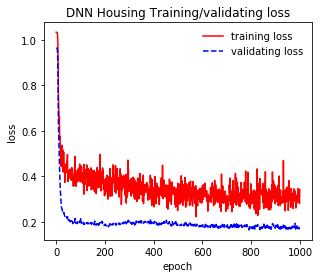

In [14]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('DNN Housing loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Housing Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
#plt.show()


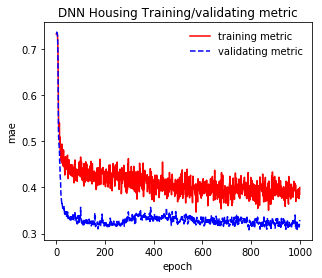

In [15]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Housing metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('DNN Housing Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
#plt.show()


Text(0.5,0,'fitted values')

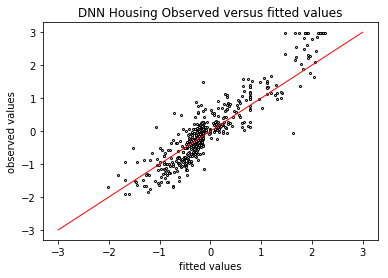

In [16]:
#----------------------------------------
# Make prediction.

fitted = model.predict(X_train)
fitted = fitted[:, 0]

fitted.shape

# Plot

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))

plt.figure('DNN_Housing')
plt.plot(fitted, Y_train, 'wo', markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('DNN Housing Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
#plt.show()
